#**RFM Aanalysis & Sales Forecasting Brazilian E-commerce by Gaia Inc.**
**Final Project Job Connector Data Science Batch 7 - Purwadhika**
***

*Member:*
- Muhammad Nurrizka Ramadhan
- Muhammad Faizal Akbar
- Shofli Yazid Khoirul Roziqin

##**Content**

1. Business Problem Understanding

2. Data Understanding & Preprocessing

3. EDA

4. RFM Analyisis

5. Modelling 

6. Conclusion

7. Recommendation


***

##**Business Problem Understanding**

**Context** <br>
Sejak kemunculan internet ditahun 1990-an membuat dunia berevolusi sangat cepat. Internet telah merubah segala bidang mulai dari ekonomi, pendidikan, sampai dengan budaya yang ada di dunia saat ini. Salah satu perubahan yang paling signifikan sejak lahirnya era internet adalah terjadinya revolusi dalam berbisnis seperti munculnya e-commerce. E-commerce merupakan salah satu revolusi dalam dunia saat ini yang disebabkan oleh internet, e-commerce sendiri sangat memudahkan manusia dimana kita sebagai manusia dapat membeli segala jenis barang yang kita inginkan dan barang tersebut akan diantarkan tepat didepan rumah kita. Saat ini banyak sekali e-commerce yang bertebaran didunia mulai dari yang memiliki pangsa pasar global seperti Amazon dan Alibaba, atau juga e-commerce yang memiliki pangsa pasar khusus di suatu negara seperti Tokopedia yang ada di Indonesia dan juga Olist yang salah satunya berada di Brazil. Saat ini GAIA.INC sebagai salah satu perusahaan konsultan telah berhasil memenangkan tender untuk membantu Olist untuk meramal performance perusahaan untuk periode selanjutnya untuk dapat menentukan langkah-langkah tepat yang dapat diambil.

**Problem Statement** <br>
Berdasarkan tender yang berhasil didapatkan sebelumnya, Olist memberikan penjelasan bahwa mereka memiliki dataset penjualan dari tahun 2016 - 2018 yang berada di Brazil. Dataset tersebut memiliki sekitar 100.000 data informasi terkait pemesanan yang dilakukan oleh customer. Pihak Olist juga mengatakan bahwa mereka memiliki banyak data namun bingung bagaimana untuk meramal performance penjualan untuk memutuskan langkah apa yang dapat dibuat untuk dapat tetap meningkatkan keuntungan. 

Dari beberapa penjelasan tersebut, GAIA.INC sebagai konsultan yang ditunjuk oleh Olist memberikan rekomendasi untuk membuat analisis forecasting ditambah dengan RFM analysis dari data yang ada untuk dapat memprediksi sales. 

**Goals** <br>
Penjelasan di bagian **Context** & **Problem Statement** dapat disimpulkan bahwa analisa Forecasting Timeseries merupakan metode yang dapat memproyeksikan performance sales, maka dari itu Olist membutuhkan kemampuan prediksi untuk dapat melihat trend penjualan berdasarkan performance tanggal-tanggal sebelumnya. Selain itu, dapat juga dilakukan analisis segmentasi customer agar perusahaan dapat memberikan treatment yang tepat terhadap jenis-jenis customer yang berbeda dari segi recency, frequency, dan moneytary.

Dengan mengetahui itu semua, Olist dapat membuat strategi yang tepat untuk meningkatkan sales dan revenue seperti penyediaan stock barang yang laku terjual pada waktu-waktu tertentu ataupun pemilihan strategi marketing dan promosi perusahaan sehingga dapat memberikan keuntungan yang lebih pada perusahaan.

**Analytic Approach** <br>
Jadi GAIA.INC akan melakukan analisis data untuk memprediksi sales yang kemungkinan terjadi dari situs e-commerce Olist. Prediksi tersebut didasarkan pada performa sales selama 2 tahun terakhir yaitu tahun 2016-2018.
Selain itu juga akan dilakukan analisis RFM untuk membagi customer menjadi beberapa segmen berdasarkan recency, frequency, dan moneytary.

**Metric Evaluation** <br>

##**Data Understanding & Preprocessing**

In [ ]:
# library

import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

%cd /content/drive/My Drive/Final Project Bootcamp Purwadhika/Dataset

Mounted at /content/drive
/content/drive/My Drive/Final Project Bootcamp Purwadhika/Dataset


In [ ]:
cus=pd.read_csv("olist_customers_dataset.csv")
geo=pd.read_csv("olist_geolocation_dataset.csv")
itm=pd.read_csv("olist_order_items_dataset.csv")
pay=pd.read_csv("olist_order_payments_dataset.csv")
rev=pd.read_csv("olist_order_reviews_dataset.csv")
ord=pd.read_csv("olist_orders_dataset.csv")
prd=pd.read_csv("olist_products_dataset.csv")
sel=pd.read_csv("olist_sellers_dataset.csv")
cat=pd.read_csv("product_category_name_translation.csv")

### Customer Dataset

In [ ]:
cus.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


##### **Attribute Information**

| **Attribute** | **Description** |
| --- | --- |
| customer_id | Key untuk orders dataset, masing-masing order, memiliki unique customer_id |
| customer_unique_id | Kode identifikasi unik dari masing-masing customer |
| customer_zip_code_prefix | 5 digit pertama dari customer zip code |
| customer_city | Nama kota tempat tinggal customer |
| customer_state | Kode negara bagian customer |

In [ ]:
cus.shape

(99441, 5)

In [ ]:
cus.count()

customer_id                 99441
customer_unique_id          99441
customer_zip_code_prefix    99441
customer_city               99441
customer_state              99441
dtype: int64

In [ ]:
cus.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
cus.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [ ]:
cus.duplicated(subset = ['customer_unique_id']).sum()

3345

**NOTES**<br>
*Data duplikat berdasarkan customer_unique_id tidak dianggap sebagai data duplikat karena kolom ini berguna saat join dengan database orders. Sehingga tidak perlu drop duplicate terlebih dahulu*

In [ ]:
cus.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [ ]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in cus.columns :
    listItem.append( [col, cus[col].nunique(), cus[col].unique()])

uniqueValue = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
uniqueValue

,Column Name,Number of Unique,Unique Sample
0,customer_id,99441,"[06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d337fd6b2def6b18a428ac77, 4e7b3e00288586ebd08712fdd0374a03, b2b6027bc5c5109e529d4dc6358b12c3, 4f2d8ab171c80ec8364f7c12e35b23ad, 879864dab9bc3047522c92c82e1212b8, fd826e7cf63160e536e0908c76c3f441, 5e274e7a0c3809e14aba7ad5aae0d407, 5adf08e34b2e993982a47070956c5c65, 4b7139f34592b3a31687243a302fa75b, 9fb35e4ed6f0a14a4977cd9aea4042bb, 5aa9e4fdd4dfd20959cad2d772509598, b2d1536598b73a9abd18e0d75d92f0a3, eabebad39a88bb6f5b52376faec28612, 1f1c7bf1c9b041b292af6c1c4470b753, 206f3129c0e4d7d0b9550426023f0a08, a7c125a0a07b75146167b7f04a7f8e98, c5c61596a3b6bd0cee5766992c48a9a1, 9b8ce803689b3562defaad4613ef426f, 49d0ea0986edde72da777f15456a0ee0, 154c4ded6991bdfa3cd249d11abf4130, 690172ab319622688d3b4df42f676898, 2938121a40a20953c43caa8c98787fcb, 237098a64674ae89babdc426746260fc, cb721d7b4f271fd87011c4c83462c076, f681356046d9fde60e70c73a18d65ea2, 167bd30a409e3e4127df5a9408ebd394, 6e359a57a91f84095cc64e1b351aef8c, e0eea8f69a457b3f1fa246e44c9ebefd, e3109970a3fe8021d5ff82c577ce5606, 261cb4f92498ca05d5bd1a327a261d9c, 6f92779347724b67e44e3224f3b4cffd, 2d5831cb2dff7cdefba62e950ae3dc7b, b2bed119388167a954382cca36c4777f, 469634941c27cd844170935a3cf60b95, df0aa5b8586495e0ddf6b601122e43a1, 41c8f4b570869791379a925899a6af8a, 54f755c3fd2709231f9964a1430c5218, 4c06b42fbf7b97ab10779cda5549cd1c, b6368ca0f56d4632f44d58ca431487b2, 4a0e66fd30684aa1409cd1b66fec77cc, c168abb9077b7821adae01dc1f0886c5, a3b0fda37bae14cf754877bed475e80c, 0ccd415657ae8a6cd1c71b00155a019e, c532a74a3ebf1bacce2e2bcce3783317, 19cecb194f54e614b70d971306a9931b, f34a6e874087ec1f0e3dab9fdf659c5d, c132855c926907970dcf6f2bf0b33a24, df85b96ba2ce3e49bde101b1614f52ac, 4d27341acd30a36bca39008ee9bb9050, d3b6830d18c7de943d1e707d1f061d40, 79de53946db384e2d7a9bd131792ad17, a562ab1e728449e3461829dfe2e36f73, b64ed91eab98972150bdaf77ca921934, 8247b5583327ab8be19f96e1fb82f77b, 8fcaa9368903f3a9a28aeaff28c14638, a9b0d1c26105279e1b8edc63d06bd668, aa9f03ecd3728c9bd12e6d962c66c7cb, 230c0d740401730c7197d16376893525, a905baa530258422594f1b05615bd225, 4fa19f7da692e6bf9602aaad3c372eda, 03f846ad03437d864a8d2a22976dcafe, de4e13fd7d6469c5ada77d0843c55e42, 8276de07ef25225d412b8462d73f8664, cc32707d2e2f7c92ab449f9b28154809, a02f66c3af7b16eec19ddcd98b645fe3, 26acee41e2f75689a5615892f06ea0bd, f64cdee66599119324ce57a97e43700d, 7ab7a537b678b6dd73d825ff6ee7be9d, 7300450cedf7e4c35c243c4a03c1e8a6, 4c7241af24b5344cb01fe687643de4fe, 97e126f19a6f04b3462619f36862bcd2, 6d27a9361e591da38c87a5e70253f3f2, 6810c3dc47f641181fcc7f73275c3d19, b514422efcf14bef34858a0829bef189, 0aae2862f8eac77f10a34f44860720ac, 6c9a5923526346cbc0bd7bbd92269c01, 1b2cb35b19b40b61f953d32ea157b337, 12d1b4294fef21016c9614eb31e55e15, f6529ffebe6b3440d45d89604a4239ac, 8264e3518163dd09211870b24a5d741d, 8392e3d4cfeec63f2a8bfea68bf1f91f, 38d1cd89306128348ffdf4cc23f3a50a, 91ec76836092bba85d11761078ed7bb5, f9dfa0a2934ffbb22e66924952548be8, 5a3260cfde2a918b597dada7ddd247bb, ee3a81b2771fec5f9e982cdb1b3a4804, 784c407781aa34749a388c9283782b56, 3f6ede29d4c69cd3316d2035b6cec1fb, 6bed27564bd99d78d09c1fac13da56fd, 670254dd2e886ffe621b3831afb47d7d, f7cb015ff73be957ee6a30e2577742c5, ea2196dc456ba36fe4f6b81dca4867d4, 09241c552e9fe2420997a6c535e9d408, e50a30de3c32f9406a7185f40ce6874d, f89c1a6b9c966869e441e55bc14acddc, 23e96758fd640560e9b1fbcda90abfc4, 369708cabd9831ea6fde670a3b602a92, 5f8b4882b5a4ec7bf6d2107e6cd0cf29, ad6891a1937cb8723a2c08ba1ae59873, ...]"
1,customer_unique_id,96096,"[861eff4711a542e4b93843c6dd7febb0, 290c77bc529b7ac935b93aa66c333dc3, 060e732b5b29e8181a18229c7b0b2b5e, 259dac757896d24d7702b9acbbff3f3c, 345ecd01c38d18a9036ed96c73b8d066, 4c93744516667ad3b8f1fb645a3116a4, addec96d2e059c80c30fe6871d30d177, 57b2a98a409812fe9618067b6b8ebe4f, 1175e95fb47ddff9de6b2b06188f7e0d, 9afe194fb833f79e300e37e580171f22, 2a7745e1ed516b289ed9b29c7d0539a5, 2a46fb94aef5cbeeb850418118cee090, 918dc87cd72cd9f6ed4bd442ed785235, 295c05e81917928d76245e842748184d, 3151a81801c8386361b6227

In [ ]:
display(cus.describe(), cus.describe(include='object'))

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


**Summary pengolahan Database Customer sebagai berikut:**
- Terdapat 96.096 data customer berdasarkan customer_unique_id
- Namun berdasarkan customer_id terdapat 99.441 data yang mana data kolom ini akan berfungsi saat dijoin dengan database order
- Sehingga sementara ini kolom customer_unique_id yang terduplikat tidak didrop

### Geolocation Dataset

#### **Raw Geolocation Dataset**

In [ ]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


##### **Attribute Information**

| **Attribute** | **Description** |
| --- | --- |
| geolocation_zip_code_prefix | 5 digit pertama dari zip code |
| geolocation_lat | Koordinat bujur (latitute) |
| geolocation_lng | Koordinat lintang (longitude) |
| geolocation_city | Nama kota |
| geolocation_city | Kode negara bagian |

In [ ]:
geo.shape

(1000163, 5)

In [ ]:
geo.count()

geolocation_zip_code_prefix    1000163
geolocation_lat                1000163
geolocation_lng                1000163
geolocation_city               1000163
geolocation_state              1000163
dtype: int64

In [ ]:
geo.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [ ]:
geo.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

In [ ]:
geo.duplicated().sum()

261831

In [ ]:
geo.duplicated(subset = ['geolocation_zip_code_prefix']).sum()

981148

In [ ]:
geo.duplicated(subset = ['geolocation_lat']).sum()

282803

In [ ]:
geo.duplicated(subset = ['geolocation_lng']).sum()

282550

In [ ]:
geo.sort_values(by = ['geolocation_zip_code_prefix'])

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1246,1001,-23.549292,-46.633559,sao paulo,SP
429,1001,-23.550498,-46.634338,sao paulo,SP
1182,1001,-23.549779,-46.633957,sao paulo,SP
1435,1001,-23.549292,-46.633559,sao paulo,SP
326,1001,-23.551427,-46.634074,sao paulo,SP
...,...,...,...,...,...
1000026,99980,-28.388679,-51.848863,david canabarro,RS
999950,99980,-28.388400,-51.845225,david canabarro,RS
1000002,99980,-28.388342,-51.845194,david canabarro,RS
999864,99990,-28.329472,-51.769109,muliterno,RS


In [ ]:
geo_clean = geo.drop_duplicates(subset = ['geolocation_zip_code_prefix'])

**Notes**<br>
- ZIP code menjadi patokan duplikasi data karena ZIP code spesifik kepada daerah tertentu yang lebih spesifik daripada kota. Contoh: Desa/kelurahan/kecamatan.
- Koordinat (lng,lat) tidak dijadikan sebagai patokan duplikasi karena bisa jadi titik koordinat yang bersebelahan memiliki ZIP code yang sama
- Selain itu ZIP code lebih bermanfaat untuk analisa selanjutnya daripada koordinat (lng.lat) yang mana koordinat sudah cukup terwakilkan oleh ZIP code serta ZIP code yang menjadi kolom acuan untuk join dengan dataset customer dan seller
- Sehingga data dengan ZIP code yang sama akan dianggap sebagai data duplikat / drop.duplicate berdasarkan ZIP code


#### **Clean Geolocation Dataset**

In [ ]:
geo_clean.shape

(19015, 5)

In [ ]:
geo_clean.nunique()

geolocation_zip_code_prefix    19015
geolocation_lat                18987
geolocation_lng                18988
geolocation_city                5955
geolocation_state                 27
dtype: int64

In [ ]:
geo_clean.count()

geolocation_zip_code_prefix    19015
geolocation_lat                19015
geolocation_lng                19015
geolocation_city               19015
geolocation_state              19015
dtype: int64

In [ ]:
geo_clean.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [ ]:
geo_clean.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [ ]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in geo_clean.columns :
    listItem.append( [col, geo_clean[col].nunique(), geo_clean[col].unique()])

uniqueValue = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
uniqueValue

,Column Name,Number of Unique,Unique Sample
0,geolocation_zip_code_prefix,19015,"[1037, 1046, 1041, 1035, 1012, 1047, 1013, 1029, 1011, 1032, 1014, 1039, 1024, 1009, 1020, 1043, 1050, 1045, 1007, 1005, 1017, 1019, 1027, 1033, 1006, 1034, 1042, 1040, 1026, 1036, 1048, 1002, 1031, 1022, 1008, 1010, 1003, 1001, 1015, 1038, 1016, 1049, 1021, 1018, 1044, 1030, 1025, 1004, 1023, 1028, 1155, 1122, 1150, 1123, 1139, 1153, 1104, 1136, 1130, 1103, 1156, 1151, 1140, 1120, 1106, 1124, 1131, 1121, 1141, 1125, 1102, 1127, 1137, 1135, 1138, 1128, 1109, 1132, 1108, 1107, 1154, 1152, 1134, 1144, 1129, 1105, 1126, 1142, 1133, 1101, 1189, 1202, 1230, 1221, 1217, 1243, 1203, 1214, 1257, 1231, ...]"
1,geolocation_lat,18987,"[-23.54562128115268, -23.54608112703553, -23.5443921648681, -23.541577961711493, -23.547762303364262, -23.54627311241268, -23.546923208436723, -23.543769055769133, -23.547639550320632, -23.53841810407414, -23.546435343326205, -23.54188300998332, -23.541389521053937, -23.54693540437998, -23.55223547100232, -23.546656718016017, -23.549773516504185, -23.541593762969622, -23.550392524842728, -23.549819091869107, -23.55001091199737, -23.552151883432384, -23.538301166801343, -23.54032130474925, -23.55052430835593, -23.54239162719593, -23.54487359810152, -23.540316757429707, -23.539494799586286, -23.541700023861782, -23.547448918662464, -23.54831797807146, -23.536864121011018, -23.54498660505508, -23.54425493154535, -23.547806958346342, -23.54903244546711, -23.54929199999999, -23.544826346129778, -23.542679676299095, -23.54849512877264, -23.54530659310986, -23.54516769470249, -23.550218647763327, -23.54575105023373, -23.538363904524203, -23.539920936547933, -23.550115903139226, -23.54260295697964, -23.536027749379617, -23.52878808243405, -23.531280767701485, -23.532255303364263, -23.529307180131543, -23.52076037607479, -23.52811869885744, -23.535218462115523, -23.52350959838998, -23.52663823480868, -23.53538864556528, -23.5298272739339, -23.527788191788307, -23.517930174303164, -23.53076048626577, -23.53249635607949, -23.527367392723217, -23.52164183207347, -23.524588477378973, -23.52011919677996, -23.529050497085805, -23.52261021648681, -23.52773504025041, -23.51957274271452, -23.52122103136361, -23.5188254074384, -23.52296856571061, -23.525355372756565, -23.51929180460501, -23.52375957536492, -23.522004902014046, -23.53158118373822, -23.52916893282939, -23.51867680707737, -23.52362350735759, -23.5259237463212, -23.533744232586976, -23.52915073382772, -23.51993430515264, -23.522591105747573, -23.533718588348005, -23.53210825506378, -23.530243903687488, -23.532734734664448, -23.54601532944774, -23.533844773241405, -23.54946977906979, -23.537119379681474, -23.53569581346678, -23.54507217346644, -23.5367081559813, ...]"
2,geolocation_lng,18988,"[-46.63929204800168, -46.64482029837157, -46.63949930627844, -46.64160722329613, -46.63536053788448, -46.64122516971552, -46.6342636964915, -46.63427784085132, -46.63603162315495, -46.634778375266734, -46.63383023397196, -46.63991946670314, -46.62989908781218, -46.63658792659698, -46.6284406588955, -46.64078762115524, -46.64559900666509, -46.64189378810082, -46.63730164071784, -46.63560588995324, -46.63116636914989, -46.63080224715792, -46.63076391104508, -46.636394815973325, -46.63669363835193, -46.63770927785183, -46.64030309449483, -46.63735536871719, -46.63284391414975, -46.64131782056096, -46.64016924063704, -46.63542110199666, -46.63349313820771, -46.63345367485142, -46.634639135589296, -46.63612181853806, -46.63531311226845, -46.633559478233785, -46.63086956396899, -46.63819683884986, -46.633490627676125, -46.636994571065735, -46.63224867958328, -46.63188, -46.64132693574358, -46.63293009824575, -46.6283479287932, -46.63512161420169, -46.63094283625709, -46.632878533585306, -46.664404203300826, -46.637260391482464, -46.662756071469765, -46.63490526351788, -46.661384138207694, -46.65645154579032, -46.62461223313523, -46.666944167638064, -46.64380970358929, -46.631747708436734, -46.664666057

In [ ]:
geo_clean['geolocation_city'] = geo_clean['geolocation_city'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

<ipython-input-31-add97bd7cb94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_clean['geolocation_city'] = geo_clean['geolocation_city'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


In [ ]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in geo_clean.columns :
    listItem.append( [col, geo_clean[col].nunique(), geo_clean[col].unique()])

uniqueValue = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
uniqueValue

,Column Name,Number of Unique,Unique Sample
0,geolocation_zip_code_prefix,19015,"[1037, 1046, 1041, 1035, 1012, 1047, 1013, 1029, 1011, 1032, 1014, 1039, 1024, 1009, 1020, 1043, 1050, 1045, 1007, 1005, 1017, 1019, 1027, 1033, 1006, 1034, 1042, 1040, 1026, 1036, 1048, 1002, 1031, 1022, 1008, 1010, 1003, 1001, 1015, 1038, 1016, 1049, 1021, 1018, 1044, 1030, 1025, 1004, 1023, 1028, 1155, 1122, 1150, 1123, 1139, 1153, 1104, 1136, 1130, 1103, 1156, 1151, 1140, 1120, 1106, 1124, 1131, 1121, 1141, 1125, 1102, 1127, 1137, 1135, 1138, 1128, 1109, 1132, 1108, 1107, 1154, 1152, 1134, 1144, 1129, 1105, 1126, 1142, 1133, 1101, 1189, 1202, 1230, 1221, 1217, 1243, 1203, 1214, 1257, 1231, ...]"
1,geolocation_lat,18987,"[-23.54562128115268, -23.54608112703553, -23.5443921648681, -23.541577961711493, -23.547762303364262, -23.54627311241268, -23.546923208436723, -23.543769055769133, -23.547639550320632, -23.53841810407414, -23.546435343326205, -23.54188300998332, -23.541389521053937, -23.54693540437998, -23.55223547100232, -23.546656718016017, -23.549773516504185, -23.541593762969622, -23.550392524842728, -23.549819091869107, -23.55001091199737, -23.552151883432384, -23.538301166801343, -23.54032130474925, -23.55052430835593, -23.54239162719593, -23.54487359810152, -23.540316757429707, -23.539494799586286, -23.541700023861782, -23.547448918662464, -23.54831797807146, -23.536864121011018, -23.54498660505508, -23.54425493154535, -23.547806958346342, -23.54903244546711, -23.54929199999999, -23.544826346129778, -23.542679676299095, -23.54849512877264, -23.54530659310986, -23.54516769470249, -23.550218647763327, -23.54575105023373, -23.538363904524203, -23.539920936547933, -23.550115903139226, -23.54260295697964, -23.536027749379617, -23.52878808243405, -23.531280767701485, -23.532255303364263, -23.529307180131543, -23.52076037607479, -23.52811869885744, -23.535218462115523, -23.52350959838998, -23.52663823480868, -23.53538864556528, -23.5298272739339, -23.527788191788307, -23.517930174303164, -23.53076048626577, -23.53249635607949, -23.527367392723217, -23.52164183207347, -23.524588477378973, -23.52011919677996, -23.529050497085805, -23.52261021648681, -23.52773504025041, -23.51957274271452, -23.52122103136361, -23.5188254074384, -23.52296856571061, -23.525355372756565, -23.51929180460501, -23.52375957536492, -23.522004902014046, -23.53158118373822, -23.52916893282939, -23.51867680707737, -23.52362350735759, -23.5259237463212, -23.533744232586976, -23.52915073382772, -23.51993430515264, -23.522591105747573, -23.533718588348005, -23.53210825506378, -23.530243903687488, -23.532734734664448, -23.54601532944774, -23.533844773241405, -23.54946977906979, -23.537119379681474, -23.53569581346678, -23.54507217346644, -23.5367081559813, ...]"
2,geolocation_lng,18988,"[-46.63929204800168, -46.64482029837157, -46.63949930627844, -46.64160722329613, -46.63536053788448, -46.64122516971552, -46.6342636964915, -46.63427784085132, -46.63603162315495, -46.634778375266734, -46.63383023397196, -46.63991946670314, -46.62989908781218, -46.63658792659698, -46.6284406588955, -46.64078762115524, -46.64559900666509, -46.64189378810082, -46.63730164071784, -46.63560588995324, -46.63116636914989, -46.63080224715792, -46.63076391104508, -46.636394815973325, -46.63669363835193, -46.63770927785183, -46.64030309449483, -46.63735536871719, -46.63284391414975, -46.64131782056096, -46.64016924063704, -46.63542110199666, -46.63349313820771, -46.63345367485142, -46.634639135589296, -46.63612181853806, -46.63531311226845, -46.633559478233785, -46.63086956396899, -46.63819683884986, -46.633490627676125, -46.636994571065735, -46.63224867958328, -46.63188, -46.64132693574358, -46.63293009824575, -46.6283479287932, -46.63512161420169, -46.63094283625709, -46.632878533585306, -46.664404203300826, -46.637260391482464, -46.662756071469765, -46.63490526351788, -46.661384138207694, -46.65645154579032, -46.62461223313523, -46.666944167638064, -46.64380970358929, -46.631747708436734, -46.664666057

**NOTES**<br>
*Penggantian accent karakter menjadi karakter normal pada kolom nama kota*

In [ ]:
display(geo_clean.describe(), geo_clean.describe(include='object'))

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,19015.000000,19015.000000,19015.000000
mean,42711.591901,-19.062087,-46.058008
std,30905.051745,7.319402,5.380751
min,1001.000000,-36.605374,-72.927296
25%,12721.500000,-23.564386,-49.000445
50%,38240.000000,-22.429252,-46.632544
75%,70656.500000,-15.615448,-43.255324
max,99990.000000,42.184003,121.105394


,geolocation_city,geolocation_state
count,19015,19015
unique,5771,27
top,sao paulo,SP
freq,3180,6349


**Summary pengolahan Database Geolocation sebagai berikut:**
- Terdapat 19.015 data geolocation_zip_code_prefix setelah proses cleaning duplikasi
- Penggantian accent karakter menjadi karakter normal kolom nama kota
- Cleaning duplikasi mengacu pada ZIP code karena data ZIP code cukup mewakili lokasi, meskipun tidak spesifik kepada letak bujur dan lintang (lat,lng). Selain itu ZIP code berguna untuk pengolahan data lebih lanjut seperti koneksi data dengan seller database dan customer database

### Order Item Dataset

In [ ]:
itm.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


##### **Attribute Information**

| **Attribute** | **Description** |
| --- | --- |
| order_id | Kode unique order |
| order_item_id | Angka sequential untuk mengidentifikasi item dalam order yang sama |
| product_id | Kode unique product |
| seller_id | Kode unique seller |
| shipping_limit_date | Batas waktu pengiriman dari seller untuk handling order ke partner logistic |
| price | Harga dari item
| freight_value| Oangkos kirim. Jika sebuah order memiliki item lebih dari 1 freight value dibagi ke masing-masing item |

In [ ]:
itm.shape

(112650, 7)

In [ ]:
itm.count()

order_id               112650
order_item_id          112650
product_id             112650
seller_id              112650
shipping_limit_date    112650
price                  112650
freight_value          112650
dtype: int64

In [ ]:
itm.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
itm.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [ ]:
itm.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [ ]:
itm['shipping_limit_date'] = pd.to_datetime(itm['shipping_limit_date'])

In [ ]:
itm.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [ ]:
itm.duplicated(subset = 'order_id').sum()

13984

In [ ]:
itm.duplicated(subset = 'order_item_id').sum()

112629

In [ ]:
itm[itm['order_item_id'] == 20]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
11951,1b15974a0141d54e36626dca3fdc731a,20,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
57316,8272b63d03f5f79c56e9e4120aec44ef,20,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
75122,ab14fdcfbe524636d65ee38360e22ce8,20,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.7,14.44


In [ ]:
itm[itm['order_id'] == '1b15974a0141d54e36626dca3fdc731a']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
11932,1b15974a0141d54e36626dca3fdc731a,1,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11933,1b15974a0141d54e36626dca3fdc731a,2,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11934,1b15974a0141d54e36626dca3fdc731a,3,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11935,1b15974a0141d54e36626dca3fdc731a,4,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11936,1b15974a0141d54e36626dca3fdc731a,5,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11937,1b15974a0141d54e36626dca3fdc731a,6,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11938,1b15974a0141d54e36626dca3fdc731a,7,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11939,1b15974a0141d54e36626dca3fdc731a,8,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11940,1b15974a0141d54e36626dca3fdc731a,9,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11941,1b15974a0141d54e36626dca3fdc731a,10,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12


**NOTES**<br>
*Jika dilihat dari kolom order_id terdapat duplikasi pada kolom order_id namun duklikasi ini tidak dianggap duplikasi mengingat kolom order_item_id merupakan nilai sequential untuk item berbeda dalam order yang sama. Bisa jadi dianggap sebagai 1 order namun tediri dari beberapa product atau product yang sama namun jumlah pesanannya lebih dari 1 unit*

In [ ]:
itm.duplicated(subset = ['order_id','order_item_id']).sum()

0

**NOTES**<br>
*Terubukti saat di-search duplikasi berdasarkan parameter 2 kolom yaitu otder_id dan order_item_id tidak ditemukan adanya duplikasi. Sehingga sementara ini belum ada nilai yang perlu didrop akibat duplikasi*

In [ ]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in itm.columns :
    listItem.append( [col, itm[col].nunique(), itm[col].unique()])

uniqueValue = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
uniqueValue

,Column Name,Number of Unique,Unique Sample
0,order_id,98666,"[00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f0320c557190d7a144bdd3, 000229ec398224ef6ca0657da4fc703e, 00024acbcdf0a6daa1e931b038114c75, 00042b26cf59d7ce69dfabb4e55b4fd9, 00048cc3ae777c65dbb7d2a0634bc1ea, 00054e8431b9d7675808bcb819fb4a32, 000576fe39319847cbb9d288c5617fa6, 0005a1a1728c9d785b8e2b08b904576c, 0005f50442cb953dcd1d21e1fb923495, 00061f2a7bc09da83e415a52dc8a4af1, 00063b381e2406b52ad429470734ebd5, 0006ec9db01a64e59a68b2c340bf65a7, 0008288aa423d2a3f00fcb17cd7d8719, 0009792311464db532ff765bf7b182ae, 0009c9a17f916a706d71784483a5d643, 000aed2e25dbad2f9ddb70584c5a2ded, 000c3e6612759851cc3cbb4b83257986, 000e562887b1f2006d75e0be9558292e, 000e63d38ae8c00bbcb5a30573b99628, 000e906b789b55f64edcb1f84030f90d, 000f25f4d72195062c040b12dce9a18a, 001021efaa8636c29475e7734483457d, 0010b2e5201cc5f1ae7e9c6cc8f5bd00, 00119ff934e539cf26f92b9ef0cdfed8, 0011d82c4b53e22e84023405fb467e57, 00125cb692d04887809806618a2a145f, 00130c0eee84a3d909e75bc08c5c3ca1, 0013503b13da1eac686219390b7d641b, 00137e170939bba5a3134e2386413108, 001427c0ec99cf8af737bd88e92fd444, 00143d0f86d6fbd9f9b38ab440ac16f5, 0014ae671de39511f7575066200733b7, 0015ebb40fb17286bea51d4607c4733c, 00169e31ef4b29deaae414f9a5e95929, 0016dfedd97fc2950e388d2971d718c7, 0017afd5076e074a48f1f1a4c7bac9c5, 001862358bf858722e1e2ae000cfed8b, 0019c29108428acffd089c36103c9440, 001ab0a7578dd66cd4b0a71f5b6e1e41, 001ac194d4a326a6fa99b581e9a3d963, 001b76dd48a5b1eee3e87778daa40df8, 001c85b5f68d2be0cb0797afc9e8ce9a, 001d8f0e34a38c37f7dba2a37d4eba8b, 001daeb0eddc45b999bad0801ad9d273, 001dbc16dc51075e987543d23a0507c7, 001e7ba991be1b19605ca0316e7130f9, 001e7cf2ad6bef3ade12ebc56ceaf0f3, 0020262c8a370bd5a174ea6a2a267321, 0020a222f55eb79a372d0efee3cca688, 002175704e8b209f61b9ad5cfd92b60e, 00229e4e43f7a7e0b9dd819ad43268d3, 0025081dcf9330f9a5052ae82c6ce396, 00254baeb6c932b0a8aeead91fbd02b5, 00259a44fcad3fc0474329e925d14fc3, 0025c5d1a8ca53a240ec2634bb4492ea, 002611a77fe03d076285fd4ca95db77c, 002691433f09002ac9ca0c4e8dbb8ead, 0026a368634b6e6f34f33b1499773a30, 00275bce676303c3bfd7292aefdfa223, 00276d5c3491fbf55305e26891040df9, 002834535f7a609a5c68266f173fa59e, 0028de0ca693a1bb26448916a81105cc, 002955b0acc63d04f6724a31967e82bd, 0029c5db35ef291ce99d1262012e7daa, 0029f17cf0e7640c5cb6825af681303f, 002af7fa9eb99d1456bceb6a13d6fc0b, 002b430ff89b3a24c31a1170acbbedea, 002b4e6fa42cd4a22cc86abc18fe9c05, 002c9def9c9b951b1bec6d50753c9891, 002d040018d12a3853c059f7f23ab5b1, 002f16b7bc4530031b7d90f791b12d8a, 002f19a65a2ddd70a090297872e6d64e, 002f98c0f7efd42638ed6100ca699b42, 0030d783f979fbc5981e75613b057344, 0030ff924c38549807645976adeef2c0, 00310b0c75bb13015ec4d82d341865a4, 00324b3eda39ba5ecce3945823e3594c, 0032d07457ae9c806c79368d7d9ce96b, 003324c70b19a16798817b2b3640e721, 00335b686d693c7d72deeb12f8e89227, 00335f75ea6a4455b524a8dd177067f5, 00337fe25a3780b3424d9ad7c5a4b35e, 003423b755b562962a6225a8de40d12e, 00345f338696283410b7977d2e3efc89, 0035246a40f520710769010f752e7507, 0035c0b07126fe9c24a325216fb96064, 0035e6b7ade84b3f5b86bd49814793df, 0036757472ece3dde52fd4bfd929c90e, 0036887767dea4bd43b1a88cd0d9477a, 00378c6c981f234634c0b9d6128df6dd, 003822434f91204da0a51fe4cf2aba18, 0039500db36d50d7d0bfaf23723550f3, 003a7f59d7e08a9c61d9e2881fe6459c, 003a94f778ef8cfd50247c8c1b582257, 003cc6161d7a2593f2525cce0c330d32, 003d0634280ff3d1d3a54459349a6899, 003d804eef0e1b856881cd18e0cc0d4c, 003d9fc84ad902adf2265248b5ffe1a4, 003edccf16bc5ec447f592913b3df2b4, ...]"
1,order_item_id,21,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]"
2,product_id,32951,"[4244733e06e7ecb4970a6e2683c13e61, e5f2d52b802189ee658865ca93d83a8f, c777355d18b72b67abbeef9df44fd0fd, 7634da152a4610f1595efa32f14722fc, ac6c3623068f30de03045865e4e10089, ef92defde845ab8450f9d70c526ef70f, 8d4f2bb7e93e6710a28f34fa83ee7d28, 557d850972a7d6f792fd18ae1400d9b6, 310ae3c140ff94b03219ad0adc3c778f, 4535b0e1091c278dfd193e5a1d63b39f, d63c1011f49d98b976c352955b1c4bea, f177554ea93259a5b282f24e33f65ab6, 99a47

In [ ]:
display(itm.describe(), itm.describe(include='object'))

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


,order_id,product_id,seller_id
count,112650,112650,112650
unique,98666,32951,3095
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0
freq,21,527,2033


**Summary pengolahan Database Order Item sebagai berikut:**
- Sementara tidak ada data yang didrop
- Data shipping limit date yang awalnya memiliki dtype object diconvert menjadi datetime64(ns)

### Order Payments Dataset

In [ ]:
pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


##### **Attribute Information**

| **Attribute** | **Description** |
| --- | --- |
| order_id | Kode unique order |
| payment_sequential | Pembayaran customer mungkin lebih dari 1 metode pembayaran. Jika lebih dari 1 metode pembayaran, sequence akan dibuat |
| payment_type | Metode pembayaran yang dipilih customer |
| payment_installments | Jumlah installment yang dipilih customer |
| payment_value | Nilai transaksi |

In [ ]:
pay.shape

(103886, 5)

In [ ]:
pay.count()

order_id                103886
payment_sequential      103886
payment_type            103886
payment_installments    103886
payment_value           103886
dtype: int64

In [ ]:
pay.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
pay.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [ ]:
pay.duplicated(subset = 'order_id').sum()

4446

In [ ]:
pay.duplicated(subset = ['order_id','payment_sequential']).sum()

0

**NOTES**<br>
*Jika dilihat dari kolom order_id terdapat duplikasi pada kolom order_id namun duklikasi ini tidak dianggap duplikasi mengingat kolom payment_sequential merupakan nilai sequential untuk pembayaran dalam order yang sama. Dianggap sebagai 1 order namun tediri dari beberapa metode pembayaran / sequence pembayaran. Sehingga belum ada data yang perlu didrop akibat duplikasi*

In [ ]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in pay.columns :
    listItem.append( [col, pay[col].nunique(), pay[col].unique()])

uniqueValue = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
uniqueValue

,Column Name,Number of Unique,Unique Sample
0,order_id,99440,"[b81ef226f3fe1789b1e8b2acac839d17, a9810da82917af2d9aefd1278f1dcfa0, 25e8ea4e93396b6fa0d3dd708e76c1bd, ba78997921bbcdc1373bb41e913ab953, 42fdf880ba16b47b59251dd489d4441a, 298fcdf1f73eb413e4d26d01b25bc1cd, 771ee386b001f06208a7419e4fc1bbd7, 3d7239c394a212faae122962df514ac7, 1f78449c87a54faf9e96e88ba1491fa9, 0573b5e23cbd798006520e1d5b4c6714, d88e0d5fa41661ce03cf6cf336527646, 2480f727e869fdeb397244a21b721b67, 616105c9352a9668c38303ad44e056cd, cf95215a722f3ebf29e6bbab87a29e61, 769214176682788a92801d8907fa1b40, 12e5cfe0e4716b59afb0e0f4a3bd6570, 61059985a6fc0ad64e95d9944caacdad, 79da3f5fe31ad1e454f06f95dc032ad5, 8ac09207f415d55acff302df7d6a895c, b2349a3f20dfbeef62e7b31baa22f84b, 5a1f6d22f7dfb061ef29216b9af687a1, 4214cda550ece8ee66441f459dc33a8c, adfbf6c2a620196f9a3ec747491c72b7, 4d680edbaa7d3d9bed69532957368a03, 8cd68144cdb62dc0d60848cf8616d2a4, 5cfd514482e22bc992e7693f0e3e8df7, d0a945f85ba1074b60aac97ade7e240e, c39414c195d0f94c9d9c35e7c6ed4f1a, 5d9c5817e278892b7498d90bfa28ade8, b69b9260e79a0da00e15f48de1bd2524, f45074ae38f2e01d9b854ec8d40362ff, 81cedc4d2132eb6f512354166e51b187, 595f598849d89203c28d05d0fbf3f92e, f9d0ec2fa088ac583e1ccd15b6686073, e647bf617de735448a4ba54f8910393c, b2bb080b6bc860118a246fd9b6fad6da, 23f10f509600c30cf2852f9dbdf28fc3, f86f6472fa9f395d8d9a6751ca118afb, 1dcf0c8cd36ffaf57784fbdc90079310, 00d8d65b666158b633f96054d31af43b, cf30fe76d1505192acee1c6dccb15545, d3e774a185c0b1b2286ffd6c70abe2e6, 32b1d8f3789a57f1f752e20ac7404b4c, c10d412026c4077b8e83acf0fea04eee, 56c3277583e16009c925fdf116df420f, 0e0441786430b7cfcd0d91f822ea4c99, 6ffb3f1686bceae3466facf7e02ce3fb, afef48d3c8a0b1b7c9b7f8f922fb5674, c0db7d31ace61fc360a3eaa34dd3457c, d574338f566ca28dd67820f48ec1f1d8, 1807cc736321f14baa58ef39cf6e5989, e8977f709bbb0367f51b589e6325f991, 2e2c60b99754ae1e4d8b18846cfec9f2, 1ffb3c1929b16d9c1aec1958e11b3e9b, 95442deb81a5d91c97c0df96b431634a, 10af96a0689260134307879127ac1952, 85eef2d342b0de363c45c1bc324729c5, aa964845f1de8125410aea8b73e9e1ec, 343348b1e29e9fa9e7b6ab1027f9177d, ad4098a257676ea4d394fb3bbbf36ca3, 3e0c3cab458e8b3cc8d1d38ecb7e7775, 3ab4eea6776259ae8dfbabaeffece352, 10d9871bed9fb8d0887d3b9022edd1ff, c108072ab31ec90a754129c171577f5f, fc662bafa52d2ef16078f6f6141009d6, 4217849b1ff18a9270fe048eabc4dc45, 795c16acb4e3c30dfa5b6827727ef488, 55e2d723733c45033e71cb4d44690234, 947e9c6bfd83a06953c420ef92d3da6e, 60e43c5f5ba559d9dd19357ed72cb2f2, e3e9e3295f4e1512167c232a0aaae8a5, 460d57443ffdcaeba240360239747cf7, 4cb51127f19f7254b320efe1718477dd, 110d9355d6338eab0a65a0cacdde5434, 42f5954cda381bd032934ee38c453711, 3689194c14ad4e2e7361ebd1df0e77b0, 97c111c4f22dfa1089a9c0b5338dcc79, 4b2d035932915aa9c2a0d4d84cd6d3b0, e1b4ee0e390fbac1dec439d72b45a115, fee72a68ce935ebf2939fe72f27d3d9b, 4d3bfdf4c7d6578ea445d588371ae10e, 4c2e1a95586c815795a324d1599e7b5a, c9f23db8a1cb725df9bdb3383bd72b38, 8e47a04b25d7a7075064e8e0bd2e0318, 723e462ce1ee50e024887c0b403130f3, fa2ea4b6e84c1c0fc4f3a6d468c55183, fb1a2a1296f822405a946cbdfc0d3ed6, 198298d54f269d8c5fe89e85a859af61, b19ca559688b49e8cf7f88c1aa3f0009, 5be8d4719fe2e3669e2d07dddf3b6b0c, 4a02e985c7239d866a632f07ed20d9c0, 3e17eef8a8bd0131c7aed90d7508799e, f8d323a2702fed37f0229965f7e9f8b3, de4090fd9b7900d46323b0c7c36b7128, 17e5131fe1d4b1a8dc14d4a66914f9d7, 20f136d890c31a62486c809f91a5b098, 557cc2675910c4a6c9b54ad276f25097, d60a89ab9bc1e68834465ae630c3343e, 3ba2d0012b1f34bc6ccbc31c4ba69f93, d46f45b0d795bcf47a19d301710e63fe, ...]"
1,payment_sequential,29,"[1, 2, 4, 5, 3, 8, 6, 7, 10, 11, 17, 19, 27, 12, 9, 15, 13, 14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20]"
2,payment_type,5,"[credit_card, boleto, voucher, debit_card, not_defined]"
3,payment_installments,24,"[8, 1, 2, 3, 6, 5, 4, 10, 7, 12, 9, 13, 15, 24, 11, 18, 14, 20, 21, 17, 22, 0, 16, 23]"
4,payment_value,29077,"[99.33, 24.39, 65.71, 107.78, 128.45, 96.12, 81.16, 51.84, 341.09, 51.95, 188.73, 141.9, 75.78, 102.66, 105.28, 157.45, 132.04, 98.94, 244.15, 136.71, 47.69, 170.57, 67.5, 353.09, 330.

In [ ]:
display(pay.describe(), pay.describe(include='object'))

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


**Summary pengolahan Database Order Payments sebagai berikut:**
- Sementara tidak ada data yang didrop

### Order Reviews Dataset

In [ ]:
rev.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


##### **Attribute Information**

| **Attribute** | **Description** |
| --- | --- |
| review_id | Kode unique review |
| order_id | Kode unique order |
| review_score | Range review score 1-5 yang dibeikan oleh customer terhadap kepuasan pelayanan |
| review_comment_title | Judul komentar dari review customer, dalam bahasa Purtugis |
| review_comment_message | Komentar dari review customer, dalam bahasa Purtugis |
| review_creation_date | Tanggal satisfaction survey dikirim ke customer |
| review_creation_date | Tanggal jawaban satisfaction survey |

In [ ]:
rev.shape

(99224, 7)

In [ ]:
rev.count()

review_id                  99224
order_id                   99224
review_score               99224
review_comment_title       11568
review_comment_message     40977
review_creation_date       99224
review_answer_timestamp    99224
dtype: int64

In [ ]:
rev.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
rev[rev['review_comment_title'].isna()].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
rev[rev['review_comment_message'].isna()].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34


In [ ]:
rev['review_comment_title'] = rev['review_comment_title'].fillna ('(no comment title)')

In [ ]:
rev['review_comment_message'] = rev['review_comment_message'].fillna ('(no comment message)')

In [ ]:
rev.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

**NOTES**<br>
*Untuk review title yang kosong (NaN) diisi dengan kalimat "no comment title", sedangkan untuk review message yang kosong (NaN) diisi dengan kalimat "no comment message"*

In [ ]:
rev.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4528
review_comment_message     36160
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [ ]:
rev.duplicated(subset = ['review_id']).sum()

814

In [ ]:
rev.duplicated(subset = ['order_id']).sum()

551

In [ ]:
rev.duplicated(subset = ['review_id','order_id']).sum()

0

In [ ]:
pd.DataFrame(rev['review_id'].value_counts()).sort_values(by = 'review_id', ascending = False)

,review_id
7b606b0d57b078384f0b58eac1d41d78,3
f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,3
dbdf1ea31790c8ecfcc6750525661a9b,3
3415c9f764e478409e8e0660ae816dd2,3
ddc52555ca27b0fe67d5255147682d2d,3
...,...
02f8dd0eae66203e2cb7b8c5b5edb749,1
e8994bfcbe597d8094d43853550c1280,1
8e795a4352eddfa46c7ab774b461ebd7,1
59393cb39d71f8f0ff348fe315e695b4,1


In [ ]:
rev[rev['review_id'] == '7b606b0d57b078384f0b58eac1d41d78']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
7500,7b606b0d57b078384f0b58eac1d41d78,f3028a8f41ea1ee2b461420913663f97,5,(no comment title),(no comment message),2017-02-15 00:00:00,2017-02-21 23:30:22
59859,7b606b0d57b078384f0b58eac1d41d78,2deb17060fc1ce18a85eba953ddcdeaf,5,(no comment title),(no comment message),2017-02-15 00:00:00,2017-02-21 23:30:22
61069,7b606b0d57b078384f0b58eac1d41d78,2f8f31eb2f7b6572836d662a6625c8e4,5,(no comment title),(no comment message),2017-02-15 00:00:00,2017-02-21 23:30:22


In [ ]:
rev[rev['review_id'] == 'f4bb9d6dd4fb6dcc2298f0e7b17b8e1e']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
11595,f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,7791eb26e081ed5f8dd15b40c45393a3,4,(no comment title),(no comment message),2018-03-29 00:00:00,2018-03-30 00:29:09
51527,f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,03c939fd7fd3b38f8485a0f95798f1f6,4,(no comment title),(no comment message),2018-03-29 00:00:00,2018-03-30 00:29:09
76613,f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,9dc9cfe8dd61f0e37b0baa3043517059,4,(no comment title),(no comment message),2018-03-29 00:00:00,2018-03-30 00:29:09


**NOTES**<br>
*Terdapat review_id yang sama untuk order_id yang berbeda*

In [ ]:
pd.DataFrame(rev['order_id'].value_counts()).sort_values(by = 'order_id', ascending = False)

,order_id
c88b1d1b157a9999ce368f218a407141,3
df56136b8031ecd28e200bb18e6ddb2e,3
03c939fd7fd3b38f8485a0f95798f1f6,3
8e17072ec97ce29f0e1f111e598b0c85,3
565b0bdb5bfef65df5a23890967586f6,2
...,...
3ab37da4c3d273ccd8635987b4a6003e,1
e544af259c17461504ff139fd5783179,1
a66b73e5e96567d039cbebbde0ec0bae,1
10077b08b85e7134302b875ffed3366b,1


In [ ]:
rev[rev['order_id'] == 'c88b1d1b157a9999ce368f218a407141']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1985,ffb8cff872a625632ac983eb1f88843c,c88b1d1b157a9999ce368f218a407141,3,(no comment title),(no comment message),2017-07-22 00:00:00,2017-07-26 13:41:07
82525,202b5f44d09cd3cfc0d6bd12f01b044c,c88b1d1b157a9999ce368f218a407141,5,(no comment title),(no comment message),2017-07-22 00:00:00,2017-07-26 13:40:22
89360,fb96ea2ef8cce1c888f4d45c8e22b793,c88b1d1b157a9999ce368f218a407141,5,(no comment title),(no comment message),2017-07-21 00:00:00,2017-07-26 13:45:15


In [ ]:
rev[rev['order_id'] == 'df56136b8031ecd28e200bb18e6ddb2e']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
2952,c444278834184f72b1484dfe47de7f97,df56136b8031ecd28e200bb18e6ddb2e,5,(no comment title),(no comment message),2017-02-08 00:00:00,2017-02-14 13:58:48
13982,72a1098d5b410ae50fbc0509d26daeb9,df56136b8031ecd28e200bb18e6ddb2e,5,(no comment title),(no comment message),2017-02-07 00:00:00,2017-02-10 10:46:09
62728,44f3e54834d23c5570c1d010824d4d59,df56136b8031ecd28e200bb18e6ddb2e,5,(no comment title),(no comment message),2017-02-09 00:00:00,2017-02-09 09:07:28


**NOTES**<br>
*Terdapat order_id yang sama namun review_id yang berbeda. Ada indikasi bahwa terdapat perubahan keputusan pemberian review atau input ulang review.*

In [ ]:
rev.sort_values(['order_id','review_answer_timestamp'], ascending = False, inplace = True)
rev.reset_index(drop = True, inplace = True)
rev.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b2700869a37f1aafc9dda829dc2f9027,fffe41c64501cc87c801fd61db3f6244,5,(no comment title),(no comment message),2018-06-15 00:00:00,2018-06-17 21:27:09
1,fba117c9ac40d41ca7be54741f471303,fffe18544ffabc95dfada21779c9644f,5,(no comment title),Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05
2,dbdd81cd59a1a9f94a10a990b4d48dce,fffce4705a9662cd70adb13d4a31832d,5,(no comment title),(no comment message),2017-10-29 00:00:00,2017-10-29 21:33:52
3,be803f6a93d64719fd685c1cc610918a,fffcd46ef2263f404302a634eb57f7eb,5,(no comment title),(no comment message),2018-07-24 00:00:00,2018-07-25 09:25:29
4,9185f849f32d82e216a4e025e0c50f5c,fffc94f6ce00a00581880bf54a75a037,5,(no comment title),(no comment message),2018-05-11 00:00:00,2018-05-14 12:53:47


In [ ]:
pd.DataFrame(rev['order_id'].value_counts()).sort_values(by = 'order_id', ascending = False)

,order_id
8e17072ec97ce29f0e1f111e598b0c85,3
c88b1d1b157a9999ce368f218a407141,3
df56136b8031ecd28e200bb18e6ddb2e,3
03c939fd7fd3b38f8485a0f95798f1f6,3
6525d9ab0bff6133c63e9c0cfa55bfbd,2
...,...
00ab3a43bda739029ffce95d3b2fb56c,1
00ab210695a17fe10e6b23616ae5bc97,1
00ab1aba567dfebdc39caa4e7ca2f1b2,1
00a99c50fdff7e36262caba33821875a,1


In [ ]:
rev[rev['order_id'] == '8e17072ec97ce29f0e1f111e598b0c85']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
44408,6e4c4086d9611ae4cc0cc65a262751fe,8e17072ec97ce29f0e1f111e598b0c85,1,(no comment title),"Embora tenha entregue dentro do prazo, não enviou o produto que comprei.",2018-04-14 00:00:00,2018-04-16 11:37:31
44409,67c2557eb0bd72e3ece1e03477c9dff5,8e17072ec97ce29f0e1f111e598b0c85,1,(no comment title),Entregou o produto errado.,2018-04-07 00:00:00,2018-04-08 22:48:27
44410,2d6ac45f859465b5c185274a1c929637,8e17072ec97ce29f0e1f111e598b0c85,1,(no comment title),Comprei 3 unidades do produto vieram 2 unidades que não corresponde com o que comprei. Devido a minha opinião é negativa com relação a esse vendedor pois não não cumpriu com o prometido na venda.,2018-04-07 00:00:00,2018-04-07 21:13:05


In [ ]:
rev[rev['order_id'] == 'c88b1d1b157a9999ce368f218a407141']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
21457,fb96ea2ef8cce1c888f4d45c8e22b793,c88b1d1b157a9999ce368f218a407141,5,(no comment title),(no comment message),2017-07-21 00:00:00,2017-07-26 13:45:15
21458,ffb8cff872a625632ac983eb1f88843c,c88b1d1b157a9999ce368f218a407141,3,(no comment title),(no comment message),2017-07-22 00:00:00,2017-07-26 13:41:07
21459,202b5f44d09cd3cfc0d6bd12f01b044c,c88b1d1b157a9999ce368f218a407141,5,(no comment title),(no comment message),2017-07-22 00:00:00,2017-07-26 13:40:22


In [ ]:
rev[rev['order_id'] == 'df56136b8031ecd28e200bb18e6ddb2e']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
12500,c444278834184f72b1484dfe47de7f97,df56136b8031ecd28e200bb18e6ddb2e,5,(no comment title),(no comment message),2017-02-08 00:00:00,2017-02-14 13:58:48
12501,72a1098d5b410ae50fbc0509d26daeb9,df56136b8031ecd28e200bb18e6ddb2e,5,(no comment title),(no comment message),2017-02-07 00:00:00,2017-02-10 10:46:09
12502,44f3e54834d23c5570c1d010824d4d59,df56136b8031ecd28e200bb18e6ddb2e,5,(no comment title),(no comment message),2017-02-09 00:00:00,2017-02-09 09:07:28


In [ ]:
rev[rev['order_id'] == '03c939fd7fd3b38f8485a0f95798f1f6']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
97758,f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,03c939fd7fd3b38f8485a0f95798f1f6,4,(no comment title),(no comment message),2018-03-29 00:00:00,2018-03-30 00:29:09
97759,b04ed893318da5b863e878cd3d0511df,03c939fd7fd3b38f8485a0f95798f1f6,3,(no comment title),"Um ponto negativo que achei foi a cobrança de 3 taxas de entregas, sendo que comprei os 3 produtos iguais numa só compra.\r\nE mesmo comprando os produtos juntos, chegaram separados.",2018-03-20 00:00:00,2018-03-21 02:28:23
97760,405eb2ea45e1dbe2662541ae5b47e2aa,03c939fd7fd3b38f8485a0f95798f1f6,3,(no comment title),Seria ótimo se tivesem entregue os 3 (três) pedidos de uma única vez.,2018-03-06 00:00:00,2018-03-06 19:50:32


In [ ]:
rev.drop_duplicates(subset = 'order_id', keep = 'first', inplace = True)

In [ ]:
rev.duplicated(subset = 'order_id').sum()

0

In [ ]:
rev.shape

(98673, 7)

In [ ]:
rev.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [ ]:
rev.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [ ]:
rev['review_creation_date'] = pd.to_datetime(rev['review_creation_date'])

In [ ]:
rev['review_answer_timestamp'] = pd.to_datetime(rev['review_answer_timestamp'])

In [ ]:
rev.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [ ]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in rev.columns :
    listItem.append( [col, rev[col].nunique(), rev[col].unique()])

uniqueValue = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
uniqueValue

Column Name  Number of Unique  \
0                review_id             98095   
1                 order_id             98673   
2             review_score                 5   
3     review_comment_title              4526   
4   review_comment_message             36061   
5     review_creation_date               636   
6  review_answer_timestamp             97933   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
display(rev.describe(), rev.describe(include='object'))

,review_score
count,98673.000000
mean,4.086386
std,1.347618
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


,review_id,order_id,review_comment_title,review_comment_message
count,98673,98673,98673,98673
unique,98095,98673,4526,36061
top,69a1068c3128a14994e3e422e4539e04,fffe41c64501cc87c801fd61db3f6244,(no comment title),(no comment message)
freq,3,1,87123,57898


**Summary pengolahan Database Order Reviews sebagai berikut:**
- Data duplikat pada order_id di drop dan diambil nilai review terakhir dari order_id yang sama
- Data review creation date dan review answer timestamp yang awalnya memiliki dtype object diconvert menjadi datetime64(ns)

### Orders Dataset

In [ ]:
import datetime
import time

In [ ]:
ord.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


##### **Attribute Information**

| **Attribute** | **Description** |
| --- | --- |
| order_id | Kode unique order |
| customer_id | Key untuk dataset customer, masing-masing order punya customer_id unik |
| order_status | Status order (delivered, shippied, etc) |
| order_purchase_timestamp | Menampilkan timestamp pembelian |
| order_approved_at | Menampilkan timestamp approval pembayaran |
| order_delivered_carrier_date | Menampilkan timestamp saat logistic partner mulai handling barang |
| order_delivered_customer_date | Menampilkan timestamp actual delivery date saat sampai ke customer |
| order_estimated_delivery_date | Menampilkan timestamp estimasi barang sampai ke customer, informasi saat pembayaran |

In [ ]:
ord.shape

(99441, 8)

In [ ]:
ord.shape

(99441, 8)

In [ ]:
ord.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
ord.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
ord.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [ ]:
ord.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [ ]:
ord['order_purchase_timestamp'] = pd.to_datetime(ord['order_purchase_timestamp'])
ord['order_approved_at'] = pd.to_datetime(ord['order_approved_at'])
ord['order_delivered_carrier_date'] = pd.to_datetime(ord['order_delivered_carrier_date'])
ord['order_delivered_customer_date'] = pd.to_datetime(ord['order_delivered_customer_date'])
ord['order_estimated_delivery_date'] = pd.to_datetime(ord['order_estimated_delivery_date'])

**NOTES**<br>
*Mengganti data-data tanggal / timestamp yang bertipe object menjadi tipe datetime*

In [ ]:
ord.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [ ]:
ord.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
ord[ord['order_approved_at'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [ ]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in ord.columns :
    listItem.append( [col, ord[col].nunique(), ord[col].unique()])

uniqueValue = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
uniqueValue

,Column Name,Number of Unique,Unique Sample
0,order_id,99441,"[e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc7dce0b6741e2150273451, 47770eb9100c2d0c44946d9cf07ec65d, 949d5b44dbf5de918fe9c16f97b45f8a, ad21c59c0840e6cb83a9ceb5573f8159, a4591c265e18cb1dcee52889e2d8acc3, 136cce7faa42fdb2cefd53fdc79a6098, 6514b8ad8028c9f2cc2374ded245783f, 76c6e866289321a7c93b82b54852dc33, e69bfb5eb88e0ed6a785585b27e16dbf, e6ce16cb79ec1d90b1da9085a6118aeb, 34513ce0c4fab462a55830c0989c7edb, 82566a660a982b15fb86e904c8d32918, 5ff96c15d0b717ac6ad1f3d77225a350, 432aaf21d85167c2c86ec9448c4e42cc, dcb36b511fcac050b97cd5c05de84dc3, 403b97836b0c04a622354cf531062e5f, 116f0b09343b49556bbad5f35bee0cdf, 85ce859fd6dc634de8d2f1e290444043, 83018ec114eee8641c97e08f7b4e926f, 203096f03d82e0dffbc41ebc2e2bcfb7, f848643eec1d69395095eb3840d2051e, 2807d0e504d6d4894d41672727bc139f, 95266dbfb7e20354baba07964dac78d5, f3e7c359154d965827355f39d6b1fdac, fbf9ac61453ac646ce8ad9783d7d0af6, acce194856392f074dbf9dada14d8d82, dd78f560c270f1909639c11b925620ea, 91b2a010e1e45e6ba3d133fa997597be, ecab90c9933c58908d3d6add7c6f5ae3, f70a0aff17df5a6cdd9a7196128bd354, 1790eea0b567cf50911c057cf20f90f9, 989225ba6d0ebd5873335f7e01de2ae7, d887b52c6516beb39e8cd44a5f8b60f7, b276e4f8c0fb86bd82fce576f21713e0, 8563039e855156e48fccee4d611a3196, 60550084e6b4c0cb89a87df1f3e5ebd9, 5acce57f8d9dfd55fa48e212a641a69d, 434d158e96bdd6972ad6e6d73ddcfd22, 7206b86ea789983f7a273ea7fa0bc2a8, 1e7aff52cdbb2451ace09d0f848c3699, 6ea2f835b4556291ffdc53fa0b3b95e8, 948097deef559c742e7ce321e5e58919, d22e9fa5731b9e30e8b27afcdc2f8563, ee64d42b8cf066f35eac1cf57de1aa85, 6ebaec694d7025e2ad4a05dba887c032, d17dc4a904426827ca80f2ccb3a6be56, 25f4376934e13d3508486352e11a5db0, 5820a1100976432c7968a52da59e9364, 2ce1ad82022c1ba30c2079502ac725aa, 138849fd84dff2fb4ca70a0a34c4aa1c, 47aa4816b27ba60ec948cd019cc1afc1, 9faeb9b2746b9d7526aef5acb08e2aa0, 641fb0752bf5b5940c376b3a8bb9dc52, e425680f760cbc130be3e53a9773c584, 40c5e18f7d112b59b3e5113a59a905b3, 734e7d1bbaeb2ff82521ca0fe6fb6f79, 66e4624ae69e7dc89bd50222b59f581f, a685d016c8a26f71a0bb67821070e398, 2edfd6d1f0b4cd0db4bf37b1b224d855, 68873cf91053cd11e6b49a766db5af1a, f346ad4ee8f630e5e4ddaf862a34e6dd, 8f06cc6465925031568537b815f1198d, ccbabeb0b02433bd0fcbac46e70339f2, 688052146432ef8253587b930b01a06d, f271576bed568e896f99eb710cd3a6f8, 686541986ecfb7d9296eb67719973bf0, 68e48e68da1f50f7c5838ea75e3a20dd, b52cc4919de82b4d696a4380d10804a3, fdf128b3630c21adc9ca4fb8a51b68ec, a6aeb116d2cb5013eb8a94585b71ffef, fa516182d28f96f5f5c651026b0749ee, 6abaad69b8b349c3a529b4b91ce18e46, 974c1993ab8024d3ed16229183c2308d, 82bce245b1c9148f8d19a55b9ff70644, a910f58086d58b3ae6f37aa712d377b9, bd4bd0194d6d29f83b8557d4b89b572a, 634e8f4c0f6744a626f77f39770ac6aa, 6d25592267349b322799e2beb687871e, b8801cccd8068de30112e4f49903d74a, 2711a938db643b3f0b62ee2c8a2784aa, 3bc77ce8be27211bac313c2daa402d1a, 10c320f977c6a18f91b2d14be13128c6, 0a4a2fccb27bd83a892fa503987a595b, e4de6d53ecff736bc68804b0b6e9f635, 6b860b35691d486e45dc98e3514ec5f6, ec341c54a5ebf8ee0a67a8632aa7579b, cadbb3657dac2dbbd5b84b12e7b78aad, 9defaf92cff22420e4e8ef7784815a55, 20e0101b20700188cadb288126949685, 0e782c3705510e717d28907746cbda82, d3d6788577c9592da441752e8a1dd5e3, 86f21bf63784876b9fd6d35f46581d72, 8447ff843b2616c50c0ced28ab1dae03, f169bd689fb8b32ccd62df9050aebc0b, 77e9941864fc840be8e4b1ba5347c0f7, 41bb5cee06dbf170878a9ef93ac7e7f5, 6a0a8bfbbe700284feb0845d95e0867f, f7959f8385f34c4f645327465a1c9fc4, 23f553848a03aaab35bb3f9f87725125, ...]"
1,customer_id,99441,"[9ef432eb6251297304e76186b10a928d, b0830fb4747a6c6d20dea0b8c802d7ef, 41ce2a54c0b03bf3443c3d931a367089, f88197465ea7920adcdbec7375364d82, 8ab97904e6daea8866dbdbc4fb7aad2c, 503740e9ca751ccdda7ba28e9ab8f608, ed0271e0b7da060a393796590e7b737a, 9bdf08b4b3b52b5526ff42d37d47f222, f54a9f0e6b351c431402b8461ea51999, 31ad1d1b63eb9962463f764d4e6e0c9d, 494dded5b201313c64ed7f100595b95c, 7711cf624183d843aafe81855097bc37, d3e3b74c766bc6214e0c830b17ee2341, 19402a48fe860416adf93348aba37740, 3df704f53d3f1d4818840b34ec672a9f,

In [ ]:
display(ord.describe(), ord.describe(include='object'))

<ipython-input-106-4ca97a2217c2>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(ord.describe(), ord.describe(include='object'))


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


,order_id,customer_id,order_status
count,99441,99441,99441
unique,99441,99441,8
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
freq,1,1,96478


**Summary pengolahan Orders Dataset sebagai berikut:**
- Sementara tidak ada data yang didrop, untuk NaN value akan di-fill saat selesai join karena membutuhkan data pendukung dari dataset lain
- Data order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, yang awalnya memiliki dtype object diconvert menjadi datetime64(ns)

### Products Dataset

In [ ]:
prd.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


##### **Attribute Information**

| **Attribute** | **Description** |
| --- | --- |
| product_id | Kode unique product |
| product_category | Kategori product dalam bahasa Portugis |
| product_name_length | Jumlah karakter dari nama product |
| product_description_length | Jumlah karakter dari deskripsi product |
| product_photos_qty | Jumlah foto produk yang di-publish |
| product_weight_g | Berat product dalam gram |
| product_length_cm | Panjang product dalam cm |
| product_height_cm | Tinggi product dalam cm |
| product_widht_cm | Lebar product dalam cm |

In [ ]:
prd.shape

(32951, 9)

In [ ]:
prd.count()

product_id                    32951
product_category_name         32341
product_name_lenght           32341
product_description_lenght    32341
product_photos_qty            32341
product_weight_g              32949
product_length_cm             32949
product_height_cm             32949
product_width_cm              32949
dtype: int64

In [ ]:
prd.sort_values(['product_weight_g','product_length_cm','product_height_cm','product_width_cm'], inplace = True)
prd.reset_index(drop = True, inplace = True)
prd

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
1,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
2,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
3,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
4,ad7d07f5775feab3f20504d1ad3fff11,moveis_decoracao,50.0,1002.0,2.0,2.0,11.0,11.0,52.0
...,...,...,...,...,...,...,...,...,...
32946,e6574cebbeb21c82802d3a0b682129b6,esporte_lazer,49.0,1263.0,2.0,30000.0,105.0,65.0,25.0
32947,038e3a669bb495e56d9d609d874fb668,esporte_lazer,49.0,862.0,1.0,30000.0,105.0,70.0,20.0
32948,26644690fde745fc4654719c3904e1db,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0
32949,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN


In [ ]:
prd.dropna(subset=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm','product_height_cm','product_width_cm'], how='all', inplace=True)
prd

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
1,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
2,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
3,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
4,ad7d07f5775feab3f20504d1ad3fff11,moveis_decoracao,50.0,1002.0,2.0,2.0,11.0,11.0,52.0
...,...,...,...,...,...,...,...,...,...
32945,343c15a347e523f2b6cf38a5db81e179,esporte_lazer,48.0,1232.0,2.0,30000.0,105.0,65.0,20.0
32946,e6574cebbeb21c82802d3a0b682129b6,esporte_lazer,49.0,1263.0,2.0,30000.0,105.0,65.0,25.0
32947,038e3a669bb495e56d9d609d874fb668,esporte_lazer,49.0,862.0,1.0,30000.0,105.0,70.0,20.0
32948,26644690fde745fc4654719c3904e1db,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0


**NOTES**<br>
*Terdapat 1 row data yang memiliki NaN value pada hampir seluruh kolom, dan hanya menyisakan 1 kolom terisi yaitu kolom product_id. Row ini langsung didrop karena tidak ada informasi yang terkait row data lain yang dapat membantu untuk mengisi NaN value pada row tersebut*

In [ ]:
prd[(prd['product_category_name'].isna())]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
12,a9d8f831888820cd641dcd5ca9fea4e8,NaN,NaN,NaN,NaN,50.0,16.0,2.0,11.0
297,4941b2c06706332ebfd9072d7b1fb23c,NaN,NaN,NaN,NaN,50.0,32.0,23.0,33.0
463,88d6c305d09a6fdc1c34cb51942a280c,NaN,NaN,NaN,NaN,100.0,16.0,2.0,11.0
469,c2fffbd2b50c3f612755de49109e6d97,NaN,NaN,NaN,NaN,100.0,16.0,2.0,11.0
474,c892c76504fbc267594383bd0f0d94e8,NaN,NaN,NaN,NaN,100.0,16.0,2.0,11.0
...,...,...,...,...,...,...,...,...,...
32701,51f906f965ca71722df2059f9a7c1b62,NaN,NaN,NaN,NaN,25000.0,52.0,78.0,36.0
32722,8ef13bdd5d6da4bc50df1aaa486bf922,NaN,NaN,NaN,NaN,25800.0,34.0,84.0,54.0
32729,ea11e700a343582ad56e4c70e966cb36,NaN,NaN,NaN,NaN,26000.0,67.0,57.0,46.0
32747,ace8fb267a4f76c58dad79d0171f6812,NaN,NaN,NaN,NaN,26950.0,65.0,79.0,29.0


In [ ]:
prd[(prd['product_weight_g'] == 650) & (prd['product_length_cm'] == 17) & (prd['product_height_cm'] == 14) & (prd['product_width_cm'] == 12)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
15701,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
15702,bfd57168007502796abdf43ece7d8dd3,beleza_saude,33.0,995.0,1.0,650.0,17.0,14.0,12.0


In [ ]:
prd[(prd['product_weight_g'] == 300) & (prd['product_length_cm'] == 16) & (prd['product_height_cm'] == 7) & (prd['product_width_cm'] == 20)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
7397,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
7398,8d98dedc3c19de17f1a090195e85d6b6,brinquedos,40.0,617.0,4.0,300.0,16.0,7.0,20.0
7399,2f9c82f3ca3b33585ac101579a28933d,brinquedos,44.0,687.0,4.0,300.0,16.0,7.0,20.0


In [ ]:
prd[(prd['product_weight_g'] == 200) & (prd['product_length_cm'] == 20) & (prd['product_height_cm'] == 20) & (prd['product_width_cm'] == 20)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
4911,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
4912,3c2f792f1041177a81913a977431a99e,eletronicos,40.0,549.0,1.0,200.0,20.0,20.0,20.0
4913,c23381297fa734ea441a15d723199fb5,informatica_acessorios,60.0,789.0,4.0,200.0,20.0,20.0,20.0
4914,ce8a29973a1fed3f8d22ea5514d9ea07,eletronicos,56.0,505.0,2.0,200.0,20.0,20.0,20.0
4915,5445335704bf8a32827f3bf6b9701ed9,esporte_lazer,39.0,468.0,1.0,200.0,20.0,20.0,20.0
4916,4228bf901c8db392cbffcbc1f14a13e2,eletronicos,42.0,943.0,1.0,200.0,20.0,20.0,20.0
4917,f2886fbf788880954be8b4399aead7c8,informatica_acessorios,40.0,522.0,3.0,200.0,20.0,20.0,20.0
4918,caa5c299fe513376ba573cfd401822c8,telefonia,47.0,530.0,1.0,200.0,20.0,20.0,20.0
4919,3f2c4414409c0a99c34cc0a7753e37d3,pet_shop,57.0,498.0,2.0,200.0,20.0,20.0,20.0
4920,b482227c47a1f1b99911d7760d17d8b8,perfumaria,39.0,991.0,3.0,200.0,20.0,20.0,20.0


**NOTES**<br>
*Dataset diurutkan berdasarkan berat dan dimensi, sehingga data yang mirip dapat bersebelahan. Hal ini berguna untuk membantu mengisi NaN value pada data nama product. Dengan asumsi bahwa produk dengan ciri-ciri yang mirip memiliki kategori produk yang mirip pula.*

In [ ]:
prd[(prd['product_weight_g'] == 18500) & (prd['product_length_cm'] == 41) & (prd['product_height_cm'] == 30) & (prd['product_width_cm'] == 41)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32357,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0


In [ ]:
prd.iloc[[32358]]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32358,4a5cc900bb2910a2b8dec20cebf1c0fb,cool_stuff,43.0,1294.0,5.0,18500.0,63.0,63.0,55.0


In [ ]:
prd[(prd['product_weight_g'] == 300) & (prd['product_length_cm'] == 35) & (prd['product_height_cm'] == 7) & (prd['product_width_cm'] == 12)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8614,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [ ]:
prd.iloc[[8615]]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8615,c5fb785eb88d9246c4a9b3e7d47632b5,informatica_acessorios,55.0,204.0,3.0,300.0,35.0,8.0,20.0


**NOTES**<br>
*Diatas merupakan contoh data yang bersebelahan dan memiliki ciri yang sama, sehingga indikasinya merupakan kategori produk yang sama*

In [ ]:
prd[['product_category_name','product_name_lenght','product_description_lenght','product_photos_qty']] = prd[['product_category_name','product_name_lenght','product_description_lenght','product_photos_qty']].fillna(method = 'bfill')

In [ ]:
prd.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [ ]:
prd.iloc[[15700,15701,15702]]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
15700,59a5c66f3c04b01ccdb9362174f6ecdf,informatica_acessorios,58.0,1538.0,5.0,650.0,17.0,11.0,11.0
15701,a41e356c76fab66334f36de622ecbd3a,beleza_saude,33.0,995.0,1.0,650.0,17.0,14.0,12.0
15702,bfd57168007502796abdf43ece7d8dd3,beleza_saude,33.0,995.0,1.0,650.0,17.0,14.0,12.0


In [ ]:
prd.iloc[[7396,7397,7398]]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
7396,82dc110dca3af4a0345cdb4500781357,cama_mesa_banho,55.0,774.0,1.0,300.0,16.0,7.0,15.0
7397,d8dee61c2034d6d075997acef1870e9b,brinquedos,40.0,617.0,4.0,300.0,16.0,7.0,20.0
7398,8d98dedc3c19de17f1a090195e85d6b6,brinquedos,40.0,617.0,4.0,300.0,16.0,7.0,20.0


**NOTES**<br>
*Dua data diatas (index 15701, dan 7397) merupakan contoh data yang awalnya NaN pada kolom kama kategori, panjang nama, deskripsi dan jumlah foto. Saat ini terlah terisi berdasarkan data selanjutnya dengan fillna metode bfill*

In [ ]:
prd.sort_values(['product_category_name','product_name_lenght','product_description_lenght','product_photos_qty'], inplace = True)
prd.reset_index(drop = True, inplace = True)
prd

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,24fee4a800146a47846fa0e345b6d6ed,agro_industria_e_comercio,22.0,353.0,1.0,800.0,20.0,20.0,20.0
1,11250b0d4b709fee92441c5f34122aed,agro_industria_e_comercio,28.0,388.0,2.0,3000.0,30.0,30.0,20.0
2,a0fe1efb855f3e786f0650268cd77f44,agro_industria_e_comercio,35.0,380.0,1.0,125.0,20.0,4.0,13.0
3,5fb0955cb683eb6f65a1f613e502eef5,agro_industria_e_comercio,36.0,471.0,1.0,4000.0,50.0,30.0,40.0
4,fbec390384fbb8d53d97c29a5bbb26ae,agro_industria_e_comercio,38.0,145.0,1.0,1640.0,37.0,34.0,31.0
...,...,...,...,...,...,...,...,...,...
32945,c400ab88cf8df22f426e5f205bd0a755,utilidades_domesticas,63.0,1459.0,4.0,2000.0,16.0,16.0,16.0
32946,37ca6352680ac8ebfdd9bbc581df8375,utilidades_domesticas,63.0,1472.0,4.0,5750.0,20.0,30.0,15.0
32947,9e92e1d0e33230b26c551bca363f1c41,utilidades_domesticas,63.0,1509.0,1.0,5450.0,20.0,30.0,15.0
32948,f353779abb6114db5f8f79fbad12e375,utilidades_domesticas,63.0,3771.0,2.0,4000.0,46.0,9.0,32.0


**NOTES**<br>
*Untuk mengisi NaN value pada berat dan dimensi produk dataset diurutkan berdasarkan nama produk, sehingga produk dengan kategori yang sama dapat bersebelahan. Hal ini berguna untuk membantu mengisi NaN value pada data nama product. Dengan asumsi bahwa produk dengan ciri-ciri yang mirip memiliki kategori produk yang mirip pula.*

In [ ]:
prd[(prd['product_weight_g'].isna())]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3330,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN


In [ ]:
prd.iloc[[3329,3330,3331]]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3329,6fd08d44046ab994b96ff38ad6fcfba1,bebes,60.0,865.0,1.0,500.0,23.0,23.0,23.0
3330,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
3331,560ed840b584c6aef5c8959366dfd41e,bebes,60.0,868.0,2.0,12750.0,38.0,47.0,44.0


In [ ]:
prd[['product_weight_g','product_length_cm','product_height_cm','product_width_cm']] = prd[['product_weight_g','product_length_cm','product_height_cm','product_width_cm']].fillna(method = 'ffill')

In [ ]:
prd.iloc[[3329,3330,3331]]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3329,6fd08d44046ab994b96ff38ad6fcfba1,bebes,60.0,865.0,1.0,500.0,23.0,23.0,23.0
3330,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,500.0,23.0,23.0,23.0
3331,560ed840b584c6aef5c8959366dfd41e,bebes,60.0,868.0,2.0,12750.0,38.0,47.0,44.0


**NOTES**<br>
*Data diatas (index 3330) merupakan data yang awalnya NaN pada kolom berat dan dimensi produk. Saat ini terlah terisi berdasarkan data selanjutnya dengan fillna metode ffill*

In [ ]:
prd.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [ ]:
prd.nunique()

product_id                    32950
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [ ]:
prd.duplicated(subset = 'product_id').sum()

0

In [ ]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in prd.columns :
    listItem.append( [col, prd[col].nunique(), prd[col].unique()])

uniqueValue = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
uniqueValue

,Column Name,Number of Unique,Unique Sample
0,product_id,32950,"[24fee4a800146a47846fa0e345b6d6ed, 11250b0d4b709fee92441c5f34122aed, a0fe1efb855f3e786f0650268cd77f44, 5fb0955cb683eb6f65a1f613e502eef5, fbec390384fbb8d53d97c29a5bbb26ae, 3a2b04bd67f105099d662e522bec56e9, 0b2a1288e8ba64c797e7586c8df75602, 613d093272cb8f74f25a01e430155a6a, 672e757f331900b9deea127a2a7b79fd, 07f01b6fcacc1b187a71e5074199db2d, 5f0a49e6e539d4e186eeddfd69db9863, 163a503e8aa4c48bfd077f416e4341d4, 51d1db0b0ed8fee9994a5bae549a6160, eb1e85561435be5d1760939dac8c881c, d5dbb4d9ecbbf2e312169e4c8f1b57f0, ac4bd2aec3f990363aa853e4f17709d3, be55ae76be8824525f40695d49a5a7b5, 2b69866f22de8dad69c976771daba91c, a2f25a7e9c4eea1e3c2949d03c688048, eddb814fb553b6951f51b34c5f578ba0, 1ff03883acc92ad1f4eb8ed40ad25bf9, 4796ab0f0b86b1d3aeea60f77a0ad991, 4ea69fe7483b9c2a54bd05c2c2b02c93, 59456cc9f0eb749249f39d1f8f633ad3, 018ca97302e4293050cc41413194bb19, b5015f9057f27b5bdefde4ca99368b54, 49b6d7e8192cd04ef8f69b1bf00b7eb1, 8a67e4e6cc6f2abf65fe2164ea51b219, 0a0adf0de1769b2970f3096d0b5abfb7, 980ecbcc15fe174ec1e5757c4d75b1bf, a95e101cee281e7cd36dfef5f80fabfe, f075897551d47345068c1d90ed454fe1, 137ace556a03792cdc43f91ec621426d, c1b1fa3428453960653af124b17ab165, 155222243017ed8a8a43eabf5b04144c, 3bebad3cf2c8d1a8d3ce97174643e054, adbcdfcfd5b8479f90579e4dd02df2aa, 1f541a93f4fa4b8d15c7d5ed83836484, b8faf829f47ba1f35f169da4acbdb88d, 16d096faa27582985f849f08370cf1ed, b7a60a397d4efd05c1b5d398fb9f9097, f3c179e260e0eeffbe02340259404cb1, cd5df6a3db7a3d064a55afd08289d762, 18ea29d5e42eea2c720cafb650f572f3, 0a27862bbf658a5b8cf655761bc5c72d, c183fd5d2abf05873fa6e1014ed9e06c, cf4f52b8f3c906f11d98e8866614f140, 5b951e54437768080925aabe01e24348, 52510930c23a1b9c337a0a9306a3645c, 137f49a66ce117db74acbaf30c047701, f72b26eeffe2345b486cfeb723305bac, cd2f5c10e4e8dbc701f0bb68a09fdfe8, 423a6644f0aa529e8828ff1f91003690, c75a6578b6475cf760d40cb340b3971c, 66e94c5c07d64d44c16cd6903a79a453, a79e27ad902bfc67386ea63ed1ef7a08, e1834e5158e392bab21d691ac7b4eccd, 674005996f7500049a539559eeec5b76, c89226b8a795ae3d6bca9d90b20dbf04, ffd63ee42a5c8cc5a15a1c8e2aa50011, 026f43af35e7951067097527d5c31bcc, 1df1a2df8ad2b9d3aa49fd851e3145ad, 10e33205ed375c8e4dc957633ae2ed83, 6ff1fc9209c7854704a4f75c9fac41b4, a6bfd5412c292e6ab465ba7d7f794727, e38487b365f562f0f5f6d8362cd36593, f72144308168311d3ca5926e40e784e5, ba1d7e7ee1f055d252a2faa8ea3cea9b, 1df0508de978ce519aa5533ae04154c7, db96ef2aef93a5a96d1e3296a32648e5, f320d436d02e0ada8609c458037f61ea, 3e3f442db862cb6fe99389a41b7acb84, 1db1301d6b2401401a26dd1aabcb809e, ea1d59339533cb7f68f0319501d8e4d4, b5aebb467d9a92162173cbd234e00d99, 55f3ffb0a4d7d7ba70756209da63c8d2, f0c1c1d5ec61ce4c4846abd4283631df, 81f3b58e2adf194df837b71d288dd315, 722a703d9aadc6e807aed5512eb447c7, 91f55803717622c017fb93898242a592, 8f7a3322e1abfed89ac080b0f7364779, 3a4dfe5f744b6f8727a27241cf1d97bc, 1965752f8e30a01b19fea24c2577ad0d, 73326828aa5efe1ba096223de496f596, 5bf0a3751ac1a1c1253ef97a027b8c13, d6a246503bb84b2e0914e8a1dfb58a04, 4715eb4e21b1833327567e8c62ce5790, 21b4d9c7183dd6f20f584f35c09bd361, aa0c047aa75f7c8e437acd62601055fe, 3d0552899dbe2f89cff6197aab33fe99, e84d1a4a08db13e8dea6d400a1c6a3f0, fd0dc040197a6ac42d115243a8cee1dc, 896496916bfd78848143a60e492dbcf8, a961143b53bf771400f1bc6bdf396e8d, eb4ce1251cfec891df49b09dda5095b0, 8f9371c0e8042d93813647b53c195ddb, 5739177f0e1a8c060da43932f5a447a8, 394ccaadf8429703362e1796dccbf4d9, 1e4afc1a37e11d1cfac59e0599d3ce1f, cd59f488cef311feb633141ad1e8563d, ...]"
1,product_category_name,73,"[agro_industria_e_comercio, alimentos, alimentos_bebidas, artes, artes_e_artesanato, artigos_de_festas, artigos_de_natal, audio, automotivo, bebes, bebidas, beleza_saude, brinquedos, cama_mesa_banho, casa_conforto, casa_conforto_2, casa_construcao, cds_dvds_musicais, cine_foto, climatizacao, consoles_games, construcao_ferramentas_construcao, construcao_ferramentas_ferramentas, construcao_ferramentas_iluminacao, construcao_ferramentas_jardim, construcao_ferramentas_seguranca, cool_stuff, dvds_blu_

In [ ]:
display(prd.describe(), prd.describe(include='object'))

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,48.476085,770.946404,2.193020,2276.418574,30.814841,16.937845,23.196722
std,10.247338,634.534963,1.740977,4281.984934,16.914256,13.637388,12.078864
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


,product_id,product_category_name
count,32950,32950
unique,32950,73
top,24fee4a800146a47846fa0e345b6d6ed,cama_mesa_banho
freq,1,3079


**Summary pengolahan Products Dataset sebagai berikut:**
- Terdapat 1 row yang didrop karena NaN value pada hampir seluruk kolom, hanya menyisakan product_id tanpa ciri-ciri atau nama kategori sehingga tidak dapat diperkirakan jenis produk dan ciri-cirinya
- Data NaN pada nama ketegori, panjang nama produk, panjang deskirpsi dan jumlah foto diisi berdasarkan data yang mendekati berdasarkan dimensi dengan fillna metode bfill
- Data NaN pada berat dan dimensi diisi berdasarkan data yang mendekati berdasarkan nama kategori dengan fillna metode ffill

### Sellers Dataset

In [ ]:
sel.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


##### **Attribute Information**

| **Attribute** | **Description** |
| --- | --- |
| seller_id | Kode unique seller / penjual |
| seller_zip_code_prefix | 5 digit pertama zip code seller / penjual |
| seller_city | Nama kota letak seller / penjual |
| seller_state | Kode negara bagian seller / penjual |

In [ ]:
sel.shape

(3095, 4)

In [ ]:
sel.count()

seller_id                 3095
seller_zip_code_prefix    3095
seller_city               3095
seller_state              3095
dtype: int64

In [ ]:
sel.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
sel.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

In [ ]:
sel.duplicated(subset = 'seller_id').sum()

0

In [ ]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in sel.columns :
    listItem.append( [col, sel[col].nunique(), sel[col].unique()])

uniqueValue = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
uniqueValue

,Column Name,Number of Unique,Unique Sample
0,seller_id,3095,"[3442f8959a84dea7ee197c632cb2df15, d1b65fc7debc3361ea86b5f14c68d2e2, ce3ad9de960102d0677a81f5d0bb7b2d, c0f3eea2e14555b6faeea3dd58c1b1c3, 51a04a8a6bdcb23deccc82b0b80742cf, c240c4061717ac1806ae6ee72be3533b, e49c26c3edfa46d227d5121a6b6e4d37, 1b938a7ec6ac5061a66a3766e0e75f90, 768a86e36ad6aae3d03ee3c6433d61df, ccc4bbb5f32a6ab2b7066a4130f114e3, 8cb7c5ddf41f4d506eba76e9a4702a25, a7a9b880c49781da66651ccf4ba9ac38, 8bd0f31cf0a614c658f6763bd02dea69, 05a48cc8859962767935ab9087417fbb, 7b8e8ec35bad4b0ef7e3963650b0a87b, 1444c08e64d55fb3c25f0f09c07ffcf2, 166e8f1381e09651983c38b1f6f91c11, e38db885400cd35c71dfd162f2c1dbcf, d2e753bb80b7d4faa77483ed00edc8ca, f9ec7093df3a7b346b7bcf7864069ca3, 4e6015589b781adaa5ce7f1892d06bb1, 4cf490a58259286ada5ba8525ba9e84a, f7496d659ca9fdaf323c0aae84176632, 2ff97219cb8622eaf3cd89b7d9c09824, 8bd0e3abda539b9479c4b44a691be1ec, 2a1348e9addc1af5aaa619b1a3679d6b, 2078fe5066350e7d220c0ad3a3bbc6c1, 116ccb1a1604bc88e4d234a8c23f33de, 430315b7bb4b6e4b3c978f9dfa9b0558, 406822777a0b9eb5c50e442dd4cd3ec5, 4dbd95a08b31ede5c82d3f861cb1ce1a, e9e446d01bd10a97a8ffcfc4a3a20cb2, d52cbce9845184537284a23c3bc3da0e, d9a84e1403de8da0c3aa531d6d108ba6, 9c690ceacd5c66731bf443ea810195cb, 1f9ab4708f3056ede07124aad39a2554, 1961c3e1272bfeceb05d0b78b5bbfdaf, d3e7d37c0df9aef383f3f2a15b0dddfb, ec2e006556300a79a5a91e4876ab3a56, b2a6d334e2833acea353624840e25a0e, d3674f271c91f824f82d24d92011f669, 768de2a4fc06aacecb9a586ccc30746a, a81466620e46a6970b22ef40379fdfc9, 5c030029b5916fed0986310385ec9009, c0f783394e37cd9c9d7f5f81141450fa, c353f8fc0ce8344999f17d578eb69a5e, 8444e55c1f13cd5c179851e5ca5ebd00, 28a26ebce31d5918b181ede016fd693b, 41ab63a91b8b264e8c8780368bf1dd5b, 8759e7aedd644f487315e5860962f162, e546117ed9cafbc40239c0c78635c584, d71d863e5ef30d94e440c11be17dcd8f, 0c7533c71df861ec58ad7ff999ed0e8d, ef990a83bbea832f36ebe81376335aa8, 41e0fa5761c886a630994a55c12087e7, 0747d5bb69f0586cc869d8af4c50f93e, 7d294cf9a6a69dc6a0c3e540fff0e039, c89cf7c468a48af70aada384e722f9e2, b7ba853e9551f4558440881fd3e5c815, 13c2ed7698b3ca92dad49e849219da59, cbbd5ae8f53de5f5097cd8217b529e24, 02ecc2a19303f05e59ce133fd923fff7, c013e57c075a06e5b5c48ee03c525719, 55f7a3319d80f7fdf078b8f03e6725fe, 2d50d6282f8aa2257819a77bfaa0efe0, b7e1750c1157341d2abd0251e07c186b, b90e891671cffd9557f33a97dc523645, a416b6a846a11724393025641d4edd5e, 7e93a43ef30c4f03f38b393420bc753a, 5206cc4bc2297c833e6061c49bf9c43f, f410c8873029fcc3809b9df6d0b28914, ef506c96320abeedfb894c34db06f478, a13aaf2d2886ab9fb30fb9a920160b8f, 7299e27ed73d2ad986de7f7c77d919fa, 8a9260f2b0340411d6d2a56bcf4f7378, dedcab67899479e4ea5dcc4eba47f587, b2479f944e1b90cf8a5de1bbfde284d6, 7722b1df1b0e383e000397b2c11e3e19, 731ef20c231d9a7103a425e83fd91271, 78813699ffac347fe27dba345a5f1551, 3296662b1331dea51e744505065ae889, 411f3b52d857390502ee4e4d5ceabc2d, bba3293d6f5d5af2f415e004e8b93ae3, 4e7c18b98d84e05cbae3ff0ff03846c2, b56906f7fd1696e043f1bcce164c487b, d650b663c3b5f6fb392b6326366efa9a, 669ae81880e08f269a64487cfb287169, c2d70ce2c5d0a2eb75e78668236e6dc8, 674207551483fec113276b67b0d871ff, abe42c5d03695b4257b5c6cbf4e6784e, 1996942dc085d7773ba77a529b163cd0, 79b93a308a97792cf53ac75f46da00b5, 7cf4ea70955b00d6b3c22542598e2715, 63ffcb71394dd8ea3872ed9ffda17c74, 83353a83fd769dfafa4f21a72b15e3e5, cda598c48d7c614bc1cad7d8ff6f0010, d4910f1cdcfdabd48d6b316e395d4a23, 709e16e2b25c7474d980076c6bfc4806, 9dc79dd988ac42f4d56c340d7048420a, 276677b5d08786d5dce7c2149dcce48b, ...]"
1,seller_zip_code_prefix,2246,"[13023, 13844, 20031, 4195, 12914, 20920, 55325, 16304, 1529, 80310, 75110, 13530, 1222, 5372, 88705, 42738, 88780, 70740, 45810, 5138, 11440, 14910, 4156, 13320, 98910, 30494, 86707, 9850, 4857, 18500, 80210, 2261, 88495, 3562, 37650, 17602, 7241, 83050, 3445, 4133, 72233, 70645, 88730, 88075, 13416, 90850, 37584, 31950, 31555, 9251, 4705, 6144, 13270, 89214, 11446, 28990, 88390, 25730, 95500, 84010, 6544, 9121, 13568, 6056, 14940, 5741, 83010, 3702, 6429, 6192, 95076, 3569, 89207, 38440, 32180

In [ ]:
display(sel.describe(), sel.describe(include='object'))

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,3442f8959a84dea7ee197c632cb2df15,sao paulo,SP
freq,1,694,1849


**Summary pengolahan Sellers Dataset sebagai berikut:**
- Sementara tidak ada data yang didrop

### Product Category Name Translation Dataset

In [ ]:
cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


##### **Attribute Information**

| **Attribute** | **Description** |
| --- | --- |
| product_category_name | Nama kategori product dalam bahasa Portugis |
| product_category_name_english | Nama kategori product dalam bahasa Inggris |

In [ ]:
cat.shape

(71, 2)

In [ ]:
cat.count()

product_category_name            71
product_category_name_english    71
dtype: int64

In [ ]:
cat.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [ ]:
cat.duplicated().sum()

0

In [ ]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in cat.columns :
    listItem.append( [col, cat[col].nunique(), cat[col].unique()])

uniqueValue = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
uniqueValue

,Column Name,Number of Unique,Unique Sample
0,product_category_name,71,"[beleza_saude, informatica_acessorios, automotivo, cama_mesa_banho, moveis_decoracao, esporte_lazer, perfumaria, utilidades_domesticas, telefonia, relogios_presentes, alimentos_bebidas, bebes, papelaria, tablets_impressao_imagem, brinquedos, telefonia_fixa, ferramentas_jardim, fashion_bolsas_e_acessorios, eletroportateis, consoles_games, audio, fashion_calcados, cool_stuff, malas_acessorios, climatizacao, construcao_ferramentas_construcao, moveis_cozinha_area_de_servico_jantar_e_jardim, construcao_ferramentas_jardim, fashion_roupa_masculina, pet_shop, moveis_escritorio, market_place, eletronicos, eletrodomesticos, artigos_de_festas, casa_conforto, construcao_ferramentas_ferramentas, agro_industria_e_comercio, moveis_colchao_e_estofado, livros_tecnicos, casa_construcao, instrumentos_musicais, moveis_sala, construcao_ferramentas_iluminacao, industria_comercio_e_negocios, alimentos, artes, moveis_quarto, livros_interesse_geral, construcao_ferramentas_seguranca, fashion_underwear_e_moda_praia, fashion_esporte, sinalizacao_e_seguranca, pcs, artigos_de_natal, fashion_roupa_feminina, eletrodomesticos_2, livros_importados, bebidas, cine_foto, la_cuisine, musica, casa_conforto_2, portateis_casa_forno_e_cafe, cds_dvds_musicais, dvds_blu_ray, flores, artes_e_artesanato, fraldas_higiene, fashion_roupa_infanto_juvenil, seguros_e_servicos]"
1,product_category_name_english,71,"[health_beauty, computers_accessories, auto, bed_bath_table, furniture_decor, sports_leisure, perfumery, housewares, telephony, watches_gifts, food_drink, baby, stationery, tablets_printing_image, toys, fixed_telephony, garden_tools, fashion_bags_accessories, small_appliances, consoles_games, audio, fashion_shoes, cool_stuff, luggage_accessories, air_conditioning, construction_tools_construction, kitchen_dining_laundry_garden_furniture, costruction_tools_garden, fashion_male_clothing, pet_shop, office_furniture, market_place, electronics, home_appliances, party_supplies, home_confort, costruction_tools_tools, agro_industry_and_commerce, furniture_mattress_and_upholstery, books_technical, home_construction, musical_instruments, furniture_living_room, construction_tools_lights, industry_commerce_and_business, food, art, furniture_bedroom, books_general_interest, construction_tools_safety, fashion_underwear_beach, fashion_sport, signaling_and_security, computers, christmas_supplies, fashio_female_clothing, home_appliances_2, books_imported, drinks, cine_photo, la_cuisine, music, home_comfort_2, small_appliances_home_oven_and_coffee, cds_dvds_musicals, dvds_blu_ray, flowers, arts_and_craftmanship, diapers_and_hygiene, fashion_childrens_clothes, security_and_services]"


In [ ]:
display(cat.describe(), cat.describe(include='object'))

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Summary pengolahan Translation Produc Category Dataset sebagai berikut:**
- Sementara tidak ada data yang didrop

### Join Dataset

In [ ]:
lists = [cus, geo_clean, itm, pay, rev, ord, prd, sel, cat]
for data in lists:
    print (data.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64
order_id                            0
customer_id                         0
order_status                        

#### Join Dataset Order Item vs Products vs Product Category Name Translation vs Seller

In [ ]:
prd_cat = pd.merge(prd, cat, how = 'left', on = 'product_category_name')
prd_cat = prd_cat[['product_id','product_category_name','product_category_name_english','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']]
prd_cat

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,24fee4a800146a47846fa0e345b6d6ed,agro_industria_e_comercio,agro_industry_and_commerce,22.0,353.0,1.0,800.0,20.0,20.0,20.0
1,11250b0d4b709fee92441c5f34122aed,agro_industria_e_comercio,agro_industry_and_commerce,28.0,388.0,2.0,3000.0,30.0,30.0,20.0
2,a0fe1efb855f3e786f0650268cd77f44,agro_industria_e_comercio,agro_industry_and_commerce,35.0,380.0,1.0,125.0,20.0,4.0,13.0
3,5fb0955cb683eb6f65a1f613e502eef5,agro_industria_e_comercio,agro_industry_and_commerce,36.0,471.0,1.0,4000.0,50.0,30.0,40.0
4,fbec390384fbb8d53d97c29a5bbb26ae,agro_industria_e_comercio,agro_industry_and_commerce,38.0,145.0,1.0,1640.0,37.0,34.0,31.0
...,...,...,...,...,...,...,...,...,...,...
32945,c400ab88cf8df22f426e5f205bd0a755,utilidades_domesticas,housewares,63.0,1459.0,4.0,2000.0,16.0,16.0,16.0
32946,37ca6352680ac8ebfdd9bbc581df8375,utilidades_domesticas,housewares,63.0,1472.0,4.0,5750.0,20.0,30.0,15.0
32947,9e92e1d0e33230b26c551bca363f1c41,utilidades_domesticas,housewares,63.0,1509.0,1.0,5450.0,20.0,30.0,15.0
32948,f353779abb6114db5f8f79fbad12e375,utilidades_domesticas,housewares,63.0,3771.0,2.0,4000.0,46.0,9.0,32.0


In [ ]:
prd_cat.isna().sum()

product_id                        0
product_category_name             0
product_category_name_english    13
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_weight_g                  0
product_length_cm                 0
product_height_cm                 0
product_width_cm                  0
dtype: int64

In [ ]:
prd_cat.duplicated(subset = 'product_id').sum()

0

In [ ]:
prd_cat[prd_cat['product_category_name_english'].isna()]

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
26136,0105b5323d24fc655f73052694dbbb3a,pc_gamer,NaN,59.0,621.0,4.0,2839.0,19.0,16.0,18.0
26137,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,NaN,60.0,840.0,6.0,800.0,18.0,22.0,22.0
26138,6727051471a0fc4a0e7737b57bff2549,pc_gamer,NaN,60.0,1532.0,3.0,650.0,16.0,22.0,20.0
27830,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,NaN,46.0,280.0,1.0,1200.0,25.0,33.0,25.0
27831,7afdd65f79f63819ff5bee328843fa37,portateis_cozinha_e_preparadores_de_alimentos,NaN,48.0,305.0,1.0,750.0,20.0,20.0,20.0
27832,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,NaN,52.0,280.0,1.0,1200.0,25.0,33.0,25.0
27833,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,NaN,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0
27834,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,NaN,54.0,382.0,2.0,850.0,30.0,21.0,22.0
27835,cb9d764f38ee4d0c00af64d5c388f837,portateis_cozinha_e_preparadores_de_alimentos,NaN,57.0,306.0,1.0,625.0,28.0,27.0,24.0
27836,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,NaN,58.0,284.0,1.0,1200.0,25.0,33.0,25.0


In [ ]:
cat[cat['product_category_name'] == 'pc_gamer']

,product_category_name,product_category_name_english


In [ ]:
cat[cat['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos']

,product_category_name,product_category_name_english


In [ ]:
prd_cat_nan_1 = prd_cat[prd_cat['product_category_name'] == 'pc_gamer']
prd_cat_nan_2 = prd_cat[prd_cat['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos']
prd_cat_nan_1

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
26136,0105b5323d24fc655f73052694dbbb3a,pc_gamer,NaN,59.0,621.0,4.0,2839.0,19.0,16.0,18.0
26137,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,NaN,60.0,840.0,6.0,800.0,18.0,22.0,22.0
26138,6727051471a0fc4a0e7737b57bff2549,pc_gamer,NaN,60.0,1532.0,3.0,650.0,16.0,22.0,20.0


In [ ]:
prd_cat.dropna(inplace = True)
prd_cat.isna().sum()

product_id                       0
product_category_name            0
product_category_name_english    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [ ]:
prd_cat_nan_1['product_category_name_english'] = prd_cat_nan_1['product_category_name_english'].fillna('pc_gamer')
prd_cat_nan_1

<ipython-input-158-1afe83033fe6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd_cat_nan_1['product_category_name_english'] = prd_cat_nan_1['product_category_name_english'].fillna('pc_gamer')


,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
26136,0105b5323d24fc655f73052694dbbb3a,pc_gamer,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0
26137,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0
26138,6727051471a0fc4a0e7737b57bff2549,pc_gamer,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0


In [ ]:
prd_cat_nan_2['product_category_name_english'] = prd_cat_nan_2['product_category_name_english'].fillna('kitchen_and_food_preparators_portables')
prd_cat_nan_2

<ipython-input-159-50a535170ee4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd_cat_nan_2['product_category_name_english'] = prd_cat_nan_2['product_category_name_english'].fillna('kitchen_and_food_preparators_portables')


,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
27830,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,kitchen_and_food_preparators_portables,46.0,280.0,1.0,1200.0,25.0,33.0,25.0
27831,7afdd65f79f63819ff5bee328843fa37,portateis_cozinha_e_preparadores_de_alimentos,kitchen_and_food_preparators_portables,48.0,305.0,1.0,750.0,20.0,20.0,20.0
27832,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,kitchen_and_food_preparators_portables,52.0,280.0,1.0,1200.0,25.0,33.0,25.0
27833,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,kitchen_and_food_preparators_portables,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0
27834,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,kitchen_and_food_preparators_portables,54.0,382.0,2.0,850.0,30.0,21.0,22.0
27835,cb9d764f38ee4d0c00af64d5c388f837,portateis_cozinha_e_preparadores_de_alimentos,kitchen_and_food_preparators_portables,57.0,306.0,1.0,625.0,28.0,27.0,24.0
27836,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,kitchen_and_food_preparators_portables,58.0,284.0,1.0,1200.0,25.0,33.0,25.0
27837,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,kitchen_and_food_preparators_portables,58.0,792.0,4.0,750.0,30.0,30.0,30.0
27838,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,kitchen_and_food_preparators_portables,59.0,927.0,1.0,10600.0,40.0,20.0,38.0
27839,a4756663d007b0cd1af865754d08d968,portateis_cozinha_e_preparadores_de_alimentos,kitchen_and_food_preparators_portables,60.0,1304.0,4.0,650.0,22.0,6.0,14.0


In [ ]:
prd_cat = pd.concat([prd_cat, prd_cat_nan_1, prd_cat_nan_2])
prd_cat.sort_values(by = 'product_category_name_english')
prd_cat.isna().sum()

product_id                       0
product_category_name            0
product_category_name_english    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [ ]:
prd_cat.shape

(32950, 10)

In [ ]:
itm.shape

(112650, 7)

In [ ]:
itm.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
itm_prd_cat = pd.merge(itm, prd_cat, how = 'left', on = 'product_id')
itm_prd_cat.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [ ]:
itm_prd_cat.shape

(112650, 16)

In [ ]:
itm_prd_cat.isna().sum()

order_id                          0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
product_category_name            17
product_category_name_english    17
product_name_lenght              17
product_description_lenght       17
product_photos_qty               17
product_weight_g                 17
product_length_cm                17
product_height_cm                17
product_width_cm                 17
dtype: int64

In [ ]:
itm_prd_cat[itm_prd_cat['product_category_name'].isna()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
7098,101157d4fae1c9fb74a00a5dee265c25,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-11 08:02:26,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9233,1521c6bb7b1028154c8c67cf80fa809f,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:10:16,29.0,16.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28715,415cfaaaa8cea49f934470548797fed1,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:35:19,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28716,415cfaaaa8cea49f934470548797fed1,2,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:35:19,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39299,595316a07cd3dea9db7adfcc7e247ae7,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-08-18 04:26:04,39.0,9.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48424,6e150190fbe04c642a9cf0b80d83ee16,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-06-30 16:45:14,39.0,16.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48980,6f497c40431d5fb0cfbd6c943dd29215,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-11 05:55:32,29.0,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71134,a2456e7f02197951664897a94c87242d,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-06 11:50:09,29.0,24.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73556,a7a43f469c0d7bdb0a23a82db125aefa,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-08-28 13:15:11,39.0,15.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82767,bbfc7badbed2f1828e22b6d629201bd4,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-07-18 04:04:10,39.0,11.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
itm_prd_cat[itm_prd_cat['product_id'] == '5eb564652db742ff8f28759cd8d2652a']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
7098,101157d4fae1c9fb74a00a5dee265c25,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-11 08:02:26,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9233,1521c6bb7b1028154c8c67cf80fa809f,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:10:16,29.0,16.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28715,415cfaaaa8cea49f934470548797fed1,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:35:19,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28716,415cfaaaa8cea49f934470548797fed1,2,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:35:19,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39299,595316a07cd3dea9db7adfcc7e247ae7,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-08-18 04:26:04,39.0,9.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48424,6e150190fbe04c642a9cf0b80d83ee16,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-06-30 16:45:14,39.0,16.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48980,6f497c40431d5fb0cfbd6c943dd29215,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-11 05:55:32,29.0,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71134,a2456e7f02197951664897a94c87242d,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-06 11:50:09,29.0,24.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73556,a7a43f469c0d7bdb0a23a82db125aefa,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-08-28 13:15:11,39.0,15.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82767,bbfc7badbed2f1828e22b6d629201bd4,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-07-18 04:04:10,39.0,11.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**NOTES**<br>
*Terdapat NaN value pada product_name pada product dengan product_id 5eb564652db742ff8f28759cd8d2652a dan seller_id 4e922959ae960d389249c378d1c939f5. Sehingga akan didrop row yang mengandung nan value pada product_name.*

In [ ]:
itm_prd_cat.dropna(how = 'any', inplace = True)

In [ ]:
itm_prd_cat.shape

(112633, 16)

In [ ]:
itm_prd_cat.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_category_name_english    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [ ]:
sel.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
sel.shape

(3095, 4)

In [ ]:
itm_prd_cat_sel = pd.merge(itm_prd_cat, sel, how = 'left', on = 'seller_id')
itm_prd_cat_sel.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR


In [ ]:
itm_prd_cat_sel.shape

(112633, 19)

In [ ]:
itm_prd_cat_sel.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_category_name_english    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
dtype: int64

In [ ]:
pd.DataFrame(itm_prd_cat_sel.columns)

,0
0,order_id
1,order_item_id
2,product_id
3,seller_id
4,shipping_limit_date
5,price
6,freight_value
7,product_category_name
8,product_category_name_english
9,product_name_lenght


#### Join Dataset Orders vs Customer vs Payments vs Reviews

In [ ]:
ord.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [ ]:
cus.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [ ]:
ord_cus = pd.merge(ord, cus, how = 'left', on = 'customer_id')
ord_cus

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [ ]:
ord_cus.shape

(99441, 12)

In [ ]:
ord_cus.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [ ]:
pay.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [ ]:
ord_cus_pay = pd.merge(ord_cus, pay, how = 'left', on = 'order_id')
ord_cus_pay.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12


In [ ]:
ord_cus_pay.sort_values(['customer_id','order_id','payment_sequential'], inplace = True)
ord_cus_pay.reset_index(drop = True, inplace = True)
ord_cus_pay.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP,1.0,credit_card,8.0,114.74
1,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG,1.0,credit_card,5.0,67.41
2,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES,1.0,credit_card,10.0,195.42
3,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG,1.0,boleto,1.0,179.35
4,0ab7fb08086d4af9141453c91878ed7a,000379cdec625522490c315e70c7a9fb,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP,1.0,boleto,1.0,107.01


In [ ]:
ord_cus_pay.shape

(103887, 16)

In [ ]:
ord_cus_pay.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
dtype: int64

In [ ]:
rev.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b2700869a37f1aafc9dda829dc2f9027,fffe41c64501cc87c801fd61db3f6244,5,(no comment title),(no comment message),2018-06-15,2018-06-17 21:27:09
1,fba117c9ac40d41ca7be54741f471303,fffe18544ffabc95dfada21779c9644f,5,(no comment title),Recebi o produto antes do prazo e corretamente.,2017-08-17,2017-08-18 12:24:05
2,dbdd81cd59a1a9f94a10a990b4d48dce,fffce4705a9662cd70adb13d4a31832d,5,(no comment title),(no comment message),2017-10-29,2017-10-29 21:33:52
3,be803f6a93d64719fd685c1cc610918a,fffcd46ef2263f404302a634eb57f7eb,5,(no comment title),(no comment message),2018-07-24,2018-07-25 09:25:29
4,9185f849f32d82e216a4e025e0c50f5c,fffc94f6ce00a00581880bf54a75a037,5,(no comment title),(no comment message),2018-05-11,2018-05-14 12:53:47


In [ ]:
ord_cus_pay_rev = pd.merge(ord_cus_pay, rev, how = 'left', on = 'order_id')
ord_cus_pay_rev.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04,248ffe10d632bebe4f7267f1f44844c9,6273,...,1.0,credit_card,8.0,114.74,65645c124061b43b2edc38b05ee76aab,1.0,(no comment title),Tudo dentro do esperado,2017-11-29,2017-12-04 12:00:07
1,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04,b0015e09bb4b6e47c52844fab5fb6638,35550,...,1.0,credit_card,5.0,67.41,862cae301754fcafa8129022c8eca937,4.0,(no comment title),(no comment message),2017-07-26,2017-07-27 18:17:27
2,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22,94b11d37cd61cb2994a194d11f89682b,29830,...,1.0,credit_card,10.0,195.42,238e7cc8c4579a3d4db8f2a211db5b06,5.0,(no comment title),Muito bom,2017-03-07,2017-03-08 00:23:34
3,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,...,1.0,boleto,1.0,179.35,c3a9be1f602ecba1c7bdff5639c975fe,5.0,(no comment title),(no comment message),2017-09-14,2017-09-15 00:26:09
4,0ab7fb08086d4af9141453c91878ed7a,000379cdec625522490c315e70c7a9fb,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18,0b83f73b19c2019e182fd552c048a22c,4841,...,1.0,boleto,1.0,107.01,fab6aa1b4c382a27ae8625faa342c229,4.0,(no comment title),(no comment message),2018-04-14,2018-04-16 20:17:51


In [ ]:
ord_cus_pay_rev.shape

(103887, 22)

In [ ]:
pd.DataFrame(ord_cus_pay_rev.columns)

,0
0,order_id
1,customer_id
2,order_status
3,order_purchase_timestamp
4,order_approved_at
5,order_delivered_carrier_date
6,order_delivered_customer_date
7,order_estimated_delivery_date
8,customer_unique_id
9,customer_zip_code_prefix


In [ ]:
ord_cus_pay_rev.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
review_id                         800
review_score                      800
review_comment_title              800
review_comment_message            800
review_creation_date              800
review_answer_timestamp           800
dtype: int64

In [ ]:
ord_cus_pay_rev[ord_cus_pay_rev['review_id'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
238,fce519e8efb0019251a9379e9bd86a0c,0093a68265f18be3adbbe054dc4c9295,shipped,2017-07-25 23:39:24,2017-07-25 23:50:15,2017-08-01 19:32:45,NaT,2017-08-07,4e0e24ed6b791dca50eacced49d5e2d1,3578,...,1.0,credit_card,1.0,25.97,NaN,NaN,NaN,NaN,NaT,NaT
404,95805218cf245076d9ab20d75d1758c7,00f83de98e791c2a4b779f7e61a4cf28,shipped,2017-04-03 03:01:46,2017-04-03 03:10:07,2017-04-06 14:00:15,NaT,2017-05-03,78acd50d033f80538ef65fb5c5bb07ce,45570,...,1.0,credit_card,10.0,204.24,NaN,NaN,NaN,NaN,NaT,NaT
414,0d783e7e03dd70fd2ea6a0b33bb73706,00ffbb23812bc76062322afd86d8cbf7,delivered,2017-09-10 22:42:54,2017-09-10 22:55:14,2017-09-12 21:45:42,2017-09-19 21:32:12,2017-09-21,3ebb2a0fd558dba46f61dbaa6ecbda79,6145,...,1.0,credit_card,1.0,69.24,NaN,NaN,NaN,NaN,NaT,NaT
420,66a112120b10c8ab5fa2e0b42f1c19d6,010714eb89c36dd92fee08385cc1dd6b,delivered,2018-07-19 11:52:13,2018-07-19 12:03:00,2018-07-20 09:25:00,2018-07-26 18:17:46,2018-08-09,f96903a2c83e6f2cf099643977f61ed2,37262,...,1.0,credit_card,4.0,219.44,NaN,NaN,NaN,NaN,NaT,NaT
472,a02c544d48cac6a9a9a21d5a33b8911c,0125ed303758dc1d7e4d99b000f88768,delivered,2017-11-17 19:55:15,2017-11-18 02:49:00,2017-11-22 22:06:37,2017-11-28 21:48:56,2017-12-12,725e7189b1c60964a244d43ef0b83d29,15060,...,1.0,boleto,1.0,322.94,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103334,694226194013138c43ca10eff850b78c,feab0aaf5084b14fd37335fadfe03492,shipped,2017-10-31 22:10:00,2017-10-31 22:25:49,2017-11-01 18:53:37,NaT,2017-12-04,b6cfde2ddb98b728671ecc0a9893f5d8,55590,...,1.0,credit_card,1.0,85.60,NaN,NaN,NaN,NaN,NaT,NaT
103439,fcda3cc8210e746326864eb933641ccf,fee7cf49127308e2b5402c9984b6f1f6,delivered,2017-01-18 22:41:55,2017-01-20 22:42:02,2017-01-23 11:41:56,2017-01-31 18:47:35,2017-03-02,78e1fdf5955b14b03809a8a8accec102,95770,...,1.0,credit_card,2.0,27.04,NaN,NaN,NaN,NaN,NaT,NaT
103587,f8c9df743a18aeeedd550486dbe39689,ff4512b27e3f8d9774f6e01ceb951035,delivered,2018-06-07 17:52:27,2018-06-07 18:17:22,2018-06-08 09:58:00,2018-06-19 15:58:51,2018-07-11,f145d50379275ab9931636f83b0102eb,41720,...,1.0,credit_card,6.0,61.48,NaN,NaN,NaN,NaN,NaT,NaT
103588,f8c9df743a18aeeedd550486dbe39689,ff4512b27e3f8d9774f6e01ceb951035,delivered,2018-06-07 17:52:27,2018-06-07 18:17:22,2018-06-08 09:58:00,2018-06-19 15:58:51,2018-07-11,f145d50379275ab9931636f83b0102eb,41720,...,2.0,voucher,1.0,89.16,NaN,NaN,NaN,NaN,NaT,NaT


In [ ]:
olist_final_join = pd.merge(itm_prd_cat_sel, ord_cus_pay_rev, how ='left', on = 'order_id')
olist_final_join.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,58.0,...,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,(no comment title),"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,56.0,...,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,(no comment title),(no comment message),2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,59.0,...,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,(no comment title),Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,42.0,...,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,(no comment title),(no comment message),2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,59.0,...,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,(no comment title),Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59


In [ ]:
olist_final_join.shape

(117585, 40)

In [ ]:
olist_final_join.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_category_name_english       0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
customer_uni

In [ ]:
pd.set_option('max_columns', None)

In [ ]:
olist_final_join[olist_final_join['review_id'].isna()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,esporte_lazer,sports_leisure,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,18055,sorocaba,SP,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO,1.0,credit_card,1.0,109.29,NaN,NaN,NaN,NaN,NaT,NaT
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,esporte_lazer,sports_leisure,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,18055,sorocaba,SP,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO,1.0,credit_card,1.0,109.29,NaN,NaN,NaN,NaN,NaT,NaT
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,esporte_lazer,sports_leisure,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,18055,sorocaba,SP,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO,1.0,credit_card,1.0,109.29,NaN,NaN,NaN,NaN,NaT,NaT
91,00335b686d693c7d72deeb12f8e89227,1,87b08e712cc4c9fe70984c5a24b29e2f,f00e21b1e91a79653163b7fd8f293ff1,2017-07-28 03:45:26,63.90,16.89,brinquedos,toys,23.0,475.0,1.0,300.0,25.0,16.0,16.0,37795,andradas,SP,d96e5c4400413a11fa8c9fd54be4a20b,delivered,2017-07-17 21:25:23,2017-07-19 03:45:26,2017-07-19 17:07:11,2017-09-12 20:58:45,2017-08-11,22b12c9c5bc6ba994b2423d87d3bb88a,29122,vila velha,ES,1.0,boleto,1.0,80.79,NaN,NaN,NaN,NaN,NaT,NaT
264,00a77f9cc25b05b2004752593d7b8888,1,33bd5538a16d23f0a39da1c9bfd20980,94e93ce877be27a515118dbfd2c2be41,2017-06-28 20:05:22,177.90,18.50,casa_conforto,home_confort,52.0,181.0,1.0,2200.0,54.0,9.0,28.0,15502,votuporanga,SP,acb6cc6ec99086b8b53c858a0731c189,delivered,2017-06-22 19:53:24,2017-06-22 20:05:22,2017-06-23 12:33:16,2017-07-07 21:45:44,2017-07-14,87dff19086a1aa321cf06195ab40631c,22785,rio de janeiro,RJ,1.0,credit_card,9.0,196.40,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117128,feef9f21cf88daf192de972212d1c5d5,1,404a57563d487aecbc2b1a01d9b89aab,4a3ca9315b744ce9f8e9374361493884,2017-04-26 04:03:07,220.00,26.03,cama_mesa_banho,bed_bath_table,62.0,313.0,1.0,3500.0,45.0,15.0,35.0,14940,ibitinga,SP,31a965e3f0fe26e844fe5dbcfac619e3,delivered,2017-04-13 18:47:07,2017-04-18 04:03:07,2017-04-20 15:47:25,2017-05-11 11:39:00,2017-05-22,f0c28b2f7f6d5edd4ee5537aacbac351,58037,joao pessoa,PB,1.0,boleto,1.0,246.03,NaN,NaN,NaN,NaN,NaT,NaT
117145,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,pcs,computers,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,86026,londrina,PR,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10,459bef486812aa25204be022145caa6

In [ ]:
pd.DataFrame(olist_final_join[olist_final_join['review_id'].isna()]['order_status']=='delivered')

,order_status
32,True
33,True
34,True
91,True
264,True
...,...
117128,True
117145,True
117207,True
117324,True


**NOTES**<br>
*Terdapat order yang tidak diberikan review oleh customer sebanyak 978 row. Order yang tidak diberikan review tidak mengacu pada suatu pola tertentu, bahkan 978 row yang tidak memiliki review semua transaksnya telah selesai dan status barang telah terkirim / delivered. Sehingga tidak dapat disimpulkan apakah order yang tidak direview merupakan order yang bermasalah, atau memiliki keterkaitan tertentu terhadap customer_id, product_id, jenis produk, maupun seller. Selanjutnya karena tidak dapat ditentukan maka 978 row ini akan di-drop*

In [ ]:
olist_final_join.dropna(subset = ['review_id'], inplace = True)

In [ ]:
olist_final_join.shape

(116607, 40)

In [ ]:
olist_final_join.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_category_name_english       0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1226
order_delivered_customer_date    2450
order_estimated_delivery_date       0
customer_uni

In [ ]:
olist_final_join[olist_final_join['payment_sequential'].isna()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
88080,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,health_beauty,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,81810,curitiba,PR,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,NaN,NaN,NaN,NaN,6916ca4502d6d3bfd39818759d55d536,1.0,(no comment title),nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28
88081,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,health_beauty,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,81810,curitiba,PR,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,NaN,NaN,NaN,NaN,6916ca4502d6d3bfd39818759d55d536,1.0,(no comment title),nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28
88082,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,health_beauty,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,81810,curitiba,PR,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,NaN,NaN,NaN,NaN,6916ca4502d6d3bfd39818759d55d536,1.0,(no comment title),nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28


**NOTES**<br>
*Terdapat 1 order_id yang memiliki NaN value untuk payment_sequential, payment_type, payment_installments, payment_value. NaN value ini tidak dapat ditemukan polanya terkait payment type, payment_installments dan valuenya. Sehingga untuk 3 row dengan NaN value pada payment sequential ini akan didrop.

In [ ]:
olist_final_join.dropna(subset = ['payment_sequential'], inplace = True)

In [ ]:
olist_final_join.shape

(116604, 40)

In [ ]:
olist_final_join.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_category_name_english       0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1226
order_delivered_customer_date    2450
order_estimated_delivery_date       0
customer_uni

In [ ]:
olist_final_join[olist_final_join['order_approved_at'].isna()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
8525,12a95a3c06dbaec84bcfb0e2da5d228a,1,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-02-21 12:05:55,79.99,15.77,cool_stuff,cool_stuff,54.0,1012.0,1.0,1200.0,42.0,25.0,15.0,3426,sao paulo,SP,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,c8822fce1d0bfa7ddf0da24fff947172,27945,macae,RJ,1.0,boleto,1.0,95.76,4e44dd381f3c4f7afddacf8b9aa0c47a,5.0,(no comment title),(no comment message),2017-03-03,2017-03-04 00:06:38
19878,2babbb4b15e6d2dfe95e2de765c97bce,1,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-02-22 16:15:03,79.99,26.82,cool_stuff,cool_stuff,54.0,1012.0,1.0,1200.0,42.0,25.0,15.0,3426,sao paulo,SP,74bebaf46603f9340e3b50c6b086f992,delivered,2017-02-18 17:15:03,NaT,2017-02-22 11:23:11,2017-03-03 18:43:43,2017-03-31,f79be7c08dd24b72d34634f1b89333a4,65110,sao jose de ribamar,MA,1.0,boleto,1.0,106.81,da0dc17903d0f8aa4b041dcd7f2dacff,4.0,(no comment title),"Além do produto chegar antes do previsto, a qualidade do mesmo tbm me surpreendeu! Adorei!",2017-03-04,2017-03-06 23:20:42
21394,2eecb0d85f281280f79fa00f9cec1a95,1,4fd676d9c4723d475026e40aeae56957,5fd924b4836098a5be0ecf81ba054ce0,2017-02-21 16:21:55,135.00,19.23,ferramentas_jardim,garden_tools,44.0,441.0,3.0,4300.0,36.0,13.0,20.0,3554,sao paulo,SP,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20,5a4fa4919cbf2b049e72be460a380e5b,35620,abaete,MG,1.0,boleto,1.0,154.23,dbe2aa3672139d1bfad4355863939c30,5.0,(no comment title),(no comment message),2017-03-04,2017-03-05 11:59:21
27602,3c0b8706b065f9919d0505d3b3343881,1,db8ed3d08891d16a2438a67ab3acb740,004c9cd9d87a3c30c522c48c4fc07416,2017-02-22 14:53:27,133.99,23.20,cama_mesa_banho,bed_bath_table,62.0,702.0,1.0,2700.0,42.0,11.0,36.0,14940,ibitinga,SP,d85919cb3c0529589c6fa617f5f43281,delivered,2017-02-17 15:53:27,NaT,2017-02-22 11:31:30,2017-03-03 11:47:47,2017-03-23,c094ac95fcd52f821809ec232a7a6956,95795,sao vendelino,RS,1.0,boleto,1.0,157.19,8cc64d9567be9b4f56c5cd423cfc3b02,3.0,(no comment title),(no comment message),2017-03-04,2017-03-06 10:31:00
37825,51eb2eebd5d76a24625b31c33dd41449,1,7868a64aa111bbb4f41f8e1146c0becb,cca3071e3e9bb7d12640c9fbe2301306,2017-02-28 14:52:27,59.90,17.16,moveis_decoracao,furniture_decor,59.0,438.0,1.0,1200.0,30.0,5.0,20.0,14940,ibitinga,SP,07a2a7e0f63fd8cb757ed77d4245623c,delivered,2017-02-18 15:52:27,NaT,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29,79af1bbf230a2630487975aa5d7d6220,37660,paraisopolis,MG,1.0,boleto,1.0,77.06,6352329f467fe888f25b35e48b11b97e,5.0,(no comment title),(no comment message),2017-03-09,2017-03-09 08:14:03
42744,5cf925b116421afa85ee25e99b4c34fb,1,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-02-22 15:48:35,79.99,26.82,cool_stuff,cool_stuff,54.0,1012.0,1.0,1200.0,42.0,25.0,15.0,3426,sao paulo,SP,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,7e1a5ca61b572d76b64b6688b9f96473,62700,caninde,CE,1.0,boleto,1.0,106.81,4930703ae4fccd4d2d3b44cf63a9e632,5.0,(no comment title),(no comment message),2017-03-10,2017-03-13 00:18:46
51623,7002a78c79c519ac54022d4f8a65e6e8,1,c3b271f47e73d0c9ccf1b4

In [ ]:
olist_final_join[olist_final_join['order_delivered_customer_date'].isna()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
80,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,cama_mesa_banho,bed_bath_table,52.0,337.0,1.0,800.0,16.0,10.0,16.0,14940,ibitinga,SP,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,NaT,2018-04-16,205d5aa158338f2b733a07326aae8c87,42804,camacari,BA,1.0,voucher,1.0,44.11,396eacbff771557619771e8d4b58ee77,3.0,(no comment title),Minha mercadoria não chegou e ninguém entrou em contato para resolver nada...,2018-04-18,2018-04-20 05:01:01
81,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,cama_mesa_banho,bed_bath_table,52.0,337.0,1.0,800.0,16.0,10.0,16.0,14940,ibitinga,SP,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,NaT,2018-04-16,205d5aa158338f2b733a07326aae8c87,42804,camacari,BA,2.0,voucher,1.0,33.18,396eacbff771557619771e8d4b58ee77,3.0,(no comment title),Minha mercadoria não chegou e ninguém entrou em contato para resolver nada...,2018-04-18,2018-04-20 05:01:01
86,00310b0c75bb13015ec4d82d341865a4,1,c8e7c2ef329fcda4a233e7e2f8bb8b7d,a2deecd5398f5df4987110c80a1972a3,2018-08-17 15:04:25,39.90,15.38,utilidades_domesticas,housewares,58.0,1245.0,1.0,200.0,16.0,12.0,11.0,5043,sao paulo,SP,0dad07848c618cc5a4679a1bfe1db8d2,canceled,2018-08-15 14:29:08,2018-08-15 15:04:25,NaT,NaT,2018-08-29,ec979208947bbba310f2ad8e50963725,31160,belo horizonte,MG,1.0,credit_card,2.0,55.28,8f28fc7d29a09403973697645d73b72a,1.0,(no comment title),(no comment message),2018-08-31,2018-08-31 22:49:14
268,00a99c50fdff7e36262caba33821875a,1,76d75f398634bf194ba99d7297e7d1fa,974cf2cb8f4b7add98709c30df02fe10,2018-08-21 16:35:18,52.99,22.30,informatica_acessorios,computers_accessories,59.0,1775.0,4.0,350.0,25.0,11.0,15.0,14802,araraquara,SP,7a399396442d5601cbedfbd0a3cf1da4,shipped,2018-08-17 16:25:04,2018-08-17 16:35:18,2018-08-18 09:07:00,NaT,2018-09-18,60ec651482858c327c177cf9360cc0a2,45990,teixeira de freitas,BA,1.0,credit_card,4.0,75.29,e92a1612d8dcd014217178bd28cc54b2,5.0,"ótimo,super recomendo",comprometimento com o cliente,2018-08-25,2018-08-25 23:44:42
278,00ae7a8b4936674ebb701d4a23719a79,1,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,2018-05-15 15:51:32,27.90,9.26,automotivo,auto,52.0,1139.0,1.0,600.0,16.0,11.0,11.0,13408,piracicaba,SP,a7e8a3cb55d9c9a536992c6465a46a3f,canceled,2018-05-09 14:14:06,2018-05-09 15:51:32,NaT,NaT,2018-05-17,f0b9f688a3b9151bc6b38f4b5b36ea44,6539,santana de parnaiba,SP,1.0,credit_card,1.0,37.16,f9c1a71690bf7288861804ece5383ea1,2.0,Não posso avaliar ainda,Não recebi o produto ainda,2018-05-19,2018-05-20 18:56:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117122,feebdfdb4759bd4600d52547c81b4fa8,1,0c7536abc1af51a81fa806097dfe3597,7d76b645482be4a332374e8223836592,2017-09-29 09:10:09,24.90,21.15,telefonia,telephony,54.0,1440.0,1.0,125.0,18.0,6.0,11.0,1511,sao paulo,SP,5c296f7939550b876425980a5d7da5ce,shipped,2017-09-25 08:57:20,2017-09-25 09:10:09,2017-09-27 15:18:41,NaT,2017-10-24,51e96af5f0314b37ecdc524b4c44c

In [ ]:
olist_final_join[olist_final_join['order_delivered_carrier_date'].isna()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
86,00310b0c75bb13015ec4d82d341865a4,1,c8e7c2ef329fcda4a233e7e2f8bb8b7d,a2deecd5398f5df4987110c80a1972a3,2018-08-17 15:04:25,39.90,15.38,utilidades_domesticas,housewares,58.0,1245.0,1.0,200.0,16.0,12.0,11.0,5043,sao paulo,SP,0dad07848c618cc5a4679a1bfe1db8d2,canceled,2018-08-15 14:29:08,2018-08-15 15:04:25,NaT,NaT,2018-08-29,ec979208947bbba310f2ad8e50963725,31160,belo horizonte,MG,1.0,credit_card,2.0,55.28,8f28fc7d29a09403973697645d73b72a,1.0,(no comment title),(no comment message),2018-08-31,2018-08-31 22:49:14
278,00ae7a8b4936674ebb701d4a23719a79,1,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,2018-05-15 15:51:32,27.90,9.26,automotivo,auto,52.0,1139.0,1.0,600.0,16.0,11.0,11.0,13408,piracicaba,SP,a7e8a3cb55d9c9a536992c6465a46a3f,canceled,2018-05-09 14:14:06,2018-05-09 15:51:32,NaT,NaT,2018-05-17,f0b9f688a3b9151bc6b38f4b5b36ea44,6539,santana de parnaiba,SP,1.0,credit_card,1.0,37.16,f9c1a71690bf7288861804ece5383ea1,2.0,Não posso avaliar ainda,Não recebi o produto ainda,2018-05-19,2018-05-20 18:56:33
443,00ff0cf5583758e6964723e42f111bf4,1,bb1fe952bdc16ef8974d4ca11aec19b7,b17b679f4f5ce2e03ce6968c62648246,2017-04-14 01:03:29,154.90,15.25,beleza_saude,health_beauty,57.0,581.0,1.0,417.0,16.0,15.0,14.0,14090,ribeirao preto,SP,e3626ed5d1f2e3a02d692ec948b25eeb,canceled,2017-04-10 00:45:56,2017-04-10 01:03:29,NaT,NaT,2017-05-04,b9badb100ff8ecc16a403111209e3a06,88025,florianopolis,SC,1.0,credit_card,6.0,170.15,eec429c543da485490673b4f1bcbe011,1.0,(no comment title),O produto não veio,2017-05-06,2017-05-06 05:05:21
567,013e9c654a339d80b53513da3c1ea437,1,bcac2cdcd851929a5caa3e1508d5abc9,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-06-22 13:55:18,109.90,13.11,utilidades_domesticas,housewares,45.0,928.0,1.0,800.0,39.0,6.0,28.0,13290,louveira,SP,9391729f79cd9e5fd7ca884ca030f579,canceled,2017-06-18 13:48:48,2017-06-18 13:55:18,NaT,NaT,2017-07-07,05a3b50193563913613acada5c86b1d2,18710,arandu,SP,1.0,credit_card,1.0,123.01,ca13795db8e305829cb406ef608d87f9,1.0,(no comment title),"Recebi um comunicado que não teria o produto no estoque da loja, foi feito o cancelamento e estou aguardando o estorno do valor pago",2017-07-09,2017-07-09 13:34:47
582,0148d3df00cebda592d4e5f966e300cc,1,ed08ea04c92f5f434c2362f7310fb328,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-08-24 19:24:32,5.53,11.85,utilidades_domesticas,housewares,29.0,1319.0,2.0,100.0,28.0,17.0,11.0,13290,louveira,SP,672510553bcfbf72de694db2cd88f046,canceled,2017-08-19 19:08:26,2017-08-19 19:24:32,NaT,NaT,2017-09-11,e75fd09539dff5c7c80a12781404ffea,4078,sao paulo,SP,1.0,credit_card,1.0,86.90,8d697839be8221452e9d4f96347d0612,1.0,(no comment title),PRODUTO NÃO RECEBIDO,2017-09-13,2017-09-13 16:23:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117017,fecc4ea5a3e06ce3192ae2f05b7a8439,1,70adb75b3b2e86cffbb697c90867c3f3,4e2627090e6e5b9fabba883a37897683,2018-01-21 22:09:08,39.90,14.10,moveis_decoracao,furniture_decor,31.0,437.0,2.0,100.0,65.0,11.0,11.0,31565,belo horizonte,MG,ec43686dd7b2f48ea65475606fdfc85d,processing,2018-01-14 21:52:31,2018-01-14 22:09:08,NaT,NaT,2018-02-06,12bf6178776d90da204cdf1b37d23906,13214,jundiai,SP,1.0,credit_card,1.0,216.00,ad39f464785ac

In [ ]:
olist_final_join[olist_final_join['order_status'] == 'delivered']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,(no comment title),"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,(no comment title),(no comment message),2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,(no comment title),Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,(no comment title),(no comment message),2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,(no comment title),Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117580,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303,itajai,SC,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-

In [ ]:
olist_final_join[olist_final_join['order_status'] == 'delivered'].isna().sum()

order_id                          0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
product_category_name             0
product_category_name_english     0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_weight_g                  0
product_length_cm                 0
product_height_cm                 0
product_width_cm                  0
seller_zip_code_prefix            0
seller_city                       0
seller_state                      0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                15
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
customer_unique_id                0
customer_zip_code_prefix    

In [ ]:
delivered_order = olist_final_join[olist_final_join['order_status'] == 'delivered']
delivered_order

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,(no comment title),"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,(no comment title),(no comment message),2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,(no comment title),Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,(no comment title),(no comment message),2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,(no comment title),Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117580,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303,itajai,SC,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-

In [ ]:
olist_final_join.drop(olist_final_join[olist_final_join['order_status'] == 'delivered'].index, inplace = True)
olist_final_join.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
80,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,cama_mesa_banho,bed_bath_table,52.0,337.0,1.0,800.0,16.0,10.0,16.0,14940,ibitinga,SP,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,NaT,2018-04-16,205d5aa158338f2b733a07326aae8c87,42804,camacari,BA,1.0,voucher,1.0,44.11,396eacbff771557619771e8d4b58ee77,3.0,(no comment title),Minha mercadoria não chegou e ninguém entrou em contato para resolver nada...,2018-04-18,2018-04-20 05:01:01
81,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,cama_mesa_banho,bed_bath_table,52.0,337.0,1.0,800.0,16.0,10.0,16.0,14940,ibitinga,SP,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,NaT,2018-04-16,205d5aa158338f2b733a07326aae8c87,42804,camacari,BA,2.0,voucher,1.0,33.18,396eacbff771557619771e8d4b58ee77,3.0,(no comment title),Minha mercadoria não chegou e ninguém entrou em contato para resolver nada...,2018-04-18,2018-04-20 05:01:01
86,00310b0c75bb13015ec4d82d341865a4,1,c8e7c2ef329fcda4a233e7e2f8bb8b7d,a2deecd5398f5df4987110c80a1972a3,2018-08-17 15:04:25,39.90,15.38,utilidades_domesticas,housewares,58.0,1245.0,1.0,200.0,16.0,12.0,11.0,5043,sao paulo,SP,0dad07848c618cc5a4679a1bfe1db8d2,canceled,2018-08-15 14:29:08,2018-08-15 15:04:25,NaT,NaT,2018-08-29,ec979208947bbba310f2ad8e50963725,31160,belo horizonte,MG,1.0,credit_card,2.0,55.28,8f28fc7d29a09403973697645d73b72a,1.0,(no comment title),(no comment message),2018-08-31,2018-08-31 22:49:14
268,00a99c50fdff7e36262caba33821875a,1,76d75f398634bf194ba99d7297e7d1fa,974cf2cb8f4b7add98709c30df02fe10,2018-08-21 16:35:18,52.99,22.30,informatica_acessorios,computers_accessories,59.0,1775.0,4.0,350.0,25.0,11.0,15.0,14802,araraquara,SP,7a399396442d5601cbedfbd0a3cf1da4,shipped,2018-08-17 16:25:04,2018-08-17 16:35:18,2018-08-18 09:07:00,NaT,2018-09-18,60ec651482858c327c177cf9360cc0a2,45990,teixeira de freitas,BA,1.0,credit_card,4.0,75.29,e92a1612d8dcd014217178bd28cc54b2,5.0,"ótimo,super recomendo",comprometimento com o cliente,2018-08-25,2018-08-25 23:44:42
278,00ae7a8b4936674ebb701d4a23719a79,1,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,2018-05-15 15:51:32,27.90,9.26,automotivo,auto,52.0,1139.0,1.0,600.0,16.0,11.0,11.0,13408,piracicaba,SP,a7e8a3cb55d9c9a536992c6465a46a3f,canceled,2018-05-09 14:14:06,2018-05-09 15:51:32,NaT,NaT,2018-05-17,f0b9f688a3b9151bc6b38f4b5b36ea44,6539,santana de parnaiba,SP,1.0,credit_card,1.0,37.16,f9c1a71690bf7288861804ece5383ea1,2.0,Não posso avaliar ainda,Não recebi o produto ainda,2018-05-19,2018-05-20 18:56:33


In [ ]:
delivered_order['delta_time_purchase_vs_approved'] = delivered_order['order_approved_at'] - delivered_order['order_purchase_timestamp']
delivered_order.head()

<ipython-input-214-be5c18e2b38a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_order['delta_time_purchase_vs_approved'] = delivered_order['order_approved_at'] - delivered_order['order_purchase_timestamp']


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delta_time_purchase_vs_approved
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,(no comment title),"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,0 days 00:46:33
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,(no comment title),(no comment message),2017-05-13,2017-05-15 11:34:13,0 days 00:12:07
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,(no comment title),Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23,2018-01-23 16:06:31,0 days 00:14:59
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,(no comment title),(no comment message),2018-08-15,2018-08-15 16:39:01,0 days 00:09:43
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,(no comment title),Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,0 days 00:12:22


In [ ]:
delivered_order['delta_time_purchase_vs_approved'].median()

Timedelta('0 days 00:20:47')

In [ ]:
delivered_order['order_approved_at'] = delivered_order['order_approved_at'].fillna(delivered_order['order_purchase_timestamp'] + pd.Timedelta(hours = 0, minutes = 20, seconds = 47))

<ipython-input-216-aec93d0aa575>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_order['order_approved_at'] = delivered_order['order_approved_at'].fillna(delivered_order['order_purchase_timestamp'] + pd.Timedelta(hours = 0, minutes = 20, seconds = 47))


In [ ]:
delivered_order.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_category_name_english       0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        2
order_delivered_customer_date       8
order_estimated_delivery_date       0
customer_uni

In [ ]:
delivered_order.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delta_time_purchase_vs_approved
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,(no comment title),"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,0 days 00:46:33
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,(no comment title),(no comment message),2017-05-13,2017-05-15 11:34:13,0 days 00:12:07
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,(no comment title),Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23,2018-01-23 16:06:31,0 days 00:14:59
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,(no comment title),(no comment message),2018-08-15,2018-08-15 16:39:01,0 days 00:09:43
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,(no comment title),Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,0 days 00:12:22


In [ ]:
delivered_order['delta_time_approved_vs_carried'] = delivered_order['order_delivered_carrier_date'] - delivered_order['order_approved_at']
delivered_order.head()

<ipython-input-219-a74f043ee6ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_order['delta_time_approved_vs_carried'] = delivered_order['order_delivered_carrier_date'] - delivered_order['order_approved_at']


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delta_time_purchase_vs_approved,delta_time_approved_vs_carried
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,(no comment title),"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,0 days 00:46:33,6 days 08:48:41
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,(no comment title),(no comment message),2017-05-13,2017-05-15 11:34:13,0 days 00:12:07,8 days 03:29:47
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,(no comment title),Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23,2018-01-23 16:06:31,0 days 00:14:59,1 days 21:48:18
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,(no comment title),(no comment message),2018-08-15,2018-08-15 16:39:01,0 days 00:09:43,2 days 03:17:42
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,(no comment title),Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,0 days 00:12:22,11 days 19:35:56


In [ ]:
delivered_order['delta_time_approved_vs_carried'].median()

Timedelta('1 days 20:11:58')

In [ ]:
delivered_order[delivered_order['delta_time_approved_vs_carried'].isna()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delta_time_purchase_vs_approved,delta_time_approved_vs_carried
19405,2aa91108853cecb43c84a5dc5b277475,1,44c2baf621113fa7ac95fa06b4afbc68,3f2af2670e104d1bcb54022274daeac5,2017-10-18 10:07:16,179.0,14.98,moveis_decoracao,furniture_decor,54.0,984.0,2.0,7000.0,16.0,50.0,55.0,87240,terra boa,PR,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14,a2ac81ecc3704410ae240e74d4f0af40,13334,indaiatuba,SP,1.0,credit_card,1.0,193.98,e945d1831a3d98008913fc31dcbb804d,5.0,(no comment title),(no comment message),2017-10-17,2017-10-17 10:56:02,0 days 00:14:18,NaT
20740,2d858f451373b04fb5c984a1cc2defaf,1,30b5b5635a79548a48d04162d971848f,f9bbdd976532d50b7816d285a22bd01e,2017-06-04 23:30:16,179.0,15.00,esporte_lazer,sports_leisure,43.0,1873.0,2.0,900.0,26.0,26.0,26.0,5319,sao paulo,SP,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,d77cf4be2654aa70ef150f8bfec076a6,91330,porto alegre,RS,1.0,credit_card,4.0,194.00,4e755f114e50d33b9ac6a56e0d7d3ea9,5.0,(no comment title),(no comment message),2017-06-25,2017-06-27 01:49:04,0 days 00:07:33,NaT


In [ ]:
delivered_order['order_delivered_carrier_date'] = delivered_order['order_delivered_carrier_date'].fillna(delivered_order['order_approved_at'] + pd.Timedelta(hours = 44, minutes = 11, seconds = 58))

<ipython-input-222-4cc6927089d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_order['order_delivered_carrier_date'] = delivered_order['order_delivered_carrier_date'].fillna(delivered_order['order_approved_at'] + pd.Timedelta(hours = 44, minutes = 11, seconds = 58))


In [ ]:
delivered_order.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_category_name_english       0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       8
order_estimated_delivery_date       0
customer_uni

In [ ]:
delivered_order['delta_time_carried_vs_delivered'] = delivered_order['order_delivered_customer_date'] - delivered_order['order_delivered_carrier_date']
delivered_order.head()

<ipython-input-224-b234fc0dd2ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_order['delta_time_carried_vs_delivered'] = delivered_order['order_delivered_customer_date'] - delivered_order['order_delivered_carrier_date']


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delta_time_purchase_vs_approved,delta_time_approved_vs_carried,delta_time_carried_vs_delivered
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,(no comment title),"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,0 days 00:46:33,6 days 08:48:41,1 days 05:09:32
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,(no comment title),(no comment message),2017-05-13,2017-05-15 11:34:13,0 days 00:12:07,8 days 03:29:47,8 days 01:29:24
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,(no comment title),Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23,2018-01-23 16:06:31,0 days 00:14:59,1 days 21:48:18,6 days 00:42:28
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,(no comment title),(no comment message),2018-08-15,2018-08-15 16:39:01,0 days 00:09:43,2 days 03:17:42,4 days 00:04:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,(no comment title),Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,0 days 00:12:22,11 days 19:35:56,13 days 06:56:22


In [ ]:
delivered_order['delta_time_carried_vs_delivered'].median()

Timedelta('7 days 01:24:05')

In [ ]:
delivered_order['order_delivered_customer_date'] = delivered_order['order_delivered_customer_date'].fillna(delivered_order['order_delivered_carrier_date'] + pd.Timedelta(hours = 169, minutes = 24, seconds = 5))

<ipython-input-226-233815d5a782>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_order['order_delivered_customer_date'] = delivered_order['order_delivered_customer_date'].fillna(delivered_order['order_delivered_carrier_date'] + pd.Timedelta(hours = 169, minutes = 24, seconds = 5))


In [ ]:
delivered_order.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_category_name_english       0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
customer_uni

In [ ]:
delivered_order.drop(columns = ['delta_time_purchase_vs_approved','delta_time_approved_vs_carried','delta_time_carried_vs_delivered'], inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
olist_final_join = pd.concat([olist_final_join, delivered_order])
olist_final_join.sort_index()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,(no comment title),"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,(no comment title),(no comment message),2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,(no comment title),Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,(no comment title),(no comment message),2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,(no comment title),Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117580,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303,itajai,SC,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-

In [ ]:
olist_final_join.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_category_name_english       0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1224
order_delivered_customer_date    2442
order_estimated_delivery_date       0
customer_uni

In [ ]:
olist_final_join[(olist_final_join['order_delivered_carrier_date'].isna()) & (olist_final_join['order_status'] == 'delivered')]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [ ]:
olist_final_join[(olist_final_join['order_delivered_customer_date'].isna()) & (olist_final_join['order_status'] == 'delivered')]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [ ]:
olist_final_join[(olist_final_join['order_delivered_carrier_date'].isna()) & (olist_final_join['order_delivered_customer_date'].isna())]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
86,00310b0c75bb13015ec4d82d341865a4,1,c8e7c2ef329fcda4a233e7e2f8bb8b7d,a2deecd5398f5df4987110c80a1972a3,2018-08-17 15:04:25,39.90,15.38,utilidades_domesticas,housewares,58.0,1245.0,1.0,200.0,16.0,12.0,11.0,5043,sao paulo,SP,0dad07848c618cc5a4679a1bfe1db8d2,canceled,2018-08-15 14:29:08,2018-08-15 15:04:25,NaT,NaT,2018-08-29,ec979208947bbba310f2ad8e50963725,31160,belo horizonte,MG,1.0,credit_card,2.0,55.28,8f28fc7d29a09403973697645d73b72a,1.0,(no comment title),(no comment message),2018-08-31,2018-08-31 22:49:14
278,00ae7a8b4936674ebb701d4a23719a79,1,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,2018-05-15 15:51:32,27.90,9.26,automotivo,auto,52.0,1139.0,1.0,600.0,16.0,11.0,11.0,13408,piracicaba,SP,a7e8a3cb55d9c9a536992c6465a46a3f,canceled,2018-05-09 14:14:06,2018-05-09 15:51:32,NaT,NaT,2018-05-17,f0b9f688a3b9151bc6b38f4b5b36ea44,6539,santana de parnaiba,SP,1.0,credit_card,1.0,37.16,f9c1a71690bf7288861804ece5383ea1,2.0,Não posso avaliar ainda,Não recebi o produto ainda,2018-05-19,2018-05-20 18:56:33
443,00ff0cf5583758e6964723e42f111bf4,1,bb1fe952bdc16ef8974d4ca11aec19b7,b17b679f4f5ce2e03ce6968c62648246,2017-04-14 01:03:29,154.90,15.25,beleza_saude,health_beauty,57.0,581.0,1.0,417.0,16.0,15.0,14.0,14090,ribeirao preto,SP,e3626ed5d1f2e3a02d692ec948b25eeb,canceled,2017-04-10 00:45:56,2017-04-10 01:03:29,NaT,NaT,2017-05-04,b9badb100ff8ecc16a403111209e3a06,88025,florianopolis,SC,1.0,credit_card,6.0,170.15,eec429c543da485490673b4f1bcbe011,1.0,(no comment title),O produto não veio,2017-05-06,2017-05-06 05:05:21
567,013e9c654a339d80b53513da3c1ea437,1,bcac2cdcd851929a5caa3e1508d5abc9,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-06-22 13:55:18,109.90,13.11,utilidades_domesticas,housewares,45.0,928.0,1.0,800.0,39.0,6.0,28.0,13290,louveira,SP,9391729f79cd9e5fd7ca884ca030f579,canceled,2017-06-18 13:48:48,2017-06-18 13:55:18,NaT,NaT,2017-07-07,05a3b50193563913613acada5c86b1d2,18710,arandu,SP,1.0,credit_card,1.0,123.01,ca13795db8e305829cb406ef608d87f9,1.0,(no comment title),"Recebi um comunicado que não teria o produto no estoque da loja, foi feito o cancelamento e estou aguardando o estorno do valor pago",2017-07-09,2017-07-09 13:34:47
582,0148d3df00cebda592d4e5f966e300cc,1,ed08ea04c92f5f434c2362f7310fb328,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-08-24 19:24:32,5.53,11.85,utilidades_domesticas,housewares,29.0,1319.0,2.0,100.0,28.0,17.0,11.0,13290,louveira,SP,672510553bcfbf72de694db2cd88f046,canceled,2017-08-19 19:08:26,2017-08-19 19:24:32,NaT,NaT,2017-09-11,e75fd09539dff5c7c80a12781404ffea,4078,sao paulo,SP,1.0,credit_card,1.0,86.90,8d697839be8221452e9d4f96347d0612,1.0,(no comment title),PRODUTO NÃO RECEBIDO,2017-09-13,2017-09-13 16:23:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117017,fecc4ea5a3e06ce3192ae2f05b7a8439,1,70adb75b3b2e86cffbb697c90867c3f3,4e2627090e6e5b9fabba883a37897683,2018-01-21 22:09:08,39.90,14.10,moveis_decoracao,furniture_decor,31.0,437.0,2.0,100.0,65.0,11.0,11.0,31565,belo horizonte,MG,ec43686dd7b2f48ea65475606fdfc85d,processing,2018-01-14 21:52:31,2018-01-14 22:09:08,NaT,NaT,2018-02-06,12bf6178776d90da204cdf1b37d23906,13214,jundiai,SP,1.0,credit_card,1.0,216.00,ad39f464785ac

In [ ]:
pd.DataFrame(olist_final_join[olist_final_join['order_delivered_customer_date'].isna()].groupby(['order_status']).count()['order_id'])

,order_id
order_status,
approved,3
canceled,542
invoiced,365
processing,369
shipped,1156
unavailable,7


In [ ]:
olist_final_join[olist_final_join['order_status'] == 'approved']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
8737,132f1e724165a07f6362532bfb97486e,1,c4a1c4638fa9e2e4861d141d6e0259e7,5444b12c82f21c923f2639ebc722c1ea,2017-05-08 20:32:41,169.90,9.56,utilidades_domesticas,housewares,26.0,52.0,6.0,50.0,53.0,8.0,27.0,2051,sao pauo,SP,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaT,NaT,2017-05-22,6a068ccd3a149b5c8ceb4e04c83feb8a,8255,sao paulo,SP,1.0,credit_card,5.0,179.46,c9d705e0fcf5363bbcca93db2063c07f,4.0,(no comment title),(no comment message),2017-05-24,2017-05-24 15:10:54
74619,a2e4c44360b4a57bdff22f3a4630c173,1,dcecb611ba878d5d8c7853585b285c12,8cc6a0e5738e61a87b03c78b2ba9db4b,2017-02-10 20:18:17,19.85,10.96,informatica_acessorios,computers_accessories,52.0,589.0,1.0,100.0,16.0,19.0,16.0,37795,andradas,MG,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaT,NaT,2017-03-01,7b9d52d22310baecad0f9df64872208d,35590,lagoa da prata,MG,1.0,credit_card,1.0,61.62,624af81e4bae04a0f7a9d1440ecf0c4a,1.0,(no comment title),(no comment message),2017-03-03,2017-03-13 22:27:45
74620,a2e4c44360b4a57bdff22f3a4630c173,2,dcecb611ba878d5d8c7853585b285c12,8cc6a0e5738e61a87b03c78b2ba9db4b,2017-02-10 20:18:17,19.85,10.96,informatica_acessorios,computers_accessories,52.0,589.0,1.0,100.0,16.0,19.0,16.0,37795,andradas,MG,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaT,NaT,2017-03-01,7b9d52d22310baecad0f9df64872208d,35590,lagoa da prata,MG,1.0,credit_card,1.0,61.62,624af81e4bae04a0f7a9d1440ecf0c4a,1.0,(no comment title),(no comment message),2017-03-03,2017-03-13 22:27:45


In [ ]:
olist_final_join[olist_final_join['order_status'] == 'approved'] = olist_final_join.fillna('order_approved')

In [ ]:
olist_final_join[olist_final_join['order_status'] == 'approved']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
8737,132f1e724165a07f6362532bfb97486e,1,c4a1c4638fa9e2e4861d141d6e0259e7,5444b12c82f21c923f2639ebc722c1ea,2017-05-08 20:32:41,169.90,9.56,utilidades_domesticas,housewares,26.0,52.0,6.0,50.0,53.0,8.0,27.0,2051,sao pauo,SP,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,order_approved,order_approved,2017-05-22,6a068ccd3a149b5c8ceb4e04c83feb8a,8255,sao paulo,SP,1.0,credit_card,5.0,179.46,c9d705e0fcf5363bbcca93db2063c07f,4.0,(no comment title),(no comment message),2017-05-24,2017-05-24 15:10:54
74619,a2e4c44360b4a57bdff22f3a4630c173,1,dcecb611ba878d5d8c7853585b285c12,8cc6a0e5738e61a87b03c78b2ba9db4b,2017-02-10 20:18:17,19.85,10.96,informatica_acessorios,computers_accessories,52.0,589.0,1.0,100.0,16.0,19.0,16.0,37795,andradas,MG,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,order_approved,order_approved,2017-03-01,7b9d52d22310baecad0f9df64872208d,35590,lagoa da prata,MG,1.0,credit_card,1.0,61.62,624af81e4bae04a0f7a9d1440ecf0c4a,1.0,(no comment title),(no comment message),2017-03-03,2017-03-13 22:27:45
74620,a2e4c44360b4a57bdff22f3a4630c173,2,dcecb611ba878d5d8c7853585b285c12,8cc6a0e5738e61a87b03c78b2ba9db4b,2017-02-10 20:18:17,19.85,10.96,informatica_acessorios,computers_accessories,52.0,589.0,1.0,100.0,16.0,19.0,16.0,37795,andradas,MG,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,order_approved,order_approved,2017-03-01,7b9d52d22310baecad0f9df64872208d,35590,lagoa da prata,MG,1.0,credit_card,1.0,61.62,624af81e4bae04a0f7a9d1440ecf0c4a,1.0,(no comment title),(no comment message),2017-03-03,2017-03-13 22:27:45


In [ ]:
olist_final_join[olist_final_join['order_status'] == 'canceled']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
86,00310b0c75bb13015ec4d82d341865a4,1,c8e7c2ef329fcda4a233e7e2f8bb8b7d,a2deecd5398f5df4987110c80a1972a3,2018-08-17 15:04:25,39.90,15.38,utilidades_domesticas,housewares,58.0,1245.0,1.0,200.0,16.0,12.0,11.0,5043,sao paulo,SP,0dad07848c618cc5a4679a1bfe1db8d2,canceled,2018-08-15 14:29:08,2018-08-15 15:04:25,NaT,NaT,2018-08-29,ec979208947bbba310f2ad8e50963725,31160,belo horizonte,MG,1.0,credit_card,2.0,55.28,8f28fc7d29a09403973697645d73b72a,1.0,(no comment title),(no comment message),2018-08-31,2018-08-31 22:49:14
278,00ae7a8b4936674ebb701d4a23719a79,1,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,2018-05-15 15:51:32,27.90,9.26,automotivo,auto,52.0,1139.0,1.0,600.0,16.0,11.0,11.0,13408,piracicaba,SP,a7e8a3cb55d9c9a536992c6465a46a3f,canceled,2018-05-09 14:14:06,2018-05-09 15:51:32,NaT,NaT,2018-05-17,f0b9f688a3b9151bc6b38f4b5b36ea44,6539,santana de parnaiba,SP,1.0,credit_card,1.0,37.16,f9c1a71690bf7288861804ece5383ea1,2.0,Não posso avaliar ainda,Não recebi o produto ainda,2018-05-19,2018-05-20 18:56:33
443,00ff0cf5583758e6964723e42f111bf4,1,bb1fe952bdc16ef8974d4ca11aec19b7,b17b679f4f5ce2e03ce6968c62648246,2017-04-14 01:03:29,154.90,15.25,beleza_saude,health_beauty,57.0,581.0,1.0,417.0,16.0,15.0,14.0,14090,ribeirao preto,SP,e3626ed5d1f2e3a02d692ec948b25eeb,canceled,2017-04-10 00:45:56,2017-04-10 01:03:29,NaT,NaT,2017-05-04,b9badb100ff8ecc16a403111209e3a06,88025,florianopolis,SC,1.0,credit_card,6.0,170.15,eec429c543da485490673b4f1bcbe011,1.0,(no comment title),O produto não veio,2017-05-06,2017-05-06 05:05:21
567,013e9c654a339d80b53513da3c1ea437,1,bcac2cdcd851929a5caa3e1508d5abc9,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-06-22 13:55:18,109.90,13.11,utilidades_domesticas,housewares,45.0,928.0,1.0,800.0,39.0,6.0,28.0,13290,louveira,SP,9391729f79cd9e5fd7ca884ca030f579,canceled,2017-06-18 13:48:48,2017-06-18 13:55:18,NaT,NaT,2017-07-07,05a3b50193563913613acada5c86b1d2,18710,arandu,SP,1.0,credit_card,1.0,123.01,ca13795db8e305829cb406ef608d87f9,1.0,(no comment title),"Recebi um comunicado que não teria o produto no estoque da loja, foi feito o cancelamento e estou aguardando o estorno do valor pago",2017-07-09,2017-07-09 13:34:47
582,0148d3df00cebda592d4e5f966e300cc,1,ed08ea04c92f5f434c2362f7310fb328,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-08-24 19:24:32,5.53,11.85,utilidades_domesticas,housewares,29.0,1319.0,2.0,100.0,28.0,17.0,11.0,13290,louveira,SP,672510553bcfbf72de694db2cd88f046,canceled,2017-08-19 19:08:26,2017-08-19 19:24:32,NaT,NaT,2017-09-11,e75fd09539dff5c7c80a12781404ffea,4078,sao paulo,SP,1.0,credit_card,1.0,86.90,8d697839be8221452e9d4f96347d0612,1.0,(no comment title),PRODUTO NÃO RECEBIDO,2017-09-13,2017-09-13 16:23:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115329,fb265b2dc558a56445dfc48f8224e201,1,baf25ed4f8f70238cc87230379471454,128f9bfbe4c7d5185033914b1de3d39a,2017-10-18 21:35:15,9.90,121.22,beleza_saude,health_beauty,37.0,475.0,1.0,100.0,25.0,11.0,11.0,12940,atibaia,SP,910f716e941709375465b7d3ff059d4f,canceled,2017-10-10 20:21:14,2017-10-10 20:35:15,NaT,NaT,2017-11-08,f50ca6544a0ed8a52cc964e15cbe9cf9,99700,erechim,RS,2.0,voucher,1.0,22.52,e44840754f12fad2b8646712121b349a,

In [ ]:
olist_final_join[olist_final_join['order_status'] == 'canceled'].isna().sum()

order_id                           0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name              0
product_category_name_english      0
product_name_lenght                0
product_description_lenght         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
seller_zip_code_prefix             0
seller_city                        0
seller_state                       0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     480
order_delivered_customer_date    542
order_estimated_delivery_date      0
customer_unique_id                 0
c

In [ ]:
olist_final_join[olist_final_join['order_status'] == 'canceled'] = olist_final_join.fillna('order_canceled')

In [ ]:
olist_final_join[olist_final_join['order_status'] == 'invoiced']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
614,015fb6b5f739788434fa690540f90f19,1,a0eccc912d428eaddf1ef4fe47593ece,8a87611c08849ffeeccab52aa798b6c7,2017-02-04 13:06:05,143.00,94.98,moveis_escritorio,office_furniture,36.0,809.0,3.0,30000.0,62.0,55.0,60.0,82940,curitiba,PR,eca9b206f2a9e4693bf0840895434e2c,invoiced,2017-01-31 13:06:05,2017-02-02 02:41:22,NaT,NaT,2017-03-09,4c4621970a6bbad78e4204b062ff69d1,93224,sapucaia do sul,RS,1.0,boleto,1.0,475.96,66e1078073f6c367187af35c86ca1650,1.0,(no comment title),Comprei duas banquetas brancas no site pra ser entregue até 13/03 e até agora não recebi bem minha casa.Aguardo providências ou vou procurar meus direitos d consumidora.,2017-03-15,2017-03-15 20:28:13
615,015fb6b5f739788434fa690540f90f19,2,a0eccc912d428eaddf1ef4fe47593ece,8a87611c08849ffeeccab52aa798b6c7,2017-02-04 13:06:05,143.00,94.98,moveis_escritorio,office_furniture,36.0,809.0,3.0,30000.0,62.0,55.0,60.0,82940,curitiba,PR,eca9b206f2a9e4693bf0840895434e2c,invoiced,2017-01-31 13:06:05,2017-02-02 02:41:22,NaT,NaT,2017-03-09,4c4621970a6bbad78e4204b062ff69d1,93224,sapucaia do sul,RS,1.0,boleto,1.0,475.96,66e1078073f6c367187af35c86ca1650,1.0,(no comment title),Comprei duas banquetas brancas no site pra ser entregue até 13/03 e até agora não recebi bem minha casa.Aguardo providências ou vou procurar meus direitos d consumidora.,2017-03-15,2017-03-15 20:28:13
939,021dac6e3120485db6a77474aa21b979,1,7535f3518e1009b17aa6e3fa553e82bc,8b87cd0d43d49b9bdf40f56229364d59,2017-11-30 01:53:42,479.00,55.36,brinquedos,toys,41.0,1100.0,3.0,15400.0,105.0,48.0,18.0,4111,sao paulo,SP,c40f7f00e91eb8a0da1e58484380a796,invoiced,2017-11-24 22:46:09,2017-11-25 01:53:42,NaT,NaT,2017-12-15,5e107141755c25a665b011009bc254b9,80210,curitiba,PR,1.0,credit_card,1.0,534.36,770c2c8d31312c9bef213def9f75df34,1.0,(no comment title),"A empresa não esntregou o produto, a lannister enviou e-mail informando que a empresa não vai entregar o produto e não consigo cancelar a compra.",2017-12-19,2017-12-21 11:30:34
1167,02a0eb7c22b0616c767a45954a2a28f6,1,5f8c74f4a3d2b616857fcb7d4dd1f61a,83e197e95a1bbabc8c75e883ed016c47,2016-10-14 08:14:53,119.50,25.04,livros_interesse_geral,books_general_interest,41.0,1009.0,1.0,1500.0,25.0,6.0,19.0,25900,mage,RJ,43d9a8df81f815755d9a258f2ee3135f,invoiced,2016-10-09 10:34:58,2016-10-10 08:14:52,NaT,NaT,2016-12-12,2b18ce67b0eecc6b8f099bfdaabf545b,55150,belo jardim,PE,1.0,credit_card,4.0,144.54,f640f6b13aa48409963e67e2f5381e7c,5.0,(no comment title),(no comment message),2016-12-14,2016-12-14 03:46:43
1496,035b790fa740b68de2d6f1a74f9b2098,1,cf18e908cb8600dcd21a719db24c48d8,7ddcbb64b5bc1ef36ca8c151f6ec77df,2018-03-29 18:48:01,63.99,8.29,eletronicos,electronics,41.0,918.0,1.0,900.0,24.0,12.0,12.0,4403,sao paulo,SP,30a09a314fcba2f8ddb8334844953702,invoiced,2018-03-25 18:27:09,2018-03-25 18:48:01,NaT,NaT,2018-04-06,845ad037b6e39255ab457e1c587eb455,7172,guarulhos,SP,1.0,credit_card,7.0,72.28,d6e371450287825d0b0d0f49a73aff61,1.0,(no comment title),"Me venderam um produto que não tinham disponível,deixaram pra me avisar após 12 dias,em uma resposta automática de e-mail,dizendo também que cancelaram a compra.MENTIRA \r\nOlha a dor de cabeça agora.",2018-04-08,2018-04-08 12:46:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
olist_final_join[olist_final_join['order_status'] == 'invoiced'].isna().sum()

order_id                           0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name              0
product_category_name_english      0
product_name_lenght                0
product_description_lenght         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
seller_zip_code_prefix             0
seller_city                        0
seller_state                       0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     365
order_delivered_customer_date    365
order_estimated_delivery_date      0
customer_unique_id                 0
c

In [ ]:
olist_final_join[olist_final_join['order_status'] == 'invoiced'] = olist_final_join.fillna('order_invoiced')

In [ ]:
olist_final_join[olist_final_join['order_status'] == 'processing']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1900,042ce41927758767ec2aa0de06486b4c,1,816c0585d491ed8127cebbb3dc7c89cf,dd533b429f380718b70ad9922c294bae,2017-12-08 10:53:16,569.90,22.87,brinquedos,toys,50.0,1198.0,2.0,6000.0,65.0,25.0,35.0,14781,barretos,SP,ffa8a2de48bb3fb30f0452c34d3b978d,processing,2017-12-01 10:39:13,2017-12-03 10:53:16,NaT,NaT,2017-12-29,1479d41bbd302e37d1316c996c1f55ae,38407,uberlandia,MG,1.0,credit_card,10.0,592.77,805f073ded483cd20fe121cecfee6fa1,1.0,(no comment title),Compro em vários lugares sempre entrega no prazo e até antes esssa não entrega no prazo,2018-01-04,2018-01-04 13:12:55
2445,055f84fd2ebf314ebec85f8e1312f4f4,1,a28d469a29d93b4ec13ce26150184e34,5ca5d579b5857ee8709479b1047cecc3,2018-01-19 10:10:50,169.90,15.94,consoles_games,consoles_games,18.0,783.0,1.0,150.0,18.0,19.0,16.0,4176,sao paulo,SP,82ff01ff3cdbae8ef85c10481d360d1a,processing,2018-01-13 17:32:09,2018-01-15 10:10:50,NaT,NaT,2018-02-14,372176bac23e7328e3e7dc6f9be66abd,37460,passa quatro,MG,1.0,credit_card,2.0,185.84,2995bd97f892c55e78dd69147e45e6fc,1.0,(no comment title),Demora na entrega.,2018-02-16,2018-02-18 10:49:06
2537,058c781acedf69d42ac38a568ca97b05,1,cffb05bb50a95e92fc26bbb049cc8fe7,cca3071e3e9bb7d12640c9fbe2301306,2018-05-09 21:31:14,104.90,23.31,moveis_decoracao,furniture_decor,52.0,474.0,1.0,1300.0,50.0,20.0,40.0,14940,ibitinga,SP,5f20182d4742c105de1967ae7154043c,processing,2018-05-05 21:03:55,2018-05-05 21:33:03,NaT,NaT,2018-05-28,545223946e151aeefdcd88b6560c6419,27520,resende,RJ,1.0,credit_card,2.0,128.21,ee12b5e33b78e69920c5869141a37287,1.0,NÃO ENTREGA DO PRODUTO -,"AGUARDO ENTREGA DO PRODUTO OU DEVOLUÇÃO DO VALOR- COMPROVADO EM 02 PARCELAS - A PRIMEIRA SERÁ PAGA EM 05/06/2018, NO CARTÃO DE CRÉDITO",2018-05-30,2018-06-04 20:24:12
2586,05a971ae7a83a0b371ae1b5bfc45514e,1,e951fa511351528e83ebde739f059348,8a87611c08849ffeeccab52aa798b6c7,2017-02-04 00:11:36,255.90,18.00,ferramentas_jardim,garden_tools,48.0,366.0,5.0,2600.0,20.0,17.0,30.0,82940,curitiba,PR,c8b5cf65af25e599ec44662ffe565065,processing,2017-01-31 00:11:36,2017-02-01 04:32:09,NaT,NaT,2017-03-17,27471f7fc206da344fa29b57c48417c0,18060,sorocaba,SP,1.0,boleto,1.0,273.90,c85afda1c8b28f286e6bd96b0dada99f,1.0,(no comment title),Fiz uma compra em janeiro e ainda não recebi. Nenhuma explicação sobre o atraso.,2017-03-19,2017-03-19 04:31:05
2611,05b7b6d543fe8045020d831080945bfd,1,ceda8168fb181a91487d6e924f42334f,b335c59ab742f751a85db9c411a86739,2017-12-07 17:38:26,125.62,17.36,moveis_decoracao,furniture_decor,57.0,241.0,1.0,2600.0,43.0,27.0,29.0,38442,araguari,MG,bb463a696f34481aedd8de6488bdc959,processing,2017-12-03 17:30:49,2017-12-03 17:38:26,NaT,NaT,2017-12-27,dcbccb9a6e118d352f497b94cfa57f52,30662,belo horizonte,MG,1.0,credit_card,3.0,142.98,1312cfb62c1d3ea994523ba8859e117d,2.0,(no comment title),(no comment message),2017-12-29,2017-12-29 11:23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117017,fecc4ea5a3e06ce3192ae2f05b7a8439,1,70adb75b3b2e86cffbb697c90867c3f3,4e2627090e6e5b9fabba883a37897683,2018-01-21 22:09:08,39.90,14.10,moveis_decoracao,furniture_decor,31.0,437.0,2.0,100.0,65.0,11.0,11.0,31565,belo horizonte,MG,ec43686dd7b2f48ea65475606fdfc85d,processing,2018-01-14 21:52

In [ ]:
olist_final_join[olist_final_join['order_status'] == 'processing'].isna().sum()

order_id                           0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name              0
product_category_name_english      0
product_name_lenght                0
product_description_lenght         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
seller_zip_code_prefix             0
seller_city                        0
seller_state                       0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     369
order_delivered_customer_date    369
order_estimated_delivery_date      0
customer_unique_id                 0
c

In [ ]:
olist_final_join[olist_final_join['order_status'] == 'processing'] = olist_final_join.fillna('order_processing')

In [ ]:
olist_final_join[olist_final_join['order_status'] == 'shipped']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
80,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,cama_mesa_banho,bed_bath_table,52.0,337.0,1.0,800.0,16.0,10.0,16.0,14940,ibitinga,SP,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,NaT,2018-04-16,205d5aa158338f2b733a07326aae8c87,42804,camacari,BA,1.0,voucher,1.0,44.11,396eacbff771557619771e8d4b58ee77,3.0,(no comment title),Minha mercadoria não chegou e ninguém entrou em contato para resolver nada...,2018-04-18,2018-04-20 05:01:01
81,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,cama_mesa_banho,bed_bath_table,52.0,337.0,1.0,800.0,16.0,10.0,16.0,14940,ibitinga,SP,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,NaT,2018-04-16,205d5aa158338f2b733a07326aae8c87,42804,camacari,BA,2.0,voucher,1.0,33.18,396eacbff771557619771e8d4b58ee77,3.0,(no comment title),Minha mercadoria não chegou e ninguém entrou em contato para resolver nada...,2018-04-18,2018-04-20 05:01:01
268,00a99c50fdff7e36262caba33821875a,1,76d75f398634bf194ba99d7297e7d1fa,974cf2cb8f4b7add98709c30df02fe10,2018-08-21 16:35:18,52.99,22.30,informatica_acessorios,computers_accessories,59.0,1775.0,4.0,350.0,25.0,11.0,15.0,14802,araraquara,SP,7a399396442d5601cbedfbd0a3cf1da4,shipped,2018-08-17 16:25:04,2018-08-17 16:35:18,2018-08-18 09:07:00,NaT,2018-09-18,60ec651482858c327c177cf9360cc0a2,45990,teixeira de freitas,BA,1.0,credit_card,4.0,75.29,e92a1612d8dcd014217178bd28cc54b2,5.0,"ótimo,super recomendo",comprometimento com o cliente,2018-08-25,2018-08-25 23:44:42
577,01443cd06ea8bce82c554a46f307459f,1,f77dd338d9f75229a09cbb9a18fd0c9a,1c129092bf23f28a5930387c980c0dfc,2018-01-10 14:32:12,25.00,14.10,cama_mesa_banho,bed_bath_table,42.0,734.0,5.0,400.0,20.0,20.0,20.0,2972,sao paulo,SP,7995a0161ac789e3a05607de1620d517,shipped,2018-01-03 10:43:02,2018-01-04 14:32:48,2018-01-05 17:35:19,NaT,2018-02-01,2c3ed77b92cba1f5622b5ccaa1792b8b,21380,rio de janeiro,RJ,1.0,credit_card,3.0,39.10,585ae31deac2a4bcbb0c492191ee4f0e,1.0,(no comment title),(no comment message),2018-02-04,2018-02-05 12:02:37
670,017c9c82265e832840e4209750680e94,1,59089e1668cc247d055ca3f9149093fc,6a51fc556dab5f766ced6fbc860bc613,2018-03-09 18:31:16,159.90,25.96,climatizacao,air_conditioning,56.0,709.0,1.0,2950.0,53.0,21.0,36.0,17500,marilia,SP,1ff23faa252154298c3e52a1e36c1cda,shipped,2018-03-05 18:13:17,2018-03-05 19:00:26,2018-03-08 01:26:56,NaT,2018-03-26,843fce53a8077f28ff10cbfaab2ab957,27933,macae,RJ,1.0,credit_card,3.0,185.86,d95962b1b4c23be31196b750630d00d6,1.0,(no comment title),Por enquanto insatisfeita.,2018-03-28,2018-03-28 12:43:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116972,feacbb2f31e0c7fcaa4ba9c35d879347,1,cfb79bfbdaf59cfe2e9ae0a071451f32,f7ccf836d21b2fb1de37564105216cc1,2017-12-20 09:31:42,39.00,15.10,cama_mesa_banho,bed_bath_table,44.0,445.0,1.0,550.0,30.0,3.0,19.0,14940,ibitinga,SP,a8a08a106f5596b07e4af3742c244771,shipped,2017-12-14 09:13:33,2017-12-14 09:34:12,2017-12-18 18:44:57,NaT,2018-0

In [ ]:
olist_final_join[olist_final_join['order_status'] == 'shipped'].isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_category_name_english       0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1156
order_estimated_delivery_date       0
customer_uni

In [ ]:
olist_final_join[olist_final_join['order_status'] == 'shipped'] = olist_final_join.fillna('order_shipped')

In [ ]:
olist_final_join[olist_final_join['order_status'] == 'unavailable']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
12030,1a47da1d66c70489c8e35fe2b5433ab7,1,eba7488e1c67729f045ab43fac426f2e,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 18:53:48,249.90,20.85,perfumaria,perfumery,43.0,259.0,1.0,610.0,22.0,14.0,16.0,25645,petropolis,RJ,3d8e326c3cef3a9bba7ca121baac5fc3,unavailable,2016-10-07 18:16:31,2016-10-07 18:53:48,NaT,NaT,2016-12-07,b18b6d40c3c5510727e0f22b568d3e1f,91430,porto alegre,RS,1.0,credit_card,5.0,270.75,35fa5e7e3020710116f5ff6df38b2a59,5.0,(no comment title),(no comment message),2016-12-09,2016-12-09 11:25:52
21842,2fd1c83dd4714cf3cf796fffb6c8de62,1,17c7ec33a1657924ad493e6978b4bf91,3d01d1c414c44b5943a09619ff3853cb,2016-10-10 15:55:42,99.00,9.12,bebes,baby,31.0,594.0,6.0,950.0,22.0,20.0,28.0,13040,campinas,SP,7f51c513004ef3f35e834c142f286778,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaT,NaT,2016-11-29,30fceee7cb0dbe6926f2b1128f2b3648,31910,belo horizonte,MG,1.0,credit_card,7.0,192.19,033baa4238fcac803931108093d2456a,1.0,(no comment title),Prazo não foi cumprido ... até hoje não chegou :( primeira vez que tenho problema com entrega.,2016-12-01,2016-12-03 09:21:38
21843,2fd1c83dd4714cf3cf796fffb6c8de62,2,966a067b38634929844120e39b1576bc,61f159ef6da2d441951d2c0efa719362,2016-10-10 15:55:41,59.99,24.08,bebes,baby,34.0,496.0,2.0,2050.0,33.0,13.0,29.0,29160,serra,ES,7f51c513004ef3f35e834c142f286778,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaT,NaT,2016-11-29,30fceee7cb0dbe6926f2b1128f2b3648,31910,belo horizonte,MG,1.0,credit_card,7.0,192.19,033baa4238fcac803931108093d2456a,1.0,(no comment title),Prazo não foi cumprido ... até hoje não chegou :( primeira vez que tenho problema com entrega.,2016-12-01,2016-12-03 09:21:38
27681,3c3ca08854ca922fe8e9cedfd6841c8a,1,ac6c24af9f913c9375a3ea77883bda6e,5206cc4bc2297c833e6061c49bf9c43f,2016-10-12 13:21:35,35.00,10.96,automotivo,auto,28.0,325.0,6.0,300.0,35.0,3.0,26.0,6192,osasco,SP,88c36fbd3df96094f90f0315e1d2dd90,unavailable,2016-10-08 12:13:38,2016-10-08 13:21:35,NaT,NaT,2016-11-30,e629cd3ff381ad0a234016fa7dd76f46,8610,suzano,SP,1.0,credit_card,3.0,45.96,6a6d47eaea5802fde29dad23aca026b0,1.0,(no comment title),a empresa deixou disponível a venda como se tivesse em estoque depois de 25 dias me falaram que não tinha a camisa.,2016-12-02,2017-08-09 20:38:05
36027,4dd47e84e6b8ff4a63d0b8425e6d788e,1,2aa489c905e1d41d8c716a6d6912d8c2,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 01:09:09,299.90,13.68,perfumaria,perfumery,35.0,776.0,1.0,635.0,20.0,17.0,17.0,25645,petropolis,RJ,96bbcbc8372c86da857d842dfda6bd72,unavailable,2016-10-06 23:49:18,2016-10-07 01:09:08,NaT,NaT,2016-11-24,e347a8d0bfec0255258cc913ed28d3a9,28010,campos dos goytacazes,RJ,1.0,credit_card,2.0,313.58,deab3ad3f78fd4ef275d9788978b92c9,1.0,(no comment title),Em 2 meses de espera não recebi o produto. Dividi em duas vezes paguei as duas vezes e não recebi o produto. UMA VERGONHA! Estou indo no procon pois o baratheon não atende telefone. VERGONHA.,2016-11-27,2016-11-28 12:01:22
39122,54bb06e1ca86bd99ee2a8d6288bf4ede,1,bef13288a0f8b26d763411ced1dfa268,cf281cf8b7affbdfe751b29cc85580e1,2016-10-29 09:43:46,64.90,25.33,cool_stuff,cool_stuff,50.0,450.0,2.0,350.0,20.0,30.0,40.0,61760,eusebio,CE,98bfbf477ed9f40a0264f5e527a446be,unavailable,2016-10-06 13:38:39,2016-10-06 14:22:19,NaT,NaT,2016-12-12,8aa802da0f525a68e7f

In [ ]:
olist_final_join[olist_final_join['order_status'] == 'unavailable'].isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_category_name_english    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     7
order_delivered_customer_date    7
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city       

In [ ]:
olist_final_join[olist_final_join['order_status'] == 'unavailable'] = olist_final_join.fillna('order_unavailable')

In [ ]:
olist_final_join.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_category_name_english    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city       

In [ ]:
olist_final_join.duplicated().sum()

0

In [ ]:
olist_final_join['review_comment_title'] = olist_final_join['review_comment_title'].str.replace(';',',')

In [ ]:
olist_final_join['review_comment_message'] = olist_final_join['review_comment_message'].str.replace(';',',')

In [ ]:
olist_final_join.reset_index(inplace = True, drop = True)

### Hasil Join dan Preprocessing Missing Value dan Duplication

In [ ]:
olist_final_join.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,cama_mesa_banho,bed_bath_table,52.0,337.0,1.0,800.0,16.0,10.0,16.0,14940,ibitinga,SP,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,order_shipped,2018-04-16,205d5aa158338f2b733a07326aae8c87,42804,camacari,BA,1.0,voucher,1.0,44.11,396eacbff771557619771e8d4b58ee77,3.0,(no comment title),Minha mercadoria não chegou e ninguém entrou em contato para resolver nada...,2018-04-18,2018-04-20 05:01:01
1,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,cama_mesa_banho,bed_bath_table,52.0,337.0,1.0,800.0,16.0,10.0,16.0,14940,ibitinga,SP,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,order_shipped,2018-04-16,205d5aa158338f2b733a07326aae8c87,42804,camacari,BA,2.0,voucher,1.0,33.18,396eacbff771557619771e8d4b58ee77,3.0,(no comment title),Minha mercadoria não chegou e ninguém entrou em contato para resolver nada...,2018-04-18,2018-04-20 05:01:01
2,00310b0c75bb13015ec4d82d341865a4,1,c8e7c2ef329fcda4a233e7e2f8bb8b7d,a2deecd5398f5df4987110c80a1972a3,2018-08-17 15:04:25,39.90,15.38,utilidades_domesticas,housewares,58.0,1245.0,1.0,200.0,16.0,12.0,11.0,5043,sao paulo,SP,0dad07848c618cc5a4679a1bfe1db8d2,canceled,2018-08-15 14:29:08,2018-08-15 15:04:25,order_canceled,order_canceled,2018-08-29,ec979208947bbba310f2ad8e50963725,31160,belo horizonte,MG,1.0,credit_card,2.0,55.28,8f28fc7d29a09403973697645d73b72a,1.0,(no comment title),(no comment message),2018-08-31,2018-08-31 22:49:14
3,00a99c50fdff7e36262caba33821875a,1,76d75f398634bf194ba99d7297e7d1fa,974cf2cb8f4b7add98709c30df02fe10,2018-08-21 16:35:18,52.99,22.30,informatica_acessorios,computers_accessories,59.0,1775.0,4.0,350.0,25.0,11.0,15.0,14802,araraquara,SP,7a399396442d5601cbedfbd0a3cf1da4,shipped,2018-08-17 16:25:04,2018-08-17 16:35:18,2018-08-18 09:07:00,order_shipped,2018-09-18,60ec651482858c327c177cf9360cc0a2,45990,teixeira de freitas,BA,1.0,credit_card,4.0,75.29,e92a1612d8dcd014217178bd28cc54b2,5.0,"ótimo,super recomendo",comprometimento com o cliente,2018-08-25,2018-08-25 23:44:42
4,00ae7a8b4936674ebb701d4a23719a79,1,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,2018-05-15 15:51:32,27.90,9.26,automotivo,auto,52.0,1139.0,1.0,600.0,16.0,11.0,11.0,13408,piracicaba,SP,a7e8a3cb55d9c9a536992c6465a46a3f,canceled,2018-05-09 14:14:06,2018-05-09 15:51:32,order_canceled,order_canceled,2018-05-17,f0b9f688a3b9151bc6b38f4b5b36ea44,6539,santana de parnaiba,SP,1.0,credit_card,1.0,37.16,f9c1a71690bf7288861804ece5383ea1,2.0,Não posso avaliar ainda,Não recebi o produto ainda,2018-05-19,2018-05-20 18:56:33


In [ ]:
olist_final_join.shape

(116604, 40)

##### **Attribute Information**

| **Nomor** | **Attribute** | **Description** |
| --- | --- | --- |
| 1 | order_id | Kode unique order |
| 2 | order_item_id | Angka sequential untuk mengidentifikasi item dalam order yang sama |
| 3 | product_id | Kode unique product |
| 4 | seller_id | Kode unique seller |
| 5 | shipping_limit_date | Batas waktu pengiriman dari seller untuk handling order ke partner logistic |
| 6 | price | Harga dari item
| 7 | freight_value| Ongkos kirim. Jika sebuah order memiliki item lebih dari 1 freight value dibagi ke masing-masing item |
| 8 | product_category_name | Nama kategori product dalam bahasa Portugis |
| 9 | product_category_name_english | Nama kategori product dalam bahasa Inggris |
| 10 | product_name_length | Jumlah karakter dari nama product |
| 11 | product_description_length | Jumlah karakter dari deskripsi product |
| 12 | product_photos_qty | Jumlah foto produk yang di-publish |
| 13 | product_weight_g | Berat product dalam gram |
| 14 | product_length_cm | Panjang product dalam cm |
| 15 | product_height_cm | Tinggi product dalam cm |
| 16 | product_widht_cm | Lebar product dalam cm |
| 17 | seller_zip_code_prefix | 5 digit pertama zip code seller / penjual |
| 18 | seller_city | Nama kota letak seller / penjual |
| 19 | seller_state | Kode negara bagian seller / penjual |
| 20 | customer_id | Key untuk orders dataset, masing-masing order, memiliki unique customer_id |
| 21 | order_status | Status order (delivered, shippied, etc) |
| 22 |order_purchase_timestamp | Menampilkan timestamp pembelian |
| 23 |order_approved_at | Menampilkan timestamp approval pembayaran |
| 24 | order_delivered_carrier_date | Menampilkan timestamp saat logistic partner mulai handling barang |
| 25 | order_delivered_customer_date | Menampilkan timestamp actual delivery date saat sampai ke customer |
| 26 | order_estimated_delivery_date | Menampilkan timestamp estimasi barang sampai ke customer, informasi saat pembayaran |
| 27 | customer_unique_id | Kode identifikasi unik dari masing-masing customer |
| 28 | customer_zip_code_prefix | 5 digit pertama dari customer zip code |
| 29 | customer_city | Nama kota tempat tinggal customer |
| 30 | customer_state | Kode negara bagian customer |
| 31 | payment_sequential | Pembayaran customer mungkin lebih dari 1 metode pembayaran. Jika lebih dari 1 metode pembayaran, sequence akan dibuat |
| 32 | payment_type | Metode pembayaran yang dipilih customer |
| 33 | payment_installments | Jumlah installment yang dipilih customer |
| 34 | payment_value | Nilai transaksi |
| 35 | review_id | Kode unique review |
| 36 | review_score | Range review score 1-5 yang dibeikan oleh customer terhadap kepuasan pelayanan |
| 37 | review_comment_title | Judul komentar dari review customer, dalam bahasa Purtugis |
| 38 | review_comment_message | Komentar dari review customer, dalam bahasa Purtugis |
| 39 | review_creation_date | Tanggal satisfaction survey dikirim ke customer |
| 40 | review_creation_date | Tanggal jawaban satisfaction survey |

## **EDA (Explanatory Data Analysis)**

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

In [ ]:
df = olist_final_join
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,cama_mesa_banho,bed_bath_table,52.0,337.0,1.0,800.0,16.0,10.0,16.0,14940,ibitinga,SP,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,order_shipped,2018-04-16,205d5aa158338f2b733a07326aae8c87,42804,camacari,BA,1.0,voucher,1.0,44.11,396eacbff771557619771e8d4b58ee77,3.0,(no comment title),Minha mercadoria não chegou e ninguém entrou em contato para resolver nada...,2018-04-18,2018-04-20 05:01:01
1,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,cama_mesa_banho,bed_bath_table,52.0,337.0,1.0,800.0,16.0,10.0,16.0,14940,ibitinga,SP,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,order_shipped,2018-04-16,205d5aa158338f2b733a07326aae8c87,42804,camacari,BA,2.0,voucher,1.0,33.18,396eacbff771557619771e8d4b58ee77,3.0,(no comment title),Minha mercadoria não chegou e ninguém entrou em contato para resolver nada...,2018-04-18,2018-04-20 05:01:01
2,00310b0c75bb13015ec4d82d341865a4,1,c8e7c2ef329fcda4a233e7e2f8bb8b7d,a2deecd5398f5df4987110c80a1972a3,2018-08-17 15:04:25,39.90,15.38,utilidades_domesticas,housewares,58.0,1245.0,1.0,200.0,16.0,12.0,11.0,5043,sao paulo,SP,0dad07848c618cc5a4679a1bfe1db8d2,canceled,2018-08-15 14:29:08,2018-08-15 15:04:25,order_canceled,order_canceled,2018-08-29,ec979208947bbba310f2ad8e50963725,31160,belo horizonte,MG,1.0,credit_card,2.0,55.28,8f28fc7d29a09403973697645d73b72a,1.0,(no comment title),(no comment message),2018-08-31,2018-08-31 22:49:14
3,00a99c50fdff7e36262caba33821875a,1,76d75f398634bf194ba99d7297e7d1fa,974cf2cb8f4b7add98709c30df02fe10,2018-08-21 16:35:18,52.99,22.30,informatica_acessorios,computers_accessories,59.0,1775.0,4.0,350.0,25.0,11.0,15.0,14802,araraquara,SP,7a399396442d5601cbedfbd0a3cf1da4,shipped,2018-08-17 16:25:04,2018-08-17 16:35:18,2018-08-18 09:07:00,order_shipped,2018-09-18,60ec651482858c327c177cf9360cc0a2,45990,teixeira de freitas,BA,1.0,credit_card,4.0,75.29,e92a1612d8dcd014217178bd28cc54b2,5.0,"ótimo,super recomendo",comprometimento com o cliente,2018-08-25,2018-08-25 23:44:42
4,00ae7a8b4936674ebb701d4a23719a79,1,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,2018-05-15 15:51:32,27.90,9.26,automotivo,auto,52.0,1139.0,1.0,600.0,16.0,11.0,11.0,13408,piracicaba,SP,a7e8a3cb55d9c9a536992c6465a46a3f,canceled,2018-05-09 14:14:06,2018-05-09 15:51:32,order_canceled,order_canceled,2018-05-17,f0b9f688a3b9151bc6b38f4b5b36ea44,6539,santana de parnaiba,SP,1.0,credit_card,1.0,37.16,f9c1a71690bf7288861804ece5383ea1,2.0,Não posso avaliar ainda,Não recebi o produto ainda,2018-05-19,2018-05-20 18:56:33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116604 entries, 0 to 116603
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       116604 non-null  object        
 1   order_item_id                  116604 non-null  int64         
 2   product_id                     116604 non-null  object        
 3   seller_id                      116604 non-null  object        
 4   shipping_limit_date            116604 non-null  datetime64[ns]
 5   price                          116604 non-null  float64       
 6   freight_value                  116604 non-null  float64       
 7   product_category_name          116604 non-null  object        
 8   product_category_name_english  116604 non-null  object        
 9   product_name_lenght            116604 non-null  float64       
 10  product_description_lenght     116604 non-null  float64       
 11  

In [ ]:
df.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,review_score
count,116604.000000,116604.000000,116604.000000,116604.000000,116604.000000,116604.000000,116604.000000,116604.000000,116604.00000,116604.000000,116604.000000,116604.000000,116604.000000,116604.000000,116604.000000,116604.000000
mean,1.193493,120.715679,20.041648,48.766389,786.356823,2.210979,2112.787632,30.245986,16.62316,23.064972,24453.288301,35056.960756,1.093899,2.936392,172.191412,4.032040
std,0.682349,183.322504,15.853840,10.033030,652.246348,1.719373,3787.184072,16.178906,13.45782,11.745029,27585.038742,29843.637794,0.729325,2.771801,265.883820,1.387387
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.00000,6.000000,1001.000000,1003.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.00000,15.000000,6429.000000,11310.000000,1.000000,1.000000,60.850000,4.000000
50%,1.000000,74.900000,16.290000,52.000000,601.000000,1.000000,700.000000,25.000000,13.00000,20.000000,13660.000000,24240.000000,1.000000,2.000000,108.190000,5.000000
75%,1.000000,134.900000,21.190000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.00000,30.000000,28470.000000,58736.250000,1.000000,4.000000,189.060000,5.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.00000,118.000000,99730.000000,99990.000000,29.000000,24.000000,13664.080000,5.000000


### Distribusi Review Score

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


5.0    56.485198
4.0    18.998491
1.0    12.644506
3.0     8.395938
2.0     3.475867
Name: review_score, dtype: float64

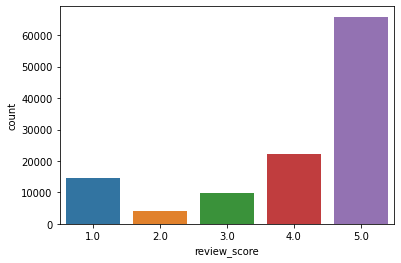

In [ ]:
sns.countplot(df['review_score'])
df['review_score'].value_counts() / df['review_score'].count() * 100

Lebih dari 75.3% pelanggan memberikan skor 4 dan 5. 12.6% memberikan skor 1, sekitar 11.7% memberikan skor 3 & 2.

### Pelanggan yang Paling Banyak Nominal Pembelian

Text(0.5, 1.0, '10 pelanggan dengan pembayaran tertinggi')

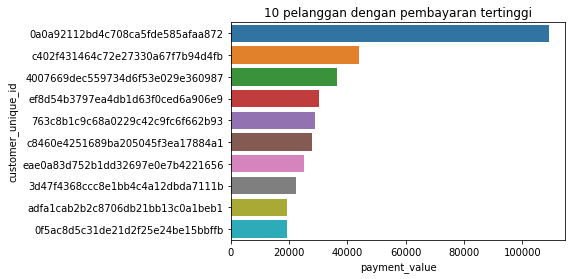

In [ ]:
pelanggan_loyal = df.groupby('customer_unique_id')['payment_value'].sum().reset_index().sort_values('payment_value', ascending=False)
ax = sns.barplot(x='payment_value', y='customer_unique_id', data=pelanggan_loyal[:10])
ax.set_title('10 pelanggan dengan pembayaran tertinggi')

### Negara Bagian dengan Pembelian Terbanyak

Text(0.5, 1.0, '10 kota pembelian terbanyak')

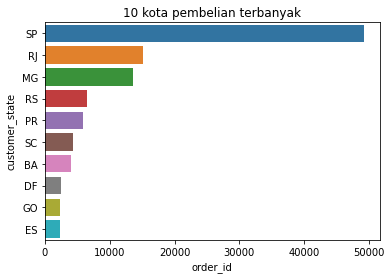

In [ ]:
state_terbanyak = df.groupby('customer_state')['order_id'].count().reset_index().sort_values('order_id', ascending=False)
ax = sns.barplot(x='order_id', y='customer_state', data=state_terbanyak[:10])
ax.set_title('10 kota pembelian terbanyak')

### Persentase Kota yang Mengeluarkan Uang Terbanyak

Text(0.5, 1.0, '10 kota dengan pengeluaran tertinggi')

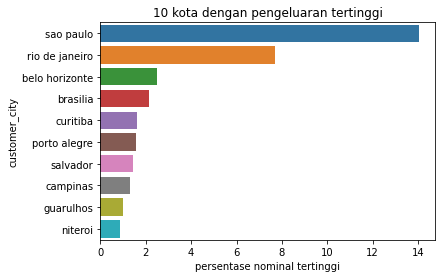

In [ ]:
kota_terboros = df.groupby('customer_city')['payment_value'].sum().reset_index().sort_values('payment_value', ascending=False)
kota_terboros['persentase nominal tertinggi'] = (kota_terboros['payment_value'] / kota_terboros['payment_value'].sum()) * 100

ax = sns.barplot(x='persentase nominal tertinggi', y='customer_city', data=kota_terboros[:10])
ax.set_title('10 kota dengan pengeluaran tertinggi')

### Produk yang Memiliki Rata-rata Terbaik & Terburuk

In [ ]:
reviewsocres = df.groupby('product_category_name_english')['review_score'].agg(['mean', 'count']).sort_values(by='mean',ascending=False)
# produk yang memiliki review score lebih dr 100 terbaik
terbaik = reviewsocres[reviewsocres['count']>=100][:10]
terbaik

,mean,count
product_category_name_english,,
books_general_interest,4.438721,563
books_technical,4.373134,268
food_drink,4.301370,292
luggage_accessories,4.289022,1166
costruction_tools_tools,4.285714,119
food,4.228963,511
home_appliances_2,4.213483,267
fashion_shoes,4.209559,272
pet_shop,4.193580,2056


In [ ]:
# produk yang memiliki review score lebih dr 100 terburuk
terburuk = reviewsocres[reviewsocres["count"]>=100].sort_values(by='mean')[:10]
terburuk

,mean,count
product_category_name_english,,
office_furniture,3.526286,1769
fashion_male_clothing,3.565476,168
fixed_telephony,3.681319,273
furniture_bedroom,3.825397,126
construction_tools_safety,3.848485,198
audio,3.848806,377
bed_bath_table,3.893879,11779
home_confort,3.910603,481
furniture_decor,3.917333,8758


### Kategori Produk yang Paling Banyak Terjual

In [ ]:
produk_terlaku = df.groupby('product_category_name_english').agg({'order_id':'nunique','payment_value':'sum'}).sort_values('payment_value', ascending=False)[:10]
produk_terlaku

,order_id,payment_value
product_category_name_english,,
bed_bath_table,9401,1709858.62
health_beauty,8870,1655330.27
computers_accessories,6722,1601549.56
furniture_decor,6479,1441074.36
watches_gifts,5649,1428612.75
sports_leisure,7761,1395063.19
housewares,5922,1102456.99
garden_tools,3553,848241.14
auto,3922,805118.03


## RFM Analysis

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('Olist Dataset Final.csv')
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,cama_mesa_banho,bed_bath_table,52.0,337.0,1.0,800.0,16.0,10.0,16.0,14940,ibitinga,SP,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,order_shipped,2018-04-16 00:00:00,205d5aa158338f2b733a07326aae8c87,42804,camacari,BA,1.0,voucher,1.0,44.11,396eacbff771557619771e8d4b58ee77,3.0,(no comment title),Minha mercadoria não chegou e ninguém entrou em contato para resolver nada...,2018-04-18 00:00:00,2018-04-20 05:01:01
1,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,cama_mesa_banho,bed_bath_table,52.0,337.0,1.0,800.0,16.0,10.0,16.0,14940,ibitinga,SP,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,order_shipped,2018-04-16 00:00:00,205d5aa158338f2b733a07326aae8c87,42804,camacari,BA,2.0,voucher,1.0,33.18,396eacbff771557619771e8d4b58ee77,3.0,(no comment title),Minha mercadoria não chegou e ninguém entrou em contato para resolver nada...,2018-04-18 00:00:00,2018-04-20 05:01:01
2,00310b0c75bb13015ec4d82d341865a4,1,c8e7c2ef329fcda4a233e7e2f8bb8b7d,a2deecd5398f5df4987110c80a1972a3,2018-08-17 15:04:25,39.90,15.38,utilidades_domesticas,housewares,58.0,1245.0,1.0,200.0,16.0,12.0,11.0,5043,sao paulo,SP,0dad07848c618cc5a4679a1bfe1db8d2,canceled,2018-08-15 14:29:08,2018-08-15 15:04:25,order_canceled,order_canceled,2018-08-29 00:00:00,ec979208947bbba310f2ad8e50963725,31160,belo horizonte,MG,1.0,credit_card,2.0,55.28,8f28fc7d29a09403973697645d73b72a,1.0,(no comment title),(no comment message),2018-08-31 00:00:00,2018-08-31 22:49:14
3,00a99c50fdff7e36262caba33821875a,1,76d75f398634bf194ba99d7297e7d1fa,974cf2cb8f4b7add98709c30df02fe10,2018-08-21 16:35:18,52.99,22.30,informatica_acessorios,computers_accessories,59.0,1775.0,4.0,350.0,25.0,11.0,15.0,14802,araraquara,SP,7a399396442d5601cbedfbd0a3cf1da4,shipped,2018-08-17 16:25:04,2018-08-17 16:35:18,2018-08-18 09:07:00,order_shipped,2018-09-18 00:00:00,60ec651482858c327c177cf9360cc0a2,45990,teixeira de freitas,BA,1.0,credit_card,4.0,75.29,e92a1612d8dcd014217178bd28cc54b2,5.0,"ótimo,super recomendo",comprometimento com o cliente,2018-08-25 00:00:00,2018-08-25 23:44:42
4,00ae7a8b4936674ebb701d4a23719a79,1,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,2018-05-15 15:51:32,27.90,9.26,automotivo,auto,52.0,1139.0,1.0,600.0,16.0,11.0,11.0,13408,piracicaba,SP,a7e8a3cb55d9c9a536992c6465a46a3f,canceled,2018-05-09 14:14:06,2018-05-09 15:51:32,order_canceled,order_canceled,2018-05-17 00:00:00,f0b9f688a3b9151bc6b38f4b5b36ea44,6539,santana de parnaiba,SP,1.0,credit_card,1.0,37.16,f9c1a71690bf7288861804ece5383ea1,2.0,Não posso avaliar ainda,Não recebi o produto ainda,2018-05-19 00:00:00,2018-05-20 18:56:33


In [ ]:
df_deliv = df[df['order_status'] == 'delivered']
df_deliv.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
2449,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,(no comment title),"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
2450,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,(no comment title),(no comment message),2017-05-13 00:00:00,2017-05-15 11:34:13
2451,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,(no comment title),Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23 00:00:00,2018-01-23 16:06:31
2452,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,(no comment title),(no comment message),2018-08-15 00:00:00,2018-08-15 16:39:01
2453,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,(no comment title),Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


Jika dilihat datasetnya, pada kolom order status terdapat beberapa jenis seperti delivered, calceled, invoiced, dll. Namun data pembelian yang benar-benar sudah komplit (pembayaran diterima oleh perusahaan sebagai revenue) adalah data dengan kategori order status delivered, sehingga dataset akan dibatasi untuk data dengan order status delivered saja.

In [ ]:
df_deliv.dtypes

order_id                          object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_category_name_english     object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
seller_zip_code_prefix             int64
seller_city                       object
seller_state                      object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_

In [ ]:
df_deliv['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

<ipython-input-275-5168be8d4787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deliv['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])


In [ ]:
# recency 
df_recency = df_deliv.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
df_recency.rename(columns={"order_purchase_timestamp":"LastPurchaseDate"}, inplace=True)
df_recency["LastPurchaseDate"] = df_recency["LastPurchaseDate"].dt.date

# ambil tanggal terakhir purchase date
recent_date = df_deliv['order_purchase_timestamp'].dt.date.max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
df_recency

,customer_unique_id,LastPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,114
2,0000f46a3911fa3c0805444483337064,2017-03-10,537
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,321
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,288
...,...,...,...
92737,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,447
92738,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,262
92739,ffff371b4d645b6ecea244b27531430a,2017-02-07,568
92740,ffff5962728ec6157033ef9805bacc48,2018-05-02,119


In [ ]:
# frequency
df_frequency = df_deliv.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index()
df_frequency.rename(columns={"order_id":"Frequency"}, inplace=True)
df_frequency

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
92737,fffcf5a5ff07b0908bd4e2dbc735a684,1
92738,fffea47cd6d3cc0a88bd621562a9d061,1
92739,ffff371b4d645b6ecea244b27531430a,1
92740,ffff5962728ec6157033ef9805bacc48,1


In [ ]:
# monetary
df_monetary = df_deliv.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
df_monetary.columns = ['customer_unique_id', 'Monetary']
df_monetary

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
92737,fffcf5a5ff07b0908bd4e2dbc735a684,4134.84
92738,fffea47cd6d3cc0a88bd621562a9d061,84.58
92739,ffff371b4d645b6ecea244b27531430a,112.46
92740,ffff5962728ec6157033ef9805bacc48,133.69


In [ ]:
rf_df = df_recency.merge(df_frequency, on='customer_unique_id')
rfm_df = rf_df.merge(df_monetary, on='customer_unique_id').drop(columns='LastPurchaseDate')
rfm_df

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89
...,...,...,...,...
92737,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,4134.84
92738,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58
92739,ffff371b4d645b6ecea244b27531430a,568,1,112.46
92740,ffff5962728ec6157033ef9805bacc48,119,1,133.69


### Recency

In [ ]:
rfm_df['R'] = pd.qcut(rfm_df['Recency'], q=5, labels=[5, 4, 3, 2, 1])

In [ ]:
rfm_df.groupby('R').agg(
    count=('customer_unique_id', 'count'),
    min_recency=('Recency', min),
    max_recency=('Recency', max),
    std_recency=('Recency', 'std'),    
    avg_recency=('Recency', 'mean')
).sort_values(by='avg_recency')

,count,min_recency,max_recency,std_recency,avg_recency
R,,,,,
5,18573,0,91,25.385765,44.907339
4,18556,92,176,23.707638,134.731030
3,18809,177,268,26.828147,219.995959
2,18263,269,381,34.496283,316.061490
1,18541,382,695,62.756825,472.630980


### Frequency

In [ ]:
rfm_df['F'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])

In [ ]:
rfm_df.groupby('F').agg(
    count=('customer_unique_id', 'count'),
    min_frequency=('Frequency', min),
    max_frequency=('Frequency', max),
    std_frequency=('Frequency', 'std'),
    avg_frequency=('Frequency', 'mean')
).sort_values(by='avg_frequency')

,count,min_frequency,max_frequency,std_frequency,avg_frequency
F,,,,,
1,18549,1,1,0.000000,1.000000
2,18548,1,1,0.000000,1.000000
3,18548,1,1,0.000000,1.000000
4,18548,1,1,0.000000,1.000000
5,18549,1,15,0.441692,1.165723


### Monetary

In [ ]:
rfm_df['M'] = pd.qcut(rfm_df['Monetary'], q=5, labels=[5, 4, 3, 2, 1])

In [ ]:
rfm_df.groupby('M').agg(
    count=('customer_unique_id', 'count'),
    min_monetary=('Monetary', min),
    max_monetary=('Monetary', max),
    std_monetary=('Monetary', 'std'),
    avg_monetary=('Monetary', 'mean')
).sort_values(by='avg_monetary')

,count,min_monetary,max_monetary,std_monetary,avg_monetary
M,,,,,
5,18549,9.59,55.94,9.661016,39.813626
4,18557,55.95,89.63,9.627576,71.835895
3,18539,89.64,139.55,14.292425,113.335006
2,18548,139.56,237.07,27.033234,179.947627
1,18549,237.08,109312.64,1305.903805,649.799470


In [ ]:
rfm_df

,customer_unique_id,Recency,Frequency,Monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,5
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,4
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,5
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,2
...,...,...,...,...,...,...,...
92737,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,4134.84,1,5,1
92738,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,3,5,4
92739,ffff371b4d645b6ecea244b27531430a,568,1,112.46,1,5,3
92740,ffff5962728ec6157033ef9805bacc48,119,1,133.69,4,5,3


In [ ]:
rfm_df['RFM'] = rfm_df['R'].astype(str) +\
                rfm_df['F'].astype(str) +\
                rfm_df['M'].astype(str)

In [ ]:
rfm_df

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,2,412
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,5,415
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,4,114
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,5,215
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,2,212
...,...,...,...,...,...,...,...,...
92737,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,4134.84,1,5,1,151
92738,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,3,5,4,354
92739,ffff371b4d645b6ecea244b27531430a,568,1,112.46,1,5,3,153
92740,ffff5962728ec6157033ef9805bacc48,119,1,133.69,4,5,3,453


In [ ]:
rfm_df['RFM_Score'] = rfm_df['R'].astype(int) +\
                      rfm_df['F'].astype(int) +\
                      rfm_df['M'].astype(int)
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,2,412,7
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,5,415,10
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,4,114,6
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,5,215,8
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,2,212,5


In [ ]:
rfm_df.groupby('RFM_Score').agg(
    customers=('customer_unique_id', 'count'),
    mean_recency=('Recency', 'mean'),
    mean_frequency=('Frequency', 'mean'),
    mean_monetary=('Monetary', 'mean'),
).sort_values(by='RFM_Score')

,customers,mean_recency,mean_frequency,mean_monetary
RFM_Score,,,,
3,706,478.971671,1.000000,632.444943
4,2153,420.170924,1.000000,533.502420
5,4290,379.465268,1.000000,394.844541
6,7104,341.329533,1.000000,331.222563
7,11124,310.800701,1.019957,285.593041
8,13717,269.901436,1.030911,231.431153
9,14294,235.648804,1.041696,193.641380
10,13662,201.606061,1.050359,166.522936
11,11297,164.666903,1.062672,136.351865


In [ ]:
seg_map = {
    r'[1-2][1-2]'   : 'Hibernating',
    r'[1-2]3'       : 'At Risk',
    r'[1-2][4-5]'   : 'Cannot Lose Them',
    r'31'           : 'About to Sleep',
    r'32'           : 'New Customers',
    r'33'           : 'Need Attention',
    r'[3-4][4-5]'   : 'Loyal Customers',
    r'[4-5]1'       : 'Promising',
    r'[4-5][2-3]'   : 'Potential Loyalists',
    r'[4-5][4-5]'   : 'Champions'
}

In [ ]:
rfm_df['Segment'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str)
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex = True)
rfm_df

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,2,412,7,Promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,5,415,10,Promising
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,4,114,6,Hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,5,215,8,Hibernating
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,2,212,5,Hibernating
...,...,...,...,...,...,...,...,...,...,...
92737,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,4134.84,1,5,1,151,7,Cannot Lose Them
92738,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,3,5,4,354,12,Loyal Customers
92739,ffff371b4d645b6ecea244b27531430a,568,1,112.46,1,5,3,153,9,Cannot Lose Them
92740,ffff5962728ec6157033ef9805bacc48,119,1,133.69,4,5,3,453,12,Loyal Customers


In [ ]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in rfm_df.columns :
    listItem.append( [col, rfm_df[col].nunique(), rfm_df[col].unique()])

uniqueValue = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
uniqueValue

,Column Name,Number of Unique,Unique Sample
0,customer_unique_id,92742,"[0000366f3b9a7992bf8c76cfdf3221e2, 0000b849f77a49e4a4ce2b2a4ca5be3f, 0000f46a3911fa3c0805444483337064, 0000f6ccb0745a6a4b88665a16c9f078, 0004aac84e0df4da2b147fca70cf8255, 0004bd2a26a76fe21f786e4fbd80607f, 00050ab1314c0e55a6ca13cf7181fecf, 00053a61a98854899e70ed204dd4bafe, 0005e1862207bf6ccc02e4228effd9a0, 0005ef4cd20d2893f0d9fbd94d3c0d97, 0006fdc98a402fceb4eb0ee528f6a8d4, 00082cbe03e478190aadbea78542e933, 00090324bbad0e9342388303bb71ba0a, 000949456b182f53c18b68d6babc79c1, 000a5ad9c4601d2bbdd9ed765d5213b3, 000bfa1d2f1a41876493be685390d6d3, 000c8bdb58a29e7115cfc257230fb21b, 000d460961d6dbfa3ec6c9f5805769e1, 000de6019bb59f34c099a907c151d855, 000e309254ab1fc5ba99dd469d36bdb4, 000ec5bff359e1c0ad76a81a45cb598f, 000ed48ceeb6f4bf8ad021a10a3c7b43, 000fbf0473c10fc1ab6f8d2d286ce20c, 0010a452c6d13139e50b57f19f52e04e, 0010fb34b966d44409382af9e8fd5b77, 001147e649a7b1afd577e873841632dd, 00115fc7123b5310cf6d3a3aa932699e, 0011805441c0d1b68b48002f1d005526, 0011857aff0e5871ce5eb429f21cdaf5, 0011c98589159d6149979563c504cb21, 0012929d977a8d7280bb277c1e5f589d, 0014a5a58da615f7b01a4f5e194bf5ea, 0015752e079902b12cd00b9b7596276b, 00172711b30d52eea8b313a7f2cced02, 00191a9719ef48ebb5860b130347bf33, 001926cef41060fae572e2e7b30bd2a4, 001928b561575b2821c92254a2327d06, 00196c4c9a3af7dd2ad10eade69c926f, 00196fdb2bf9edfc35e88ebfbcf8d781, 0019da6aa6bcb27cc32f1249bd12da05, 0019e8c501c85848ac0966d45226fa1d, 001a2bf0e46c684031af91fb2bce149d, 001a34eb30ecb8e3aacb07c475ca4dd1, 001a3a8e11d76c9a366c31a4aa2cc529, 001ae5a1788703d64536c30362503e49, 001deb796b28a3a128d6113857569aa4, 001f3c4211216384d5fe59b041ce1461, 002043098f10ba39a4600b6c52fbfe3c, 002311514717ca8b65b09a26cdf7b91a, 0023557a94bef0038066b5d1b3dc763e, 002471155ecd08d208d1376720e2a907, 00256bf7b05c08f6a5849df3d0a64f1f, 0025795df7a7d077c4c90162fa820085, 0027324a96d26a2bc7d69262f83c8403, 0028a7d8db7b0247652509358ad8d755, 0028cfeb9dfcd3628a56d5b6400deef5, 00293787e2aec37a9c253b63fdfe2049, 002aba8c1af80acacef6e011f9f23262, 002ae492472e45ad6ebeb7a625409392, 002b4cd83fabaffaa475f78ea5ef3e08, 002bdeb33da5b1b3ce8b9c822f749c82, 002cdf87d4c03f08f7eb4551a923affc, 002d3bd901608f67c3fc11eaaa842b13, 002d71b244beb91ca7030b15ab526446, 002da6dde369f6a8b4c999ed61eb5a87, 002eb8b96288f3804e21d2777ac29895, 002ed12115742033f015cb3c269ccf68, 002ef00822613c94613e60e03b169fef, 002feefec5af0a3b26ee7839c66d205e, 003035f5ec76f2220098377482de93c9, 003162bf0351f47a1a247992b8b9b42d, 00324c9f4d710e7bac5c5ba679714430, 0032c76b20340da25249092a268ce66c, 0032ca69771a7758ce643258bb9e4ac7, 0033f4a2887e07e25aa1204d482f41ba, 00344274804f3b8003de1b0562ae01df, 0034c76b7e6a17d738375b99afc2f01e, 0035029989e6fc5cf030918a5f9f2037, 003650b504826ea534e02eba0ab58dd5, 0036a074f98b80c4f1fc33dbbcf9c552, 0036b4a3d09ad551a5188c2e374da402, 0036d365b138cc0ee06bed755bcb5044, 00370dfde3d012c420d29657afc2fc8b, 00377a18050b898b93e2c774be9947db, 0037aa56b017c105c3a9d47af71fff98, 0037d2bbb9ebc39d9114aea27ee16d72, 0037eb1ff742ee2e71ba887f65f3c6f3, 003800162424b7b5b3d75c9cf22a66e7, 00391594070baf8603f5fdc1d0c6a48c, 003a5571a07dcf09bf117d13d2980ba3, 003a7a8eb096ed3cbf713d2def1ca701, 003ac9408252444b489b1bfc013f5f8c, 003ae409f37c3c30cb1c974af3a42692, 003c2067070f5b3d923235b1ea1cc17b, 003c457932a554e4df13834237b1ed00, 003d56767e53e08671de00da3fba8d40, 003db7adfcdc49857b095a50191b6c9d, 003e28cb6fab8a0901bff9229612375f, 003e2af81ea3c72fbdd093f07724a4de, 003f4901fdb60ae9c1e2538b84c208e1, ...]"
1,Recency,610,"[111, 114, 537, 321, 288, 146, 131, 182, 543, 170, 407, 283, 158, 128, 383, 334, 260, 234, 377, 65, 8, 101, 34, 414, 177, 363, 585, 492, 427, 389, 316, 223, 27, 32, 497, 5, 188, 199, 120, 426, 49, 100, 264, 68, 528, 521, 63, 154, 21, 89, 36, 157, 259, 306, 183, 325, 574, 267, 302, 226, 464, 139, 403, 211, 196, 304, 366, 46, 434, 692, 44, 64, 51, 109, 224, 474, 385, 210, 212, 277, 215, 520, 412, 150, 24, 35, 15, 166, 14, 23, 236, 271, 119, 534, 135, 30, 113, 314, 159, 227, ...]"
2,Frequency,9,"[1, 2, 3

In [ ]:
rfm_df = rfm_df.drop('RFM_Score', axis = 1)
rfm_df.groupby('Segment').mean().sort_values('Monetary')

,Recency,Frequency,Monetary
Segment,,,
Need Attention,219.695572,1.000000,183.483005
New Customers,220.797228,1.000000,186.627122
About to Sleep,219.165951,1.000000,192.565580
At Risk,394.042133,1.000000,203.450894
Potential Loyalists,89.887164,1.000000,204.442819
Promising,90.449070,1.000000,207.320395
Cannot Lose Them,394.787215,1.071429,213.203082
Hibernating,395.529706,1.000000,214.572813
Loyal Customers,178.080211,1.087558,225.845583


###PENJELASAN SEGMENTASI

1. Champions: Bought recently, buy often and spend the most.
2. Loyal customers: Buy on a regular basis.
3. Potential loyalist: Recent customers with average frequency.
4. Recent customers: Bought most recently, but not often.
5. Promising: Recent shoppers, but haven’t spent much.
6. Needs attention: Above average recency, frequency and monetary values.
7. About to sleep: Below average recency and frequency.
8. At risk: Some time since they’ve purchased.
9. Can’t lose them: Used to purchase frequently but haven’t returned for a long time.
10. Hibernating: Last purchase was long back and low number of orders.


In [ ]:
df = pd.merge(df_deliv, rfm_df, how = 'left', on = 'customer_unique_id')
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Recency,Frequency,Monetary,R,F,M,RFM,Segment
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,(no comment title),"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,350,1,72.19,2,3,4,234,At Risk
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,(no comment title),(no comment message),2017-05-13 00:00:00,2017-05-15 11:34:13,345,2,284.56,2,5,1,251,Cannot Lose Them
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,(no comment title),Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23 00:00:00,2018-01-23 16:06:31,227,1,216.87,3,2,2,322,New Customers
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,(no comment title),(no comment message),2018-08-15 00:00:00,2018-08-15 16:39:01,21,1,25.78,5,4,5,545,Champions
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,(no comment title),Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,571,1,218.04,1,2,2,122,Hibernating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
Segment = df.groupby('Segment').mean().sort_values('review_score')[['review_score']]
Segment

,review_score
Segment,
Need Attention,3.905082
New Customers,3.907541
About to Sleep,3.924480
Loyal Customers,3.980417
At Risk,4.101051
Promising,4.110872
Hibernating,4.111589
Cannot Lose Them,4.115783
Potential Loyalists,4.137349


In [ ]:
pivot_city = pd.crosstab(df['Segment'],df_deliv['customer_state'], margins = True, margins_name = 'Total')
pivot_city.sort_values(by = 'Total', axis = 1, ascending = False, inplace = True)
pivot_city.sort_values(by = 'Total', axis = 0, ascending = False, inplace = True)
pivot_city

customer_state,Total,SP,RJ,MG,RS,PR,SC,BA,DF,GO,ES,PE,CE,MT,PA,MS,MA,PB,RN,PI,AL,SE,TO,RO,AM,AC,AP,RR
Segment,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Total,111706,47238,14361,13032,6213,5710,4098,3803,2347,2262,2239,1772,1459,1047,1044,816,794,600,540,538,430,378,327,277,162,92,82,45
Loyal Customers,19071,7976,2475,2224,1026,1013,716,636,416,386,360,318,280,180,179,149,146,93,92,83,70,72,64,43,31,16,18,9
Cannot Lose Them,18632,7947,2418,2131,1033,944,676,632,436,371,368,291,217,171,178,137,110,96,87,98,72,60,46,43,24,22,20,4
Hibernating,17281,7332,2222,2085,942,842,613,593,347,333,371,264,241,153,167,138,126,98,80,85,44,55,59,34,22,16,10,9
Potential Loyalists,17084,7124,2220,2036,979,840,647,620,348,383,332,263,221,154,160,124,114,85,59,83,72,61,48,58,26,10,12,5
Champions,9534,4109,1183,1112,535,502,319,312,170,219,190,154,127,96,88,51,63,60,49,53,36,34,28,23,8,5,4,4
At Risk,8667,3718,1061,989,472,437,300,286,197,154,183,158,101,88,85,50,71,50,66,54,37,33,24,20,16,6,6,5
Promising,8620,3634,1092,1002,474,467,323,294,158,164,183,142,120,78,81,71,64,56,40,29,35,33,22,19,19,12,5,3
Need Attention,4371,1852,570,488,276,227,180,145,84,73,105,64,49,41,31,31,34,26,17,14,19,8,9,14,10,0,3,1


### **RECOMMENDATIONS**

| **Nomor** | **Segmentasi** | **Rekomendasi** |
| --- | --- | --- |
| 1 | Champions | Perusahaan dapat memberikan special offering produk pada customer jenis ini mengingat mereka adalah customer terbaik perusahaan (VIP) |
| 2 | Loyal Customers | Customer yang loyal dapat diapproach dengan memberikan promo-promo atau voucher yang bersifat akumulatif berdasarkan jumlah transaksinya |
| 3 | Potential Loyalist | Tawarkan membership dengan menawarkan promo-promo yang hanya dapat dimiliki oleh member |
| 4 | Recent Customers | Jangan sampai kehilangan kontak dengan customer jenis ini! Berikan service terbaik dan rekomendasikan produk-produk yang related dengan yang mereka cari agar mereka dapat melakukan pembelian lagi|
| 5 | Promising | Cari tahu lebih detail dan personal terkait kebutuhan customer dan tawarkan produk tersebut |
| 6 | Need Attention | Tawarkan produk-produk related yang mereka cari sebelumnya sehingga mereka merasa lebih diperhatikan |
| 7 | About to Sleep| Tawarkan diskon atau promo-promo menarik untuk menjaga mereka tetap tertarik dengan produk perusahaan dan tidak pindah ke perusahaan lain |
| 8 | At Risk | Ajak mereka kembali aktif dengan approach lebih personal seperti kiriman email atau pesan yang personal dan terkesan dekat |
| 9 | Can't Lose Them | Cari tahu apa yang salah dan yang diinginkan customer jenis ini, bisa dengan memberikan survey pelanggan dsb |
| 10 | Hibernating | Tawarkan diskon atau promo spesial untuk customer yang sudah lama tidak berbelanja. Bahkan bisa juga dengan memberikan promo kepada customer jenis lain yang mampu mengajak hibernating customer kembali aktif |